# 🟣 **Deep Learning: AirBnB 🏡 price predictions data - images** 🟣

## **Descarga y formatting de DATOS TABULARES: AIRBNB BOSTON**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/dataset.csv", sep = ';')

data

id                                       listing_url  \
0                    3781                 https://www.airbnb.com/rooms/3781   
1                    5506                 https://www.airbnb.com/rooms/5506   
2                    6695                 https://www.airbnb.com/rooms/6695   
3                    8789                 https://www.airbnb.com/rooms/8789   
4                   10813                https://www.airbnb.com/rooms/10813   
...                   ...                                               ...   
7194  1046563598019556549  https://www.airbnb.com/rooms/1046563598019556549   
7195  1046568292864752336  https://www.airbnb.com/rooms/1046568292864752336   
7196  1047166785349446101  https://www.airbnb.com/rooms/1047166785349446101   
7197  1047226383263246733  https://www.airbnb.com/rooms/1047226383263246733   
7198  1048051750111422883  https://www.airbnb.com/rooms/1048051750111422883   

           scrape_id last_scraped       source  \
0     20231218233145   2023-12-19  city scrape   
1     20231218233145   2023-12-19  city scrape   
2     20231218233145   2023-12-19  city scrape   
3     20231218233145   2023-12-19  city scrape   
4     20231218233145   2023-12-19  city scrape   
...              ...          ...          ...   
7194  20231218233145   2023-12-19  city scrape   
7195  20231218233145   2023-12-19  city scrape   
7196  20231218233145   2023-12-19  city scrape   
7197  20231218233145   2023-12-19  city scrape   
7198  20231218233145   2023-12-19  city scrape   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/24670/b2de044...       4804   
1     https://a0.muscache.com/pictures/miso/Hosting-...       8229   
2     https://a0.muscache.com/pictures/38ac4797-e7a4...       8229   
3     https://a0.muscache.com/pictures/miso/Hosting-...      26988   
4     https://a0.muscache.com/pictures/20b5b9c9-e1f4...      38997   
...                                                 ...        ...   
7194  https://a0.muscache.com/pictures/prohost-api/H...  212359760   
7195  https://a0.muscache.com/pictures/prohost-api/H...  212359760   
7196  https://a0.muscache.com/pictures/miso/Hosting-...  233908696   
7197  https://a0.muscache.com/pictures/prohost-api/H...  212359760   
7198  https://a0.muscache.com/pictures/e53f88a5-f860...  108724738   

                                         host_url    host_name  host_since  \
0          https://www.airbnb.com/users/show/4804        Frank  2008-12-03   
1          https://www.airbnb.com/users/show/8229        Terry  2009-02-19   
2          https://www.airbnb.com/users/show/8229        Terry  2009-02-19   
3         https://www.airbnb.com/users/show/26988         Anne  2009-07-22   
4         https://www.airbnb.com/users/show/38997     Michelle  2009-09-16   
...                                           ...          ...         ...   
7194  https://www.airbnb.com/users/show/212359760      Evonify  2018-08-29   
7195  https://www.airbnb.com/users/show/212359760      Evonify  2018-08-29   
7196  https://www.airbnb.com/users/show/233908696  Together We  2019-01-02   
7197  https://www.airbnb.com/users/show/212359760      Evonify  2018-08-29   
7198  https://www.airbnb.com/users/show/108724738        Diogo  2016-12-27   

      ... review_scores_communication review_scores_location  \
0     ...                        4.96                   4.88   
1     ...                        4.89                   4.55   
2     ...                        4.95                   4.51   
3     ...                        4.96                   4.96   
4     ...                        5.00                   5.00   
...   ...                         ...                    ...   
7194  ...                        5.00                   5.00   
7195  ...                         NaN                    NaN   
7196  ...                         NaN                    NaN   
7197  ...                         NaN                  

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

In [ ]:
data.shape

(7199, 72)

### **Tratamiento de duplicados**

In [ ]:
duplicados = data.duplicated(subset=['id', 'picture_url'], keep='first').sum()
print(f"Duplicados encontrados: {duplicados}")


Duplicados encontrados: 3599


In [ ]:
# Eliminar duplicados
data = data.drop_duplicates(subset=['id', 'picture_url'], keep='first').reset_index(drop=True)
print(f"Filas restantes después de eliminar duplicados: {data.shape[0]}")

Filas restantes después de eliminar duplicados: 3600


In [ ]:
# Guardar dataset limpio para debugging
data.to_csv('/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/dataset_clean.csv', sep=';', index=False)


In [ ]:
data.shape

(3600, 72)

### **Descarga de imágenes y filtro de datos solo con los que incluyen las imagenes**

In [ ]:
import requests
from skimage import io
import numpy as np
import cv2
from tqdm import tqdm

def download_images(paths: list, canvas=(224, 224)):
    """Descargar imágenes desde URLs con encabezados para evitar errores 403."""
    downloaded_images = []
    downloaded_idxs = []

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

    for i_img, url in enumerate(tqdm(paths)):
        try:
            # Solicitar la imagen con un encabezado
            response = requests.get(url, headers=headers, timeout=5)
            response.raise_for_status()  # Levantar un error si la respuesta no es 200
            img_array = np.frombuffer(response.content, dtype=np.uint8)
            img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

            # Redimensionar la imagen
            img = cv2.resize(img, canvas)

            # Verificar y ajustar canales si es necesario
            if img.shape[-1] == 4:  # RGBA
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
            elif len(img.shape) == 2:  # Escala de grises
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            downloaded_images.append(img)
            downloaded_idxs.append(i_img)
        except Exception as e:
            print(f"Error al descargar imagen {i_img}: {e}")

    return np.array(downloaded_images), downloaded_idxs

# Descargar imágenes con el nuevo código
images, idxs = download_images(data_clean['picture_url'])

# Verificar cuántas imágenes se descargaron correctamente
print(f"Total de imágenes descargadas: {len(images)}")
print(f"Índices de imágenes descargadas: {len(idxs)}")


  0%|          | 15/3600 [00:05<24:00,  2.49it/s]

Error al descargar imagen 14: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/18698089/0b22a030_original.jpg


  1%|          | 23/3600 [00:08<20:28,  2.91it/s]

Error al descargar imagen 22: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/2143912/1608e26a_original.jpg


  1%|▏         | 50/3600 [00:20<38:29,  1.54it/s]

Error al descargar imagen 49: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1130279/original/1ff92114-4883-42f1-90c2-a51fa75140ad.jpeg


  2%|▏         | 58/3600 [00:24<21:47,  2.71it/s]

Error al descargar imagen 57: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/22175517/62b99022_original.jpg


  2%|▏         | 82/3600 [00:32<18:16,  3.21it/s]

Error al descargar imagen 81: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-2381143/original/fe2a01b1-7652-476f-b552-032879da8f04.png


  3%|▎         | 109/3600 [00:44<29:35,  1.97it/s]

Error al descargar imagen 107: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/c168962e-1a48-461d-a568-3ec4bf9a6c65.jpg


  3%|▎         | 110/3600 [00:44<25:03,  2.32it/s]

Error al descargar imagen 109: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-4090224/original/ab9132a7-8b00-407f-a67a-9100b3c8707f.jpeg


  3%|▎         | 124/3600 [00:49<15:12,  3.81it/s]

Error al descargar imagen 122: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-4461846/original/fc197865-7e72-4359-963f-ca4c1ce97bb5.jpeg


  4%|▍         | 135/3600 [00:54<26:10,  2.21it/s]

Error al descargar imagen 134: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-4623114/original/7c8d41af-cbd1-4666-8705-937098a17bf2.jpeg


  4%|▍         | 138/3600 [00:54<17:52,  3.23it/s]

Error al descargar imagen 137: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/90646201/a9cbf501_original.jpg


  4%|▍         | 139/3600 [00:55<30:04,  1.92it/s]

Error al descargar imagen 138: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/72880628/d3e48f2c_original.jpg


  5%|▍         | 164/3600 [01:04<18:14,  3.14it/s]

Error al descargar imagen 163: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/fc3371ed-197d-4484-bd24-5d2281c9f356.jpg


  5%|▌         | 188/3600 [01:15<24:05,  2.36it/s]

Error al descargar imagen 187: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-6646604/original/0f04720b-b742-4aba-b252-2be9080145e9.jpeg


  6%|▋         | 231/3600 [01:30<10:52,  5.16it/s]

Error al descargar imagen 229: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-7531700/original/67306117-5e1a-46b6-b1a9-8694dc769b9c.jpeg


  7%|▋         | 240/3600 [01:32<11:56,  4.69it/s]

Error al descargar imagen 238: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-7837202/original/37ec70e7-1b6c-415e-8ecf-7f8087aaca6d.jpeg


  8%|▊         | 274/3600 [01:44<14:51,  3.73it/s]

Error al descargar imagen 272: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/cb235ed0-66b6-4e23-8b32-9ef6bf35e9fb.jpg


 10%|▉         | 343/3600 [02:10<13:56,  3.90it/s]

Error al descargar imagen 342: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/e3f457c4-5f1a-4151-a3c8-e53f161d57fb.jpg


 10%|▉         | 347/3600 [02:11<14:43,  3.68it/s]

Error al descargar imagen 346: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/10f6f3b2-e035-4e51-b533-08531934f3b9.jpg


 10%|█         | 367/3600 [02:19<24:51,  2.17it/s]

Error al descargar imagen 366: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/7fef86ac-75ff-44a3-ae8a-60639f1548eb.jpg


 10%|█         | 370/3600 [02:20<16:28,  3.27it/s]

Error al descargar imagen 368: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-13650313/original/1713739f-5d53-45db-aa2e-611c2098615d.jpeg


 11%|█         | 388/3600 [02:25<12:49,  4.17it/s]

Error al descargar imagen 387: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-14229841/original/c611eaeb-4983-4a3c-9525-fcabb3b0fbf5.jpeg


 12%|█▏        | 415/3600 [02:33<13:38,  3.89it/s]

Error al descargar imagen 414: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-14976039/original/30b560e4-51f7-4f35-9b4d-343aa5074bc2.jpeg


 12%|█▏        | 427/3600 [02:37<10:57,  4.82it/s]

Error al descargar imagen 426: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/f805da52-3971-4361-9881-f11775636c63.jpg


 12%|█▏        | 434/3600 [02:40<19:28,  2.71it/s]

Error al descargar imagen 433: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/0d0adcee-76b9-48bc-9dd7-aeca958a23a2.jpg


 12%|█▏        | 445/3600 [02:43<12:09,  4.33it/s]

Error al descargar imagen 443: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/22ff0a41-874e-4723-b465-22d234d672e5.jpg


 13%|█▎        | 465/3600 [02:49<18:11,  2.87it/s]

Error al descargar imagen 463: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-17023481/original/c66d1dcf-8cae-4a0f-b34d-e8a9da3882ab.jpeg
Error al descargar imagen 464: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-17042710/original/0a2e4db0-4940-4a4b-b948-11bef8ec0ed5.jpeg


 13%|█▎        | 483/3600 [02:55<19:41,  2.64it/s]

Error al descargar imagen 482: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-17617918/original/aa7f3f57-a69b-439a-941d-5367cf50ef7c.jpeg


 14%|█▎        | 494/3600 [02:59<14:03,  3.68it/s]

Error al descargar imagen 493: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/e604dcf8-6900-4b02-9087-91eb98c1691a.jpg


 14%|█▍        | 500/3600 [03:02<21:38,  2.39it/s]

Error al descargar imagen 499: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-18032982/original/2c71e21b-33cd-4f6a-ae22-287cdeaedfc0.jpeg


 14%|█▍        | 503/3600 [03:03<20:19,  2.54it/s]

Error al descargar imagen 502: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-18170647/original/d7c346d7-a904-4e8c-8356-4de5eb79c60f.jpeg


 15%|█▌        | 551/3600 [03:33<22:33,  2.25it/s]

Error al descargar imagen 550: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-19969497/original/2a822aed-e88f-4676-b990-1a719a44c0b4.jpeg


 17%|█▋        | 603/3600 [04:09<36:01,  1.39it/s]

Error al descargar imagen 602: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/4ab44899-6a80-4b45-8671-d42196ed8350.jpg


 18%|█▊        | 652/3600 [04:44<30:30,  1.61it/s]

Error al descargar imagen 651: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/aeda0be5-b9b8-48b9-ab3d-dd9053e65734.jpg


 19%|█▊        | 674/3600 [04:56<26:18,  1.85it/s]

Error al descargar imagen 673: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/9ba55672-3899-4b0e-b3a2-c6c5be9c463c.jpg


 19%|█▉        | 677/3600 [04:57<21:09,  2.30it/s]

Error al descargar imagen 676: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/eb441f94-0f0b-4436-943d-f3f2bf5aa164.jpg


 19%|█▉        | 692/3600 [05:05<23:34,  2.06it/s]

Error al descargar imagen 691: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/03944a33-597d-4f7c-9e69-271a62f221a6.jpg


 19%|█▉        | 696/3600 [05:07<24:53,  1.94it/s]

Error al descargar imagen 695: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/43b67d11-54b2-4a2b-803e-ce693e25696e.jpg


 20%|█▉        | 708/3600 [05:13<18:36,  2.59it/s]

Error al descargar imagen 707: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/75319c2e-294f-48dd-a5e8-76c5a2164d89.jpg


 20%|██        | 736/3600 [05:30<17:09,  2.78it/s]

Error al descargar imagen 735: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/971baba7-a4a1-42c5-b690-b5bb8180cde2.jpg


 22%|██▏       | 774/3600 [05:55<20:18,  2.32it/s]

Error al descargar imagen 773: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-28360335/original/c8d8cd53-ed9e-4831-ba48-a838f2ac2bcf.jpeg


 22%|██▎       | 810/3600 [06:16<27:45,  1.68it/s]

Error al descargar imagen 809: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/pro_photo_tool/Hosting-29682500-unapproved/original/9b8998d9-840b-46b1-a25e-4789ff346f20.JPEG


 23%|██▎       | 811/3600 [06:16<22:41,  2.05it/s]

Error al descargar imagen 810: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-29702825/original/32a037b0-43f1-4954-946b-9d1364829d04.jpeg


 23%|██▎       | 827/3600 [06:26<22:38,  2.04it/s]

Error al descargar imagen 825: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/48c10d62-5750-4364-9e3a-54439983cb6b.jpg


 23%|██▎       | 828/3600 [06:27<21:46,  2.12it/s]

Error al descargar imagen 827: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/9a56c86d-d5f3-4737-a658-1fd9885e8d61.jpg


 23%|██▎       | 832/3600 [06:29<23:40,  1.95it/s]

Error al descargar imagen 831: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-30390378/original/244ec1dc-2c48-4e5e-84cf-fb57110e4bc7.jpeg


 23%|██▎       | 834/3600 [06:30<16:12,  2.85it/s]

Error al descargar imagen 832: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-30397078/original/337887d6-4c7c-4550-9f1f-5e4ee671b8f6.jpeg


 23%|██▎       | 836/3600 [06:30<13:54,  3.31it/s]

Error al descargar imagen 835: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-30516467/original/57a80027-7bdb-4fac-a4dd-5656631425d0.jpeg


 24%|██▎       | 847/3600 [06:35<21:34,  2.13it/s]

Error al descargar imagen 846: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/2ce1fe90-fb8f-4136-afcd-6ecb91a3a624.jpg


 24%|██▍       | 863/3600 [06:45<22:23,  2.04it/s]

Error al descargar imagen 862: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-32330465/original/7e2aa39c-61d9-41d8-97aa-393ee35fade9.png


 24%|██▍       | 864/3600 [06:46<22:46,  2.00it/s]

Error al descargar imagen 863: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/b848723a-0ed9-4b49-8c84-9d7eb14ce088.jpg


 25%|██▍       | 883/3600 [06:57<19:32,  2.32it/s]

Error al descargar imagen 882: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-33196944/original/bb6a5cd0-7ee6-4465-824d-cd4cb0c5d652.jpeg


 25%|██▍       | 894/3600 [07:01<13:18,  3.39it/s]

Error al descargar imagen 892: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-33439464/original/97081848-d2c3-47e1-8647-ac8af1c3f6dc.jpeg
Error al descargar imagen 893: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-33440102/original/9c6d9fa6-c962-4f7c-b69f-898bdd560ea4.jpeg


 25%|██▍       | 897/3600 [07:02<13:39,  3.30it/s]

Error al descargar imagen 896: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/a8cdc116-e934-4b9f-b8f2-91b8d69343b9.jpg


 25%|██▌       | 908/3600 [07:08<18:19,  2.45it/s]

Error al descargar imagen 907: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-34133759/original/1dc53195-b06f-4fed-a860-92e1718bdccb.jpeg


 26%|██▌       | 919/3600 [07:14<19:10,  2.33it/s]

Error al descargar imagen 918: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-34974052/original/80db035e-1445-4ce8-8314-e9175130884b.jpeg


 26%|██▌       | 933/3600 [07:21<20:50,  2.13it/s]

Error al descargar imagen 932: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-35481543/original/38658947-e448-49ca-b0b2-607429f1b5b0.jpeg


 27%|██▋       | 979/3600 [07:55<26:34,  1.64it/s]

Error al descargar imagen 978: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-37068313/original/c51bac91-f35e-4e1e-bb88-07934499bfdd.jpeg


 27%|██▋       | 987/3600 [07:58<16:32,  2.63it/s]

Error al descargar imagen 986: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-37709158/original/09489cb1-f4c7-436f-a7e8-018a7079c658.jpeg


 28%|██▊       | 1006/3600 [08:11<27:24,  1.58it/s]

Error al descargar imagen 1004: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-38178173/original/e1b494b8-9fc3-466a-8789-9d3afa032807.jpeg
Error al descargar imagen 1005: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-38274887/original/ee5fb630-9250-4f85-b0e7-794619ceedf6.jpeg


 28%|██▊       | 1015/3600 [08:16<23:19,  1.85it/s]

Error al descargar imagen 1014: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-38513768/original/43b5f7ad-a3a1-4019-993f-c5ebe3168d59.jpeg


 29%|██▉       | 1038/3600 [08:30<19:07,  2.23it/s]

Error al descargar imagen 1037: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-39536784/original/d1c26658-a946-468a-9a39-c6a3dfb23691.jpeg


 29%|██▉       | 1050/3600 [08:36<13:02,  3.26it/s]

Error al descargar imagen 1049: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-39908091/original/17a09417-8eab-48b1-a21b-904f1837e84f.jpeg


 30%|██▉       | 1064/3600 [08:44<18:49,  2.24it/s]

Error al descargar imagen 1063: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-40423797/original/374a8e77-d840-480b-ba94-51b8d7337e0c.jpeg


 30%|██▉       | 1076/3600 [08:50<19:14,  2.19it/s]

Error al descargar imagen 1075: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-40617998/original/6c9424ed-eaca-433f-9099-a9c9782dea58.jpeg


 30%|███       | 1092/3600 [09:01<20:07,  2.08it/s]

Error al descargar imagen 1091: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41102403/original/da9a9606-9604-4c01-b3ea-c1a3670b78e5.jpeg


 30%|███       | 1093/3600 [09:02<17:07,  2.44it/s]

Error al descargar imagen 1092: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41102476/original/04617580-6650-48c9-8e4c-c00f54156a8c.jpeg


 31%|███       | 1103/3600 [09:09<21:52,  1.90it/s]

Error al descargar imagen 1102: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/2d4d9af2-32eb-4fdd-8ce7-f2b5bdc94853.jpg


 31%|███       | 1106/3600 [09:11<18:55,  2.20it/s]

Error al descargar imagen 1105: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/ee7985b8-9db3-4c5c-9143-b1ff052dd862.jpg


 31%|███       | 1107/3600 [09:11<18:10,  2.29it/s]

Error al descargar imagen 1106: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41785374/original/61a91ae7-d44c-4914-8abd-db076afedf4f.jpeg


 31%|███       | 1108/3600 [09:11<15:56,  2.61it/s]

Error al descargar imagen 1107: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41785889/original/8f975c1d-488b-432e-81ee-cdb79c1c02aa.jpeg


 31%|███       | 1110/3600 [09:12<14:44,  2.82it/s]

Error al descargar imagen 1109: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41903226/original/7a269ac9-2f1b-4602-8bdf-4ff24a9a6777.jpeg


 31%|███       | 1112/3600 [09:13<12:26,  3.33it/s]

Error al descargar imagen 1111: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41925155/original/2ea402f5-82d2-4893-99cf-0d6ceca7f403.jpeg


 31%|███       | 1115/3600 [09:14<13:14,  3.13it/s]

Error al descargar imagen 1114: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41953347/original/920668ea-3248-402a-a2f4-e85a90c92ca1.jpeg


 31%|███       | 1116/3600 [09:14<13:48,  3.00it/s]

Error al descargar imagen 1115: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-41953381/original/1dfc0495-f723-4331-8a89-4ac4d88edd0c.jpeg


 31%|███       | 1121/3600 [09:17<17:16,  2.39it/s]

Error al descargar imagen 1120: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-42080174/original/70a61753-d83a-4323-b5be-66365f32d0af.jpeg


 31%|███       | 1123/3600 [09:17<13:24,  3.08it/s]

Error al descargar imagen 1121: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-42080205/original/180c0cef-eb46-4641-a6be-71872fc644ee.jpeg
Error al descargar imagen 1122: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-42195053/original/66a57514-4d25-4268-815b-68465adc5717.jpeg


 32%|███▏      | 1134/3600 [09:23<19:17,  2.13it/s]

Error al descargar imagen 1133: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-42708089/original/63e58680-832d-47de-b782-380659efda4c.jpeg


 32%|███▏      | 1135/3600 [09:23<16:54,  2.43it/s]

Error al descargar imagen 1134: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-42708127/original/91eae4b5-4a53-444e-bbe9-db37ae477471.jpeg


 32%|███▏      | 1136/3600 [09:23<15:25,  2.66it/s]

Error al descargar imagen 1135: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-42708174/original/250bd918-a4d8-46d0-8bc9-e9a46413ec41.jpeg


 32%|███▏      | 1140/3600 [09:25<17:24,  2.36it/s]

Error al descargar imagen 1139: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-42774598/original/73da70dc-380f-4d53-b7b3-755c0f255305.png


 32%|███▏      | 1157/3600 [09:31<13:53,  2.93it/s]

Error al descargar imagen 1156: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-43032465/original/28381099-f671-4471-8727-9e8084e47d4f.jpeg


 32%|███▏      | 1158/3600 [09:32<13:10,  3.09it/s]

Error al descargar imagen 1157: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-43032495/original/58abc83b-2b8c-4176-9d7c-5bf91b42c49f.jpeg


 32%|███▏      | 1164/3600 [09:34<16:54,  2.40it/s]

Error al descargar imagen 1163: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-43121210/original/5f99a7da-d07c-43a4-8e67-92a31abe9695.jpeg


 33%|███▎      | 1171/3600 [09:38<17:19,  2.34it/s]

Error al descargar imagen 1170: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-43301136/original/373cca92-f25a-4d44-a5cb-c2e3c253e2d3.jpeg


 33%|███▎      | 1186/3600 [09:45<19:06,  2.11it/s]

Error al descargar imagen 1185: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-43921666/original/ff08f5f6-d1dd-435e-af2e-c7917dfcdc7d.jpeg


 33%|███▎      | 1190/3600 [09:47<14:22,  2.79it/s]

Error al descargar imagen 1189: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-44053258/original/48655a82-a536-465e-925a-b901943762e2.jpeg


 33%|███▎      | 1195/3600 [09:49<16:35,  2.42it/s]

Error al descargar imagen 1194: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-44242670/original/4b69e1a9-8664-4b90-a9f9-cd0a966df453.jpeg


 33%|███▎      | 1203/3600 [09:55<18:01,  2.22it/s]

Error al descargar imagen 1201: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-44776954/original/e20fbcfe-fd7e-48a4-9237-71d69f4d207f.jpeg
Error al descargar imagen 1202: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-44776967/original/22009d99-ee7d-44ee-b6a5-e3d47e1dbf8a.jpeg


 34%|███▎      | 1207/3600 [09:56<13:45,  2.90it/s]

Error al descargar imagen 1206: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-45031773/original/786af0d4-0eb3-4608-a4a3-895bc73c8fc7.jpeg


 34%|███▎      | 1208/3600 [09:56<13:34,  2.94it/s]

Error al descargar imagen 1207: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-45067711/original/54d23f39-6e1c-4118-8d0f-fcb82c101863.jpeg


 34%|███▎      | 1211/3600 [09:57<10:27,  3.81it/s]

Error al descargar imagen 1209: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45095953/original/e530a1ff-ca52-4a5e-a210-2536b4d4678a.jpeg
Error al descargar imagen 1210: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45096003/original/0c468432-5000-4423-97b2-5afda54e34f8.jpeg


 34%|███▎      | 1213/3600 [09:58<13:59,  2.84it/s]

Error al descargar imagen 1211: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45096017/original/552d794b-b07e-4a21-a7b4-4e513fc2e6b9.jpeg
Error al descargar imagen 1212: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-45112213/original/23220062-1037-4561-b0ff-fa9806e04863.jpeg


 34%|███▍      | 1215/3600 [09:59<14:14,  2.79it/s]

Error al descargar imagen 1214: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-45136082/original/9d67ada5-de07-480a-a9fa-ceb0bac7f088.jpeg


 34%|███▍      | 1228/3600 [10:05<12:00,  3.29it/s]

Error al descargar imagen 1226: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/246931ce-1d84-484a-bde7-4ee607f5d48e.jpg
Error al descargar imagen 1227: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45443503/original/72ca2b6e-9420-4c81-856d-f3c4ec4cb6f8.jpeg


 34%|███▍      | 1232/3600 [10:06<13:56,  2.83it/s]

Error al descargar imagen 1231: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45494260/original/245b92de-7b7d-4225-ae48-1b2321a8a501.jpeg


 34%|███▍      | 1233/3600 [10:06<13:28,  2.93it/s]

Error al descargar imagen 1232: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-45501019/original/de13720d-7458-4897-b812-10c014117d01.png


 34%|███▍      | 1239/3600 [10:09<14:04,  2.80it/s]

Error al descargar imagen 1238: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45539765/original/6ae8c686-fc70-4705-afc5-ef9177681289.jpeg


 35%|███▍      | 1249/3600 [10:14<17:07,  2.29it/s]

Error al descargar imagen 1247: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45679998/original/2189dde9-1660-43fd-9f83-6b3b5cd0eec3.jpeg
Error al descargar imagen 1248: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45680010/original/c72ecce3-1fb0-4918-b50f-06df412d1f31.jpeg


 35%|███▍      | 1251/3600 [10:15<12:17,  3.18it/s]

Error al descargar imagen 1249: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45680018/original/a60994d1-69e5-4aa8-adfb-e5a05ffeec5c.jpeg
Error al descargar imagen 1250: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45680039/original/ddeaafff-825d-41b2-ae9e-f6f620020533.jpeg


 35%|███▍      | 1252/3600 [10:15<11:29,  3.41it/s]

Error al descargar imagen 1251: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45689038/original/c43dfacc-5def-4e24-a109-ad5de07a2f87.jpeg


 35%|███▍      | 1253/3600 [10:15<10:32,  3.71it/s]

Error al descargar imagen 1252: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45689053/original/5e267cf5-62f5-48ce-9f0d-aa460713e441.jpeg
Error al descargar imagen 1253: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45689060/original/51ab7ef4-cd4b-4133-96a9-88a0f4f6b238.jpeg


 35%|███▍      | 1256/3600 [10:15<07:51,  4.97it/s]

Error al descargar imagen 1254: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45689110/original/cf17e677-1be1-4046-9336-3d2e0d465310.jpeg
Error al descargar imagen 1255: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45689125/original/bf18064a-e844-46f9-8c3d-641e4c86950d.jpeg


 35%|███▌      | 1261/3600 [10:19<17:50,  2.19it/s]

Error al descargar imagen 1260: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-45844741/original/2ebd7146-447a-43ad-a296-3a28eeb59c0e.jpeg


 35%|███▌      | 1265/3600 [10:20<15:01,  2.59it/s]

Error al descargar imagen 1264: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-45999950/original/ea2aeb8d-fbb5-4e6a-9dd2-4e1dac7ef52f.jpeg


 35%|███▌      | 1266/3600 [10:21<13:34,  2.87it/s]

Error al descargar imagen 1265: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46000223/original/27fd39ae-6eab-4143-bd24-d81504173816.jpeg


 35%|███▌      | 1268/3600 [10:21<11:02,  3.52it/s]

Error al descargar imagen 1266: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-46051711/original/b072612e-50cd-49d1-9a8d-87ed25838c08.jpeg
Error al descargar imagen 1267: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46074220/original/8d519bd3-3811-48ab-81e8-eff68799db92.jpeg


 35%|███▌      | 1269/3600 [10:21<09:14,  4.21it/s]

Error al descargar imagen 1268: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46074729/original/3ef2e84a-aafe-4f1e-b346-99ecf6f1f5f2.jpeg


 35%|███▌      | 1270/3600 [10:21<09:32,  4.07it/s]

Error al descargar imagen 1269: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46074742/original/5748e678-10d5-401b-af05-df788934f705.jpeg


 35%|███▌      | 1271/3600 [10:22<09:37,  4.04it/s]

Error al descargar imagen 1271: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46085675/original/1d4604ad-47a4-4c9c-b844-40acd434fb3f.jpeg


 35%|███▌      | 1277/3600 [10:24<12:59,  2.98it/s]

Error al descargar imagen 1275: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/56a7aa37-27a0-4247-ae7e-221ee644f389.jpg
Error al descargar imagen 1276: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-46330627/original/a575814a-418e-4fd4-a783-b4eca2817921.jpeg


 36%|███▌      | 1283/3600 [10:26<09:27,  4.08it/s]

Error al descargar imagen 1281: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46445272/original/bdf6198d-01b9-4988-a99a-231d4e53782d.jpeg


 36%|███▌      | 1290/3600 [10:28<10:28,  3.68it/s]

Error al descargar imagen 1288: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46576175/original/653c8eb1-d0fd-4d68-8e88-5b4898d32d98.jpeg
Error al descargar imagen 1289: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/0826a430-939b-4a43-aa90-5e682f215465.jpg


 36%|███▌      | 1292/3600 [10:29<09:52,  3.90it/s]

Error al descargar imagen 1291: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46602042/original/8a77cfa9-d271-4e7d-a98f-03d1c8abbd8b.jpeg


 36%|███▌      | 1294/3600 [10:29<08:09,  4.71it/s]

Error al descargar imagen 1292: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-46696466/original/0ea7e189-c6df-4717-b1e4-2a5d32d01fa1.jpeg
Error al descargar imagen 1293: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-46697368/original/7c297348-caf3-4d1e-8d70-41b1ad9b86e7.jpeg


 36%|███▌      | 1296/3600 [10:29<07:03,  5.44it/s]

Error al descargar imagen 1294: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46730228/original/b49d9f80-2bbc-42ad-aef8-dcc9d4ad8c6d.jpeg
Error al descargar imagen 1295: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-46791068/original/85efb204-1093-4e95-983c-00f405dd6f4c.jpeg


 36%|███▌      | 1297/3600 [10:30<07:55,  4.85it/s]

Error al descargar imagen 1296: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/28f70459-7ac9-43bf-b2ca-740d5cbc70db.jpg


 36%|███▋      | 1307/3600 [10:36<18:47,  2.03it/s]

Error al descargar imagen 1306: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/93d160f5-78fc-4044-ac33-fdda1feb841f.jpg


 37%|███▋      | 1329/3600 [10:51<23:13,  1.63it/s]

Error al descargar imagen 1328: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/2010306b-5a95-4545-a825-c38a878b46b3.jpg


 37%|███▋      | 1338/3600 [10:55<14:32,  2.59it/s]

Error al descargar imagen 1337: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-47576607/original/2a8842a4-c900-4cd9-97de-2617a41b028a.jpeg


 37%|███▋      | 1344/3600 [10:56<08:13,  4.57it/s]

Error al descargar imagen 1341: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-47873448/original/16fc99cc-292d-4383-b8a0-def7f17c1e64.jpeg


 38%|███▊      | 1360/3600 [11:05<15:58,  2.34it/s]

Error al descargar imagen 1359: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48103622/original/6ccbbd9d-4601-45ea-b07f-b16358373780.jpeg


 38%|███▊      | 1362/3600 [11:06<10:50,  3.44it/s]

Error al descargar imagen 1360: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48103833/original/313c9151-af54-4716-bffe-4d8a243bfd7d.jpeg
Error al descargar imagen 1361: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48107926/original/d9749ddd-ea24-451e-97c7-8eea156138f3.jpeg


 38%|███▊      | 1363/3600 [11:06<09:05,  4.10it/s]

Error al descargar imagen 1362: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48107968/original/956795d8-27ef-4f54-8cca-ebfea3a6a425.jpeg


 38%|███▊      | 1370/3600 [11:09<12:38,  2.94it/s]

Error al descargar imagen 1369: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/153d5cfa-95d5-4eb4-b45a-1809ff9f1c71.jpg


 38%|███▊      | 1375/3600 [11:12<19:46,  1.88it/s]

Error al descargar imagen 1374: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/a5239f12-41bd-4ff2-81bb-4100667e064c.jpg


 38%|███▊      | 1384/3600 [11:16<13:43,  2.69it/s]

Error al descargar imagen 1383: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48454886/original/17df10d9-f416-40a3-9d77-48eba91ff839.jpeg


 39%|███▊      | 1389/3600 [11:18<12:45,  2.89it/s]

Error al descargar imagen 1388: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48597887/original/0df41515-85cb-40ca-9102-2c905c77914d.jpeg


 39%|███▊      | 1391/3600 [11:18<09:51,  3.74it/s]

Error al descargar imagen 1389: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48597894/original/9f1c5a32-2af5-4f0b-a247-413ff0972236.jpeg
Error al descargar imagen 1390: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48597943/original/894b0ae3-272d-46c7-836d-c1ffa371739f.jpeg


 39%|███▊      | 1393/3600 [11:19<08:12,  4.48it/s]

Error al descargar imagen 1391: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48597948/original/1447b820-5387-49bf-b1ae-f5eba0cced49.jpeg
Error al descargar imagen 1392: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48597957/original/43aa468b-dd06-456f-9e76-6e83810753b0.jpeg


 39%|███▉      | 1396/3600 [11:20<13:14,  2.77it/s]

Error al descargar imagen 1395: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48601985/original/622c6996-32be-4f2c-a2a4-478f8a1c6a1b.jpeg


 39%|███▉      | 1418/3600 [11:30<12:29,  2.91it/s]

Error al descargar imagen 1417: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48881055/original/f34c9c5f-4f9e-45a8-a30e-d0e054c8a4fa.jpeg


 40%|███▉      | 1423/3600 [11:33<17:17,  2.10it/s]

Error al descargar imagen 1421: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48926365/original/a6b00f63-f34c-4149-a419-168c4987fa0a.jpeg
Error al descargar imagen 1422: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48926392/original/8654b984-8f04-45ab-ae71-591a3f5f5c2b.jpeg


 40%|███▉      | 1424/3600 [11:33<14:52,  2.44it/s]

Error al descargar imagen 1423: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-48926432/original/a61e4238-cac8-4486-b0cb-4d5dbf1f79e1.jpeg


 40%|████      | 1440/3600 [11:39<12:39,  2.84it/s]

Error al descargar imagen 1439: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/74933c31-f5dc-4200-a2a0-a261e53f3038.jpg


 40%|████      | 1449/3600 [11:44<14:20,  2.50it/s]

Error al descargar imagen 1447: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49188782/original/99f5948f-8279-420c-bf20-2dec587a0545.jpeg
Error al descargar imagen 1448: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49188871/original/72a83436-de2e-4952-a029-47af95fe4509.jpeg


 40%|████      | 1450/3600 [11:44<12:04,  2.97it/s]

Error al descargar imagen 1449: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49188886/original/e2be830b-675b-410d-9880-1a6c94df52bf.jpeg


 40%|████      | 1451/3600 [11:45<11:59,  2.99it/s]

Error al descargar imagen 1450: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49188948/original/9b76d76e-afdc-42ff-be88-58d40a4b170b.jpeg


 40%|████      | 1453/3600 [11:45<09:37,  3.72it/s]

Error al descargar imagen 1452: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49201633/original/1c4c3312-2fe4-449a-bef7-80739db2cd29.jpeg


 40%|████      | 1457/3600 [11:46<09:39,  3.69it/s]

Error al descargar imagen 1456: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49341416/original/daf693f1-9f0b-4cc3-8cff-9e743424db9a.jpeg


 41%|████      | 1461/3600 [11:48<10:47,  3.31it/s]

Error al descargar imagen 1460: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49459007/original/0558fbae-15ab-4c6b-b91d-266fa8918ce6.jpeg


 41%|████      | 1474/3600 [11:53<10:00,  3.54it/s]

Error al descargar imagen 1472: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49610522/original/1bf4855c-6543-48ae-bf14-e26f160dbf01.jpeg
Error al descargar imagen 1473: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49610778/original/d9163a9b-d195-4bd3-ab08-a40e8351411e.jpeg


 41%|████      | 1482/3600 [11:56<11:24,  3.09it/s]

Error al descargar imagen 1481: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49752414/original/f81334c9-8612-4c66-b08b-577430dc07c6.jpeg


 41%|████      | 1483/3600 [11:57<11:28,  3.08it/s]

Error al descargar imagen 1482: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49800523/original/63fe1365-f4ee-4295-8cf2-e16f225955eb.jpeg


 41%|████▏     | 1488/3600 [11:59<13:42,  2.57it/s]

Error al descargar imagen 1486: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49916971/original/f468740d-273a-4f68-ab34-abf7ae2125f1.jpeg
Error al descargar imagen 1487: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49916983/original/d990404d-9367-42d8-9fce-f5ee52ec0310.jpeg


 41%|████▏     | 1489/3600 [12:00<20:24,  1.72it/s]

Error al descargar imagen 1488: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-49918081/original/d09c0701-338b-4fad-ab86-3843a6aa77e1.jpeg


 42%|████▏     | 1498/3600 [12:04<08:22,  4.19it/s]

Error al descargar imagen 1497: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50017083/original/0220a02b-87a1-4434-9134-67970feb377c.jpeg


 42%|████▏     | 1499/3600 [12:04<08:07,  4.31it/s]

Error al descargar imagen 1498: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50017182/original/945f194f-f893-4935-aa5c-08281a189922.jpeg


 42%|████▏     | 1503/3600 [12:05<08:07,  4.30it/s]

Error al descargar imagen 1501: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50042062/original/5695dab1-486a-49c6-869c-f122a569cb66.jpeg


 42%|████▏     | 1505/3600 [12:05<07:53,  4.42it/s]

Error al descargar imagen 1504: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50079025/original/09e0771a-9089-4b04-98f4-c694881868e0.jpeg


 42%|████▏     | 1508/3600 [12:06<09:01,  3.86it/s]

Error al descargar imagen 1507: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50084542/original/c5e7b728-d2db-4021-8367-c12770be703f.jpeg


 42%|████▏     | 1515/3600 [12:10<14:03,  2.47it/s]

Error al descargar imagen 1514: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50206794/original/cc4830dd-0e33-439b-938c-6f6dad9dec33.jpeg


 42%|████▏     | 1524/3600 [12:13<10:41,  3.23it/s]

Error al descargar imagen 1523: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50386523/original/9445af86-b60f-4298-8a3c-ad67d8e211de.jpeg


 42%|████▏     | 1525/3600 [12:14<09:53,  3.50it/s]

Error al descargar imagen 1524: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50386543/original/1cff2a6d-7883-48a9-ac73-c9919818e888.jpeg


 43%|████▎     | 1534/3600 [12:17<08:57,  3.84it/s]

Error al descargar imagen 1532: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50562977/original/af9f1ab1-ee6b-4773-ad8e-1d1a8a854f0b.jpeg
Error al descargar imagen 1533: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50563099/original/6a3bcfe3-357e-49f1-8e5e-61c95e5fe335.jpeg


 43%|████▎     | 1535/3600 [12:17<08:42,  3.95it/s]

Error al descargar imagen 1534: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50563127/original/07348b62-4fb4-4a0e-a588-ebb46bcf2195.jpeg


 43%|████▎     | 1537/3600 [12:19<23:47,  1.44it/s]

Error al descargar imagen 1536: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50608389/original/ccda248e-99a6-4960-9344-085550adf82c.jpeg


 43%|████▎     | 1538/3600 [12:19<18:48,  1.83it/s]

Error al descargar imagen 1537: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-50608396/original/9d78b34a-cbb6-449a-b4d8-240dcb9d05b0.jpeg


 44%|████▎     | 1569/3600 [12:36<13:54,  2.43it/s]

Error al descargar imagen 1567: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51274775/original/599d0e88-2319-4fd1-a2c8-f57589e00ce8.jpeg
Error al descargar imagen 1568: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51274818/original/b362c342-f952-4104-ae93-178c82eec2b0.jpeg


 44%|████▎     | 1572/3600 [12:37<11:13,  3.01it/s]

Error al descargar imagen 1571: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51300156/original/5c19dc35-5cc9-46c2-a33c-0b468a5f204f.jpeg


 44%|████▍     | 1582/3600 [12:44<21:43,  1.55it/s]

Error al descargar imagen 1581: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-51402086/original/8a9e0597-ef2f-4450-b29b-a60871ca0aa3.jpeg


 44%|████▍     | 1592/3600 [12:48<12:31,  2.67it/s]

Error al descargar imagen 1590: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51572681/original/f07bf279-db7c-4160-8d84-88fe466096b9.jpeg
Error al descargar imagen 1591: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51572775/original/eeb5b893-08c2-4f88-8153-308efa95c258.jpeg


 44%|████▍     | 1593/3600 [12:48<10:35,  3.16it/s]

Error al descargar imagen 1592: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51572785/original/15ccce9c-36b1-47d4-bb41-7bd1445943d5.jpeg


 44%|████▍     | 1595/3600 [12:48<08:06,  4.12it/s]

Error al descargar imagen 1593: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51572791/original/69db5550-a4db-4ce5-96b6-f9350277a516.jpeg
Error al descargar imagen 1594: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51573185/original/1f184ccb-4077-4f7f-b74c-76a49a60860d.jpeg


 44%|████▍     | 1598/3600 [12:49<07:36,  4.38it/s]

Error al descargar imagen 1597: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-51626666/original/0a3d7139-082e-4c22-a21c-519cefbdd9f2.jpeg


 44%|████▍     | 1599/3600 [12:50<13:41,  2.44it/s]

Error al descargar imagen 1598: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-51639653/original/7b511a90-694e-44d5-a188-9566a3ceb375.jpeg


 45%|████▍     | 1606/3600 [12:56<17:56,  1.85it/s]

Error al descargar imagen 1604: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-51711675/original/2d3a66cc-81df-43ca-a855-275991c8fa05.jpeg
Error al descargar imagen 1605: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51721946/original/94235a1f-8224-4aca-abaa-ae80e5976ae1.jpeg


 45%|████▍     | 1607/3600 [12:56<13:35,  2.44it/s]

Error al descargar imagen 1606: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51722040/original/50fdf6b2-723f-4073-b395-41dc78e17cef.jpeg


 45%|████▍     | 1615/3600 [13:00<10:38,  3.11it/s]

Error al descargar imagen 1613: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51810948/original/75535867-2424-4b40-b65f-4f77111bd3c1.jpeg
Error al descargar imagen 1614: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51812329/original/483ba6af-a53f-489f-aab1-2a665512ec03.jpeg


 45%|████▍     | 1619/3600 [13:01<10:49,  3.05it/s]

Error al descargar imagen 1618: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51838132/original/ed885fd6-cf96-406a-8ec9-ba48e511ec91.jpeg


 45%|████▌     | 1622/3600 [13:02<10:19,  3.19it/s]

Error al descargar imagen 1621: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-51872976/original/f4d017b0-bed3-4eca-a4b4-f5bb74938378.jpeg


 45%|████▌     | 1626/3600 [13:04<16:10,  2.03it/s]

Error al descargar imagen 1625: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52046024/original/bd9db217-1a37-473c-9d04-c22554b514fe.jpeg


 45%|████▌     | 1635/3600 [13:09<16:47,  1.95it/s]

Error al descargar imagen 1634: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52124041/original/6807a140-6ca6-463a-8329-94c9c0d44551.jpeg


 46%|████▌     | 1638/3600 [13:10<15:30,  2.11it/s]

Error al descargar imagen 1637: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52249525/original/3a448371-fca1-436c-9cc9-f81c833761c7.jpeg


 46%|████▌     | 1641/3600 [13:12<13:15,  2.46it/s]

Error al descargar imagen 1640: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52312207/original/d0d8cfa3-d106-4980-9715-3569462eb2ab.jpeg


 46%|████▌     | 1643/3600 [13:12<10:05,  3.23it/s]

Error al descargar imagen 1641: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52358493/original/7bce9df4-aacf-497e-af49-13106d0e6432.jpeg
Error al descargar imagen 1642: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52358553/original/f9592681-544c-419b-8dbf-305c284f5d18.jpeg


 46%|████▌     | 1644/3600 [13:12<08:12,  3.97it/s]

Error al descargar imagen 1643: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52360274/original/511853f7-19d1-462b-998b-e25771b2b21c.jpeg


 46%|████▌     | 1647/3600 [13:13<08:44,  3.72it/s]

Error al descargar imagen 1646: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52376819/original/880d41b6-c749-44d7-a169-87ccd55b50eb.jpeg


 46%|████▋     | 1666/3600 [13:23<12:56,  2.49it/s]

Error al descargar imagen 1665: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52630071/original/18d18a46-3286-4197-be11-60ac7b5baba4.jpeg


 46%|████▋     | 1670/3600 [13:25<13:58,  2.30it/s]

Error al descargar imagen 1669: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-52637370/original/c527cd51-bb86-46de-b9a8-580359028a55.jpeg


 47%|████▋     | 1675/3600 [13:27<12:18,  2.61it/s]

Error al descargar imagen 1673: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52680602/original/1d79caaf-8a57-48b2-8d3e-dabbd5b1d75d.jpeg
Error al descargar imagen 1674: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52680751/original/6348b0ed-c12a-4c0f-bdbe-fa44b8f9897d.jpeg


 47%|████▋     | 1678/3600 [13:28<09:44,  3.29it/s]

Error al descargar imagen 1676: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52681618/original/321ebf00-4c2c-4471-8a59-6c11e001d6a9.jpeg
Error al descargar imagen 1677: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52682307/original/da6a3fe1-6dd1-4e9e-9e3f-2a1a0ee88b12.jpeg


 47%|████▋     | 1680/3600 [13:29<09:12,  3.47it/s]

Error al descargar imagen 1679: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52747167/original/981d3c46-4544-4edf-80c3-01e17abb0942.jpeg


 47%|████▋     | 1688/3600 [13:34<14:53,  2.14it/s]

Error al descargar imagen 1687: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52891675/original/d3f6e9e8-421f-4589-b06e-f6be60c8fc10.jpeg
Error al descargar imagen 1688: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52891687/original/48fee597-262d-410c-b972-58665f70f713.jpeg


 47%|████▋     | 1693/3600 [13:36<12:27,  2.55it/s]

Error al descargar imagen 1692: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52922842/original/8d76fa38-ee2d-4b41-a9f1-16d45c88fb98.jpeg


 47%|████▋     | 1694/3600 [13:36<11:12,  2.84it/s]

Error al descargar imagen 1693: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-52928607/original/8a9071c4-1c9e-4d78-8ebc-cee19cb71212.jpeg


 47%|████▋     | 1697/3600 [13:37<09:48,  3.23it/s]

Error al descargar imagen 1696: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53026499/original/fe966eed-eb34-46eb-925c-56eac2b6583d.jpeg


 47%|████▋     | 1698/3600 [13:37<08:49,  3.59it/s]

Error al descargar imagen 1697: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53026691/original/3a060fb9-690a-4753-b88d-dd813b359c65.jpeg


 47%|████▋     | 1699/3600 [13:37<10:04,  3.15it/s]

Error al descargar imagen 1698: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53026920/original/2da62353-bc6b-470e-8a9a-66e90a75acaf.jpeg
Error al descargar imagen 1699: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53027109/original/d5272567-0970-4654-9850-67dcf4ceb4e7.jpeg


 47%|████▋     | 1702/3600 [13:38<07:17,  4.34it/s]

Error al descargar imagen 1700: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53027280/original/978d5cf7-184a-4cc3-8825-c8ad4808f916.jpeg
Error al descargar imagen 1701: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53027387/original/175d1bfa-b960-4dc0-897c-da50c7e87af8.jpeg


 47%|████▋     | 1703/3600 [13:38<07:11,  4.39it/s]

Error al descargar imagen 1702: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53030044/original/bc548525-e3d7-4ec3-9d25-2a856b21d70c.jpeg


 47%|████▋     | 1704/3600 [13:38<07:18,  4.33it/s]

Error al descargar imagen 1703: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53056956/original/cac4b366-899a-4716-82ce-7d7f5f44a48e.jpeg


 47%|████▋     | 1708/3600 [13:40<11:17,  2.79it/s]

Error al descargar imagen 1707: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53105012/original/d00bed5c-ee7b-472d-a1e2-f799ce22f565.jpeg


 48%|████▊     | 1718/3600 [13:46<14:07,  2.22it/s]

Error al descargar imagen 1717: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53179806/original/29613086-755a-4778-9467-67d8cb915c89.jpeg


 48%|████▊     | 1720/3600 [13:46<09:54,  3.16it/s]

Error al descargar imagen 1719: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/9fb3b90f-d3e3-447f-96d6-a73d1cc6503b.jpg


 48%|████▊     | 1733/3600 [13:53<16:29,  1.89it/s]

Error al descargar imagen 1731: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53307896/original/bdfcb0d8-ae48-425d-84de-f68417c99b15.jpeg
Error al descargar imagen 1732: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53307955/original/3d10cd62-2f28-4aa2-81aa-f9d19696a03d.jpeg


 48%|████▊     | 1734/3600 [13:53<15:10,  2.05it/s]

Error al descargar imagen 1733: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/cc9e1538-7ac2-47c5-8322-32db49b813d4.jpg


 48%|████▊     | 1739/3600 [13:55<09:45,  3.18it/s]

Error al descargar imagen 1738: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/9b24444b-a3f2-4be7-a13c-07df8d94a5f4.jpg


 48%|████▊     | 1742/3600 [13:56<10:26,  2.97it/s]

Error al descargar imagen 1740: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53428804/original/be2eaed8-9b31-480d-98f8-101ab09463ab.jpeg
Error al descargar imagen 1741: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53462366/original/a68d8ef5-de1b-4d65-ab7e-d75ab3e67424.png


 48%|████▊     | 1744/3600 [13:57<10:13,  3.02it/s]

Error al descargar imagen 1743: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53471426/original/8750208e-5400-4932-884d-2eb7dfa8f9c6.jpeg


 49%|████▊     | 1751/3600 [14:00<12:46,  2.41it/s]

Error al descargar imagen 1750: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53541620/original/c6b2db9a-1876-4696-a6cf-c7834a870d8c.jpeg


 49%|████▉     | 1758/3600 [14:03<10:48,  2.84it/s]

Error al descargar imagen 1757: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-53631121/original/4fe32bfc-0048-442e-8823-3bf637738101.jpeg


 49%|████▉     | 1760/3600 [14:04<07:52,  3.90it/s]

Error al descargar imagen 1758: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-53631431/original/a72b033f-5b23-42fd-9e39-ead73c0642e4.jpeg
Error al descargar imagen 1759: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-53631585/original/2638283e-f499-4ae1-8d95-07951e1e693a.jpeg


 49%|████▉     | 1763/3600 [14:05<09:38,  3.18it/s]

Error al descargar imagen 1762: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53699018/original/076e7f99-177e-493c-ae50-a794a4982e11.jpeg


 49%|████▉     | 1765/3600 [14:05<08:12,  3.73it/s]

Error al descargar imagen 1764: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53733454/original/53c3e939-e6e9-4de7-914d-beeda824a1fb.jpeg
Error al descargar imagen 1765: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53733834/original/9d1d0196-1355-4f35-83b7-199ff53c0ad5.jpeg


 49%|████▉     | 1778/3600 [14:11<09:57,  3.05it/s]

Error al descargar imagen 1777: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53873611/original/998d36d4-f555-4788-9462-2192ace76dd0.jpeg


 50%|████▉     | 1782/3600 [14:14<14:59,  2.02it/s]

Error al descargar imagen 1781: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53914758/original/af469d69-e8a1-4057-965f-a4d116169619.jpeg


 50%|████▉     | 1783/3600 [14:14<12:57,  2.34it/s]

Error al descargar imagen 1782: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53932819/original/a7cca99b-89c4-4878-93a4-1f5c99a3d05e.jpeg


 50%|████▉     | 1784/3600 [14:14<11:40,  2.59it/s]

Error al descargar imagen 1783: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-53964554/original/751cf211-2da2-4cc2-9716-1527e6da595f.jpeg


 50%|████▉     | 1787/3600 [14:15<10:03,  3.01it/s]

Error al descargar imagen 1785: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-53992722/original/91988b70-62b7-4c95-8c83-6c144d6a6d48.jpeg


 50%|████▉     | 1788/3600 [14:16<08:34,  3.52it/s]

Error al descargar imagen 1787: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-54047272/original/f4eb3cfa-21c1-4a69-ab4e-4d2d4d592621.jpeg


 50%|████▉     | 1790/3600 [14:17<16:11,  1.86it/s]

Error al descargar imagen 1790: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-54159081/original/921d1884-5d26-422d-b5ad-175589408d8d.jpeg


 50%|████▉     | 1792/3600 [14:17<11:10,  2.70it/s]

Error al descargar imagen 1791: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-54159310/original/779d8c2e-401f-4316-9921-215e22c36edc.jpeg


 50%|█████     | 1807/3600 [14:23<09:43,  3.07it/s]

Error al descargar imagen 1805: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-54384571/original/a14887f0-6ec8-4aeb-b095-cdbbf814df8c.jpeg


 50%|█████     | 1808/3600 [14:23<07:52,  3.79it/s]

Error al descargar imagen 1807: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-54399424/original/417a2fd3-e7c4-441a-af3a-644c12a813cb.jpeg


 50%|█████     | 1814/3600 [14:25<10:42,  2.78it/s]

Error al descargar imagen 1813: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-542466980559114057/original/f63c7a91-1d1b-4785-80dc-73df231518d9.jpeg


 50%|█████     | 1817/3600 [14:26<09:07,  3.26it/s]

Error al descargar imagen 1815: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-543436362799833668/original/73dc4fed-1ceb-4076-97a7-a38fa0b5b98f.jpeg
Error al descargar imagen 1816: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-544684082770820787/original/ade61381-22d6-49d3-b706-e142ba879680.jpeg


 50%|█████     | 1818/3600 [14:27<08:16,  3.59it/s]

Error al descargar imagen 1817: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-544686606795535057/original/3a436f2a-4093-4dee-8b13-a6ed9ea64e1a.jpeg


 51%|█████     | 1825/3600 [14:30<10:47,  2.74it/s]

Error al descargar imagen 1823: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-548393136882554658/original/92f40793-ed9a-4a7e-906b-8c6a7f34664e.jpeg
Error al descargar imagen 1824: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-548409183091048221/original/d01945ae-728a-4781-9a3d-37b94327d2ab.jpeg
Error al descargar imagen 1825: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-548424627632198069/original/06686dc0-470f-4a33-a0c2-f61ca9e80c91.jpeg


 51%|█████     | 1827/3600 [14:31<09:57,  2.97it/s]

Error al descargar imagen 1826: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-548433540428028477/original/6a34ad68-7a45-47e4-9144-2da30363a5f5.jpeg


 51%|█████     | 1829/3600 [14:31<08:16,  3.57it/s]

Error al descargar imagen 1827: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-549048342007595380/original/236ff7f9-c853-47ad-93ba-4fc9b2c4994b.jpeg
Error al descargar imagen 1828: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-549055903062655337/original/0f70b22e-4a22-4e2a-a7b7-e7d478866f40.jpeg


 51%|█████     | 1831/3600 [14:31<06:58,  4.22it/s]

Error al descargar imagen 1829: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-549058407111290129/original/5179f9aa-f925-41b9-8397-4b35ae9c6ca3.jpeg


 51%|█████     | 1835/3600 [14:33<10:09,  2.90it/s]

Error al descargar imagen 1834: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-553449835647049763/original/be8b6826-9ebe-4a1e-8414-3258e830ce73.jpeg


 51%|█████     | 1836/3600 [14:34<09:32,  3.08it/s]

Error al descargar imagen 1835: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-553450125818531583/original/4b84b104-856c-4180-9344-1df6afc63ee6.jpeg


 51%|█████▏    | 1850/3600 [14:41<11:19,  2.57it/s]

Error al descargar imagen 1848: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-557094168867486125/original/b3d82f92-608f-4da1-b06b-dc6949852f8f.jpeg
Error al descargar imagen 1849: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-557094454595424536/original/295861bf-5054-4abd-b752-ad6949ac387b.jpeg


 51%|█████▏    | 1852/3600 [14:41<07:25,  3.92it/s]

Error al descargar imagen 1850: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-557861915611213552/original/49369359-68c9-42fd-8ee8-c69b2920c2d1.jpeg
Error al descargar imagen 1851: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-557862346669301479/original/b489cbb8-4ade-4edd-9b52-a5a6f5d27344.jpeg


 52%|█████▏    | 1857/3600 [14:43<10:39,  2.73it/s]

Error al descargar imagen 1856: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-558737352827141257/original/79baa66c-e138-4cf3-a179-e809ed53f868.jpeg


 52%|█████▏    | 1860/3600 [14:44<10:17,  2.82it/s]

Error al descargar imagen 1859: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-562909674759088729/original/1bc9d504-3972-4b52-9ae7-5363a05b6d13.jpeg


 52%|█████▏    | 1866/3600 [14:47<08:04,  3.58it/s]

Error al descargar imagen 1864: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/57c74e3b-4199-48e7-be0e-fa8b25672c2a.jpg
Error al descargar imagen 1865: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-567263377944351900/original/84e7bbe3-615f-474b-a4e4-33a68b0346c1.jpeg


 52%|█████▏    | 1868/3600 [14:47<07:06,  4.06it/s]

Error al descargar imagen 1866: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-568692279938660404/original/14e8826d-5df9-4084-ae4c-5e1db70706aa.jpeg
Error al descargar imagen 1867: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-568694788908431933/original/a82a3209-09fa-462a-ad8c-b9d984e82ac3.jpeg


 52%|█████▏    | 1870/3600 [14:48<08:05,  3.56it/s]

Error al descargar imagen 1869: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-569407505309687319/original/233707bb-ef6a-4ea7-a44a-deace00a3418.jpeg


 52%|█████▏    | 1876/3600 [14:50<10:23,  2.77it/s]

Error al descargar imagen 1875: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-573072034648033150/original/27e6a227-5af6-40ed-ba4d-f24fadf97f0f.jpeg


 52%|█████▏    | 1879/3600 [14:51<08:28,  3.38it/s]

Error al descargar imagen 1878: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-574763198852585805/original/af75010b-d8ec-4072-9353-9f06cfcc3921.jpeg


 53%|█████▎    | 1891/3600 [14:57<13:02,  2.18it/s]

Error al descargar imagen 1890: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-578114881460921853/original/8bf3248c-bff6-452a-93a5-52490d002909.jpeg


 53%|█████▎    | 1892/3600 [14:57<11:02,  2.58it/s]

Error al descargar imagen 1891: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-578117391619038483/original/e7cf9e88-f212-4cb5-b0b4-6773c8bd5c91.jpeg


 53%|█████▎    | 1895/3600 [14:59<11:13,  2.53it/s]

Error al descargar imagen 1894: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-578829581723459472/original/155e748b-66a5-43f2-a469-174a1e38b3ea.jpeg


 53%|█████▎    | 1904/3600 [15:03<09:54,  2.85it/s]

Error al descargar imagen 1903: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-579562467128239369/original/63b6a232-7682-4846-91bf-93d1ea32843f.jpeg


 53%|█████▎    | 1905/3600 [15:03<09:08,  3.09it/s]

Error al descargar imagen 1904: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-580336513335041407/original/7f3d580f-714a-42aa-825c-acd981deb23d.jpeg


 53%|█████▎    | 1907/3600 [15:03<07:26,  3.79it/s]

Error al descargar imagen 1905: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-580339548657084895/original/ed78c4a6-4e31-4c8e-afcd-8b8182c50ff9.jpeg
Error al descargar imagen 1906: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-580340188480812217/original/1197adce-808f-47f0-bb65-6da038ac04d5.jpeg


 53%|█████▎    | 1909/3600 [15:04<05:54,  4.77it/s]

Error al descargar imagen 1907: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-580342069798808551/original/0386eaae-0b67-4c96-b2cc-ebadd9e96fb8.jpeg
Error al descargar imagen 1908: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-580442259470637184/original/642c2f0a-d10e-402b-95b1-0de7bf419fa8.png


 53%|█████▎    | 1910/3600 [15:04<05:49,  4.83it/s]

Error al descargar imagen 1909: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-580524519215857438/original/6e6c5925-10dd-4ea2-9208-b36ab63af73d.jpeg


 53%|█████▎    | 1924/3600 [15:12<12:26,  2.25it/s]

Error al descargar imagen 1923: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-584818002913089374/original/72c64e24-afb7-4e9b-a83f-bf62039debe4.jpeg


 54%|█████▎    | 1927/3600 [15:14<19:20,  1.44it/s]

Error al descargar imagen 1926: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-585228758807996843/original/09539fa6-9ab4-4732-bcd0-0c40e12d9d8a.jpeg


 54%|█████▎    | 1934/3600 [15:18<13:47,  2.01it/s]

Error al descargar imagen 1933: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-592635565577244428/original/579ac205-ac53-4470-b279-5a9008a77a5b.jpeg


 54%|█████▍    | 1936/3600 [15:18<10:58,  2.53it/s]

Error al descargar imagen 1935: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-594797282646385297/original/22cb397b-e85f-43b2-81e7-37a84578bf3e.jpeg


 54%|█████▍    | 1944/3600 [15:23<17:15,  1.60it/s]

Error al descargar imagen 1944: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-598404279154016952/original/34b62598-91cc-40d5-80ee-6bc805c9f2b5.jpeg


 54%|█████▍    | 1954/3600 [15:29<13:07,  2.09it/s]

Error al descargar imagen 1953: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-604223920210757772/original/b73033c1-cd42-4e00-b0ed-a09b5f498c14.jpeg


 54%|█████▍    | 1956/3600 [15:29<08:57,  3.06it/s]

Error al descargar imagen 1954: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-604231971121077035/original/8a842a04-da7b-4a52-8559-4c90a446bd1c.jpeg
Error al descargar imagen 1955: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-604232269991905294/original/a22778dc-61b7-4e16-a3c8-9792503504ff.jpeg


 54%|█████▍    | 1958/3600 [15:30<08:06,  3.38it/s]

Error al descargar imagen 1957: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-604234472085817955/original/761a51e0-aba1-4fc4-a11a-d457b5375822.jpeg


 54%|█████▍    | 1960/3600 [15:31<08:17,  3.30it/s]

Error al descargar imagen 1959: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-604951714437257587/original/767f84ef-275a-4d26-a3d9-65ab3b258c27.jpeg


 55%|█████▍    | 1964/3600 [15:32<06:50,  3.99it/s]

Error al descargar imagen 1962: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-608359192793639653/original/c3e76481-b618-4948-af0b-4b71727b1201.jpeg
Error al descargar imagen 1963: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-608359496810075683/original/eadf3fdf-0d24-4922-b7c3-3fa533b1a24a.jpeg


 55%|█████▍    | 1965/3600 [15:32<07:40,  3.55it/s]

Error al descargar imagen 1964: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-608658771570500261/original/4f9287ef-9726-49bd-afd7-1261614c2e23.jpeg


 55%|█████▍    | 1975/3600 [15:37<11:50,  2.29it/s]

Error al descargar imagen 1975: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-612908141225302683/original/8e783dfe-af26-4041-aba6-343259802678.jpeg


 55%|█████▌    | 1995/3600 [15:49<13:35,  1.97it/s]

Error al descargar imagen 1994: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-619253446291935967/original/6c8e77a8-3db8-4644-a736-8d137bf3d00a.jpeg


 56%|█████▌    | 2000/3600 [15:52<15:23,  1.73it/s]

Error al descargar imagen 1999: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-620726386166322193/original/4ef78345-dfe4-4e20-bc50-f5f846db8dbe.jpeg


 56%|█████▌    | 2006/3600 [15:55<11:02,  2.41it/s]

Error al descargar imagen 2005: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-622413306658128240/original/0a864c78-21a8-412e-b679-c11b68b3eda6.jpeg


 56%|█████▌    | 2009/3600 [15:56<08:58,  2.95it/s]

Error al descargar imagen 2008: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-623029409486034434/original/c291ac87-a95e-4baa-9831-8b80607ea8fa.jpeg


 56%|█████▌    | 2013/3600 [15:59<10:55,  2.42it/s]

Error al descargar imagen 2011: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-623174295658849560/original/dc77fe0f-5d72-4075-887f-2ab98da928a7.jpeg
Error al descargar imagen 2012: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-623619726219332946/original/14609c8d-a85d-4929-b395-b1f673d19062.jpeg


 56%|█████▋    | 2028/3600 [16:05<08:21,  3.14it/s]

Error al descargar imagen 2026: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-633058908634454665/original/d584f0b2-3d14-4263-b200-b4a159ee0bb4.jpeg
Error al descargar imagen 2027: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/84794d3e-d997-480c-b9c7-4fe8ab39f676.jpg


 56%|█████▋    | 2033/3600 [16:07<09:12,  2.84it/s]

Error al descargar imagen 2032: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-634543701606720546/original/6b2b925e-f7ec-400e-8ae5-f9d1696971af.jpeg


 57%|█████▋    | 2042/3600 [16:12<14:33,  1.78it/s]

Error al descargar imagen 2041: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-636288932942854774/original/53176ca0-ac54-4306-80b9-440cf02b21a1.jpeg


 57%|█████▋    | 2043/3600 [16:12<11:45,  2.21it/s]

Error al descargar imagen 2042: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-638235027182813304/original/e8025544-cf54-4bd1-9f8a-ffb9e9869afe.jpeg


 57%|█████▋    | 2045/3600 [16:13<09:57,  2.60it/s]

Error al descargar imagen 2044: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-638473569363708335/original/e8cc0175-519b-459b-a140-b88976d6daeb.jpeg


 58%|█████▊    | 2074/3600 [16:24<07:58,  3.19it/s]

Error al descargar imagen 2073: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-649227798792183262/original/94a68d76-70d0-44aa-9e8b-fd241143d7f0.jpeg


 58%|█████▊    | 2076/3600 [16:25<08:47,  2.89it/s]

Error al descargar imagen 2075: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/b5f824b9-f2b3-4dae-9d35-5fec22d94a3a.jpg


 58%|█████▊    | 2082/3600 [16:27<08:38,  2.93it/s]

Error al descargar imagen 2081: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-655514870814006563/original/724771b1-5a01-4fdd-909c-e7d727a7bd81.jpeg


 58%|█████▊    | 2083/3600 [16:27<10:19,  2.45it/s]

Error al descargar imagen 2082: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-655515158683197472/original/4b649a39-4db9-4bb2-bff6-5a4bdc248087.jpeg


 58%|█████▊    | 2084/3600 [16:28<09:02,  2.80it/s]

Error al descargar imagen 2083: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-655515533603303924/original/81017bdd-993a-47c5-9221-58cd085f4a6c.jpeg


 58%|█████▊    | 2089/3600 [16:29<07:13,  3.49it/s]

Error al descargar imagen 2088: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-658616819945465934/original/23ab522e-1c82-401f-b979-95f7f667f284.jpeg


 58%|█████▊    | 2090/3600 [16:30<08:23,  3.00it/s]

Error al descargar imagen 2089: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-658713146354442625/original/43d951e7-f273-4e91-970d-d02965c399e3.jpeg


 58%|█████▊    | 2092/3600 [16:31<10:27,  2.40it/s]

Error al descargar imagen 2091: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-658765857439531363/original/616fe3ad-23bb-49cc-bf8b-66453e0dd7ff.jpeg


 58%|█████▊    | 2094/3600 [16:32<11:40,  2.15it/s]

Error al descargar imagen 2093: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-659156386290642679/original/a5625cb5-579d-496f-9ccb-25b8f722b917.jpeg


 58%|█████▊    | 2096/3600 [16:33<09:06,  2.75it/s]

Error al descargar imagen 2095: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-659511501225097577/original/3bee1537-70e2-421a-9886-7da374880177.jpeg


 59%|█████▊    | 2110/3600 [16:40<08:36,  2.89it/s]

Error al descargar imagen 2109: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-666383993088270320/original/143267b2-34a1-4129-91e7-cfbf5ffd99f2.jpeg


 59%|█████▊    | 2114/3600 [16:42<10:43,  2.31it/s]

Error al descargar imagen 2114: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-668818916257742515/original/d356e43b-10f2-4007-af4c-5984cddf69d2.png


 59%|█████▉    | 2121/3600 [16:43<06:03,  4.07it/s]

Error al descargar imagen 2119: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-670105594005404482/original/c1ffef6e-0359-4048-bbe6-229ca2fb8cd4.jpeg


 59%|█████▉    | 2136/3600 [16:50<12:07,  2.01it/s]

Error al descargar imagen 2135: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-674344475189896557/original/0f94223f-171b-4a36-a250-df3e83b79b73.jpeg


 59%|█████▉    | 2141/3600 [16:52<09:23,  2.59it/s]

Error al descargar imagen 2140: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-676483872976026157/original/95466906-23db-48dc-9947-d752a219a166.jpeg


 60%|█████▉    | 2145/3600 [16:54<08:03,  3.01it/s]

Error al descargar imagen 2144: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-676898605599494749/original/b1d7b7be-c4e1-44a8-8c57-3d1d3060f4d1.jpeg


 60%|█████▉    | 2156/3600 [16:59<10:42,  2.25it/s]

Error al descargar imagen 2155: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-683768558849092912/original/ecfe8989-8d18-4c1b-8c30-cb601c156236.jpeg


 60%|██████    | 2161/3600 [17:01<09:07,  2.63it/s]

Error al descargar imagen 2160: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-684685835346260348/original/78cbf802-27a4-4152-b2f6-82720971e554.jpeg


 60%|██████    | 2169/3600 [17:04<06:40,  3.58it/s]

Error al descargar imagen 2168: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-686659102449877793/original/3480e3f2-af15-463e-a8ed-403fe2efbbf1.jpeg


 60%|██████    | 2177/3600 [17:07<07:38,  3.11it/s]

Error al descargar imagen 2176: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-688910480628831655/original/7eb3e919-d4d4-4fea-85c6-299d855bb99c.jpeg


 61%|██████    | 2179/3600 [17:08<09:10,  2.58it/s]

Error al descargar imagen 2178: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-689607534898158572/original/860e07b2-0022-4a83-a3cb-c651897ae6fd.jpeg


 61%|██████    | 2187/3600 [17:12<09:22,  2.51it/s]

Error al descargar imagen 2185: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-690400586934454556/original/eca7926b-53b1-47b7-9e3e-d9f75a03f565.jpeg
Error al descargar imagen 2186: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-690400874919227004/original/3604456d-ecc0-429a-84f4-d200db16a3a2.jpeg


 61%|██████    | 2199/3600 [17:17<06:48,  3.43it/s]

Error al descargar imagen 2198: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/60f99764-d820-4727-9a0f-5a374cf33550.jpg


 61%|██████    | 2202/3600 [17:18<08:42,  2.68it/s]

Error al descargar imagen 2201: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-695868903061431283/original/82ee9450-7b8b-4446-953a-c4d6ba9a5a39.jpeg


 62%|██████▏   | 2215/3600 [17:24<08:32,  2.70it/s]

Error al descargar imagen 2214: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-700542874333492403/original/462f7165-0c4f-4625-a4fb-70285cf183ce.jpeg


 62%|██████▏   | 2218/3600 [17:25<07:14,  3.18it/s]

Error al descargar imagen 2217: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-701903542880060170/original/72a22598-6367-4d7a-adb4-e65276b03521.jpeg


 62%|██████▏   | 2220/3600 [17:25<06:30,  3.53it/s]

Error al descargar imagen 2218: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-701903839431825131/original/c7900b9a-b922-4727-9ae4-97b7efadb52b.jpeg
Error al descargar imagen 2219: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-702072857749096679/original/3abdc597-8b18-42d9-bba0-5279e2d0afb4.jpeg


 62%|██████▏   | 2224/3600 [17:27<08:12,  2.79it/s]

Error al descargar imagen 2223: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-702196791016760152/original/d0974756-6243-4cc3-a3a6-c4fd2ae11096.jpeg


 62%|██████▏   | 2228/3600 [17:28<07:07,  3.21it/s]

Error al descargar imagen 2227: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-704785038887176281/original/8944038f-882a-4838-8fb2-8eb90483b2f7.jpeg


 62%|██████▏   | 2235/3600 [17:32<11:51,  1.92it/s]

Error al descargar imagen 2234: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-706391605702679581/original/beb334ca-0ad1-485b-8624-d8520c609a93.jpeg


 63%|██████▎   | 2263/3600 [17:49<08:23,  2.65it/s]

Error al descargar imagen 2262: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-713140450013616661/original/28881ace-22f5-41c9-9fe8-066782997460.jpeg


 63%|██████▎   | 2267/3600 [17:50<09:06,  2.44it/s]

Error al descargar imagen 2266: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-714656100145703498/original/06ce250c-d54d-400f-9758-181d559981c1.jpeg


 63%|██████▎   | 2270/3600 [17:52<09:02,  2.45it/s]

Error al descargar imagen 2269: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-715658190467254169/original/499eb09f-69a0-454d-9c04-45201932224d.jpeg


 63%|██████▎   | 2280/3600 [17:59<10:56,  2.01it/s]

Error al descargar imagen 2279: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-719467171987235663/original/cbee6a61-c29c-4b42-a699-4d3f631a68e4.jpeg


 63%|██████▎   | 2284/3600 [18:00<07:59,  2.74it/s]

Error al descargar imagen 2283: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-719990238559489665/original/f7f84f22-7cb1-4c16-bb2e-2f9512d4a457.jpeg


 64%|██████▍   | 2295/3600 [18:07<08:50,  2.46it/s]

Error al descargar imagen 2294: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-726396583833243890/original/0a2f3fc3-ed29-4b75-8512-542f230e5e38.jpeg


 64%|██████▍   | 2297/3600 [18:07<06:41,  3.25it/s]

Error al descargar imagen 2295: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-727368563191104397/original/190319a4-3aa3-4c7e-835e-8178968d8c05.jpeg


 64%|██████▍   | 2307/3600 [18:12<09:54,  2.18it/s]

Error al descargar imagen 2306: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-731581616930727750/original/1a164d45-a9a7-41b0-a8e1-207901dc987a.jpeg


 65%|██████▍   | 2323/3600 [18:24<10:29,  2.03it/s]

Error al descargar imagen 2322: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/6679d540-9cda-484e-abbf-35d067470774.jpg


 65%|██████▍   | 2325/3600 [18:24<07:36,  2.79it/s]

Error al descargar imagen 2324: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-741745368954817653/original/0114337a-c460-4155-8091-f2eae2a7de2a.jpeg


 65%|██████▍   | 2334/3600 [18:28<08:14,  2.56it/s]

Error al descargar imagen 2333: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/5e2e1372-1b44-4c16-8f1d-d516492cb076.jpg


 65%|██████▌   | 2341/3600 [18:32<08:09,  2.57it/s]

Error al descargar imagen 2339: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-751255733039018358/original/da152004-1dcb-4b85-8dc6-650a3e722ab2.jpeg
Error al descargar imagen 2340: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-751256340541168925/original/6c5be02b-7131-43a8-93cb-54dd9f014882.jpeg


 66%|██████▌   | 2358/3600 [18:40<07:21,  2.81it/s]

Error al descargar imagen 2357: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-754921465460632358/original/70bf2190-e417-4dd4-bb6e-67e50c6f6731.jpeg


 66%|██████▌   | 2360/3600 [18:41<07:41,  2.69it/s]

Error al descargar imagen 2359: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-755533469713682355/original/3b07598d-63c7-4649-bdf6-ad7b81f28ba8.png


 66%|██████▌   | 2361/3600 [18:41<07:27,  2.77it/s]

Error al descargar imagen 2360: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-755549554190811005/original/b4e9be91-0d2f-4600-8b05-c8aab038524c.jpeg


 66%|██████▌   | 2362/3600 [18:42<06:32,  3.16it/s]

Error al descargar imagen 2361: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-755550110633481973/original/56a84cb4-52f3-45f9-b369-510f7b97304d.jpeg


 66%|██████▌   | 2366/3600 [18:43<07:13,  2.85it/s]

Error al descargar imagen 2365: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-757021735358934310/original/0e052465-e5d6-43e6-b365-aebd543bb1d6.jpeg
Error al descargar imagen 2366: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-757022023725678837/original/2dd6f3d9-d2f8-4675-89d1-04dfc65e7ee5.jpeg


 66%|██████▌   | 2373/3600 [18:46<07:47,  2.63it/s]

Error al descargar imagen 2372: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-759892648386172163/original/00d7d2e1-4d70-45a0-b5b5-70aa5a97df41.jpeg


 66%|██████▌   | 2374/3600 [18:46<06:50,  2.99it/s]

Error al descargar imagen 2373: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-759893468198280917/original/99beda76-af94-433a-a44e-fc64ec42a1e7.jpeg


 66%|██████▌   | 2375/3600 [18:47<06:45,  3.02it/s]

Error al descargar imagen 2374: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-759894024434692037/original/e799d2ec-ac47-4c18-aac6-9f7365d68684.jpeg


 66%|██████▌   | 2378/3600 [18:48<08:05,  2.52it/s]

Error al descargar imagen 2377: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-760402775627338023/original/502b0062-d227-4c70-b9ed-73b47489b8d6.jpeg


 66%|██████▌   | 2380/3600 [18:49<08:33,  2.38it/s]

Error al descargar imagen 2379: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-761353275730186662/original/9e415f37-14ad-4903-bea0-7b333bc54158.jpeg


 66%|██████▌   | 2382/3600 [18:49<06:42,  3.02it/s]

Error al descargar imagen 2381: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-762164629747217079/original/bf8c5cf6-82fa-47ca-aa41-fba594e4a465.jpeg


 66%|██████▋   | 2386/3600 [18:51<06:36,  3.06it/s]

Error al descargar imagen 2385: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-762779193061469131/original/b3aa3c1a-b4d7-48c2-b53a-85fc5246eea4.jpeg


 66%|██████▋   | 2388/3600 [18:52<06:06,  3.30it/s]

Error al descargar imagen 2387: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-763110046866087334/original/9217ce0f-6cf4-4c1a-bdc8-9996344b0bd8.jpeg


 66%|██████▋   | 2391/3600 [18:52<05:31,  3.64it/s]

Error al descargar imagen 2390: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-765006355721890182/original/889b9b8d-3793-4303-ab6a-096318081547.jpeg


 66%|██████▋   | 2393/3600 [18:53<04:28,  4.50it/s]

Error al descargar imagen 2391: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-765006895101554698/original/2f892b1f-4c4e-47fc-87ae-d5ea90b0d644.jpeg


 67%|██████▋   | 2399/3600 [18:56<07:37,  2.62it/s]

Error al descargar imagen 2397: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-765841349139671626/original/8b60663a-fa99-40b9-bc36-fba58ddc9897.jpeg
Error al descargar imagen 2398: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-765841775181131141/original/61b43651-164b-4a56-932c-19be2a5c6672.jpeg


 67%|██████▋   | 2401/3600 [18:57<05:29,  3.64it/s]

Error al descargar imagen 2399: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-765842269075124283/original/625f8935-88e7-4f22-b0c4-340d86354392.jpeg
Error al descargar imagen 2400: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-766443317316185027/original/b19f62cc-1722-4eca-8471-4e0de00d811b.jpeg


 67%|██████▋   | 2402/3600 [18:58<09:45,  2.04it/s]

Error al descargar imagen 2401: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-767351808354008385/original/f10e3840-8f80-4971-966d-b0498c8edb38.jpeg


 67%|██████▋   | 2403/3600 [18:58<08:27,  2.36it/s]

Error al descargar imagen 2402: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-767352123386196599/original/58d45c8b-b091-4b48-b9f7-beae0ffbf300.jpeg


 67%|██████▋   | 2412/3600 [19:03<07:54,  2.51it/s]

Error al descargar imagen 2411: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-771690696993014228/original/d415bb47-034b-4fdd-b47b-0241c4d7fbcc.jpeg


 67%|██████▋   | 2424/3600 [19:08<09:05,  2.15it/s]

Error al descargar imagen 2423: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-775261963711450110/original/9411b324-9455-4f85-8522-3d4722f49e8a.jpeg


 68%|██████▊   | 2430/3600 [19:13<12:16,  1.59it/s]

Error al descargar imagen 2429: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-776610853880546976/original/d160751f-bf07-4189-9744-2549b6434e0f.jpeg


 68%|██████▊   | 2447/3600 [19:21<07:31,  2.55it/s]

Error al descargar imagen 2446: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-781001738751122967/original/9762344a-bfb9-49d6-89bc-37581a6eb986.jpeg


 68%|██████▊   | 2452/3600 [19:24<08:14,  2.32it/s]

Error al descargar imagen 2451: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-786807008620011176/original/111baacf-cf4f-480a-b934-b0dd982356df.jpeg


 68%|██████▊   | 2453/3600 [19:25<07:52,  2.43it/s]

Error al descargar imagen 2452: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-787547697386254974/original/c2a3c7b3-2ebd-422b-a8b1-651935ef7714.jpeg


 68%|██████▊   | 2466/3600 [19:34<10:03,  1.88it/s]

Error al descargar imagen 2465: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-796990908736037328/original/703a2531-bebf-44e2-92ea-bb4e4914c8a3.jpeg


 69%|██████▊   | 2468/3600 [19:34<06:42,  2.81it/s]

Error al descargar imagen 2466: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-797634392623375373/original/f3795ac6-2cab-4776-9e1b-8bd62eb563b0.jpeg
Error al descargar imagen 2467: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-797634833378646656/original/8424416c-c551-48fd-ab2d-89d3307f9e8e.jpeg


 69%|██████▊   | 2469/3600 [19:35<06:32,  2.88it/s]

Error al descargar imagen 2468: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-797635200084843258/original/5a215a5f-70d6-47e7-84d2-5631f2c1e11f.jpeg


 69%|██████▊   | 2474/3600 [19:38<12:10,  1.54it/s]

Error al descargar imagen 2473: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-798524113485453463/original/d3b5e0a2-bc8e-4d2a-b6d7-8b3e16cb716e.jpeg


 69%|██████▉   | 2476/3600 [19:39<09:45,  1.92it/s]

Error al descargar imagen 2475: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-800678625525343383/original/7c057ffb-a088-4168-9a98-2a2a1cb649d2.jpeg


 69%|██████▉   | 2477/3600 [19:39<08:28,  2.21it/s]

Error al descargar imagen 2476: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-801228312332129657/original/7eb80afa-4e49-41bd-ac94-d40f5e58dd4c.jpeg


 69%|██████▉   | 2490/3600 [19:45<06:16,  2.95it/s]

Error al descargar imagen 2489: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-802781307558619461/original/48e185c7-1d49-4119-bd27-d84aa825db6f.jpeg


 70%|██████▉   | 2517/3600 [20:05<08:34,  2.10it/s]

Error al descargar imagen 2516: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-810755335955230893/original/9a8f92c7-9910-4faa-9de3-d982d41082cf.jpeg


 71%|███████   | 2557/3600 [20:27<08:06,  2.14it/s]

Error al descargar imagen 2556: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-821501113985650809/original/8681efda-5f4c-4b0c-8f7c-e97bd9cee294.jpeg


 71%|███████▏  | 2570/3600 [20:37<11:10,  1.54it/s]

Error al descargar imagen 2569: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-825847770808405248/original/92be7552-7d96-4790-8103-c26894761c7c.jpeg


 71%|███████▏  | 2573/3600 [20:40<14:45,  1.16it/s]

Error al descargar imagen 2572: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-826562966046818110/original/a15df900-7671-4279-bed9-141dfa83a04c.jpeg


 72%|███████▏  | 2584/3600 [20:47<06:34,  2.57it/s]

Error al descargar imagen 2582: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-828014040320230036/original/154db478-c931-40ad-863e-a2e0bb214580.jpeg
Error al descargar imagen 2583: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-828194448965037333/original/3075b2e5-4c56-4b5a-83f5-c15c8c9a9af3.jpeg


 72%|███████▏  | 2588/3600 [20:48<06:30,  2.59it/s]

Error al descargar imagen 2587: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-828416110846192220/original/ad3210cd-bad9-4be0-908f-88131e56a128.jpeg


 72%|███████▏  | 2600/3600 [20:58<09:04,  1.84it/s]

Error al descargar imagen 2599: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-831735030713466807/original/2089092b-7f4d-48c4-b58d-85c364518d9d.jpeg


 72%|███████▏  | 2605/3600 [21:03<12:22,  1.34it/s]

Error al descargar imagen 2604: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-831961056951139768/original/b733330c-1d81-44bd-8abc-7625d0b593e0.jpeg


 73%|███████▎  | 2627/3600 [21:15<06:13,  2.60it/s]

Error al descargar imagen 2626: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-836153649468461318/original/8c7faf7e-5d0d-4397-9887-cb26e444e6b4.jpeg


 73%|███████▎  | 2628/3600 [21:15<06:23,  2.53it/s]

Error al descargar imagen 2627: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-837439628788914345/original/98df5bc2-f2b9-4e45-8889-0840694e2a65.jpeg


 73%|███████▎  | 2629/3600 [21:16<05:57,  2.72it/s]

Error al descargar imagen 2628: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-837439944560637250/original/a2ab5dd1-b06b-4bef-9450-059f7fb348dd.jpeg


 73%|███████▎  | 2630/3600 [21:16<05:56,  2.72it/s]

Error al descargar imagen 2629: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-837538755134178518/original/f43f192b-ec84-4ba8-ac5a-e6e2ea086a22.jpeg


 74%|███████▎  | 2651/3600 [21:25<04:18,  3.67it/s]

Error al descargar imagen 2650: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/93e612ae-9c1e-4f14-9b1c-4fc1d10a29ac.jpg


 74%|███████▍  | 2663/3600 [21:31<06:35,  2.37it/s]

Error al descargar imagen 2662: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-846872271807146973/original/37a65bbf-bcbf-4962-a9d9-77ec4d18f89b.jpeg


 74%|███████▍  | 2664/3600 [21:31<06:03,  2.57it/s]

Error al descargar imagen 2663: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-846872983266331248/original/91cd35d5-7731-4c46-af04-b74b2402b6b9.jpeg


 74%|███████▍  | 2678/3600 [21:38<04:56,  3.11it/s]

Error al descargar imagen 2677: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-852166516716286801/original/ec756235-fbc3-43a6-b18f-0c82eb62dcb0.jpeg


 75%|███████▍  | 2689/3600 [21:42<06:02,  2.51it/s]

Error al descargar imagen 2689: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-853391813264548119/original/f64e818d-e441-4018-a7bf-1e650c91770d.jpeg


 75%|███████▌  | 2706/3600 [21:50<05:23,  2.76it/s]

Error al descargar imagen 2705: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-861331609777147421/original/8c2cf983-4dab-4ee6-9664-6f3b8c106aac.jpeg


 75%|███████▌  | 2713/3600 [21:53<05:54,  2.50it/s]

Error al descargar imagen 2711: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-863764018590884065/original/290081c3-1745-4140-b111-f250e4c95d7a.jpeg
Error al descargar imagen 2712: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-863764173555125254/original/3948a636-ceb9-44a1-951d-d05e58a64dcd.jpeg


 75%|███████▌  | 2714/3600 [21:53<05:05,  2.90it/s]

Error al descargar imagen 2713: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-863764278641845127/original/67420547-505e-4f64-a3d0-d2196a948460.jpeg


 76%|███████▌  | 2722/3600 [21:56<04:49,  3.03it/s]

Error al descargar imagen 2721: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-865491574396499608/original/1c6e5ec0-13f3-4682-9b38-5d0c89cdc565.jpeg


 76%|███████▌  | 2742/3600 [22:07<05:16,  2.71it/s]

Error al descargar imagen 2741: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-873108519560457453/original/2ffd99f1-3884-4512-a6f6-3630050e06ba.jpeg


 76%|███████▋  | 2745/3600 [22:08<04:30,  3.16it/s]

Error al descargar imagen 2744: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-873655282217473344/original/2ac2684b-614b-4870-8ce5-b89121a28a6e.jpeg


 76%|███████▋  | 2746/3600 [22:08<04:10,  3.40it/s]

Error al descargar imagen 2745: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-873658297449445896/original/2bb66c10-888b-437d-b47d-fa78d2b04dc2.jpeg


 77%|███████▋  | 2767/3600 [22:19<05:24,  2.57it/s]

Error al descargar imagen 2766: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-882571653898142753/original/c47817bf-fdc3-4818-954b-0942f032faeb.jpeg


 77%|███████▋  | 2774/3600 [22:23<07:59,  1.72it/s]

Error al descargar imagen 2773: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/ba781070-0a6c-49f1-9a57-bed6e5ec04c1.jpg


 77%|███████▋  | 2782/3600 [22:29<07:51,  1.74it/s]

Error al descargar imagen 2781: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-886762078865571429/original/1648a07a-d7d6-47e7-862b-72a2f0b88bad.jpeg


 77%|███████▋  | 2789/3600 [22:32<05:55,  2.28it/s]

Error al descargar imagen 2788: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-889981292721825976/original/ac1af51e-e157-4338-b221-74c5e68f40eb.jpeg


 78%|███████▊  | 2819/3600 [22:51<07:42,  1.69it/s]

Error al descargar imagen 2818: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-899769339425439911/original/9f930af1-d3ab-4110-b350-614c42a5a572.jpeg


 79%|███████▊  | 2831/3600 [22:59<06:50,  1.88it/s]

Error al descargar imagen 2830: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-904194014030747377/original/ef61d82e-f20a-446a-9938-d04c678ac447.jpeg


 79%|███████▉  | 2838/3600 [23:03<08:53,  1.43it/s]

Error al descargar imagen 2837: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-907906545606121142/original/404e1bcd-e262-4ed0-805d-4ad4724b4344.jpeg


 79%|███████▉  | 2853/3600 [23:11<05:41,  2.19it/s]

Error al descargar imagen 2851: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-913916379699820077/original/449a92eb-8199-4c01-a3ed-a70d7a8e0119.jpeg
Error al descargar imagen 2852: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-913916382033140518/original/a56651c0-71fe-445c-b9ff-0771f0c38032.jpeg


 79%|███████▉  | 2858/3600 [23:13<05:04,  2.44it/s]

Error al descargar imagen 2857: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-914937299546374137/original/e0b571a8-fce7-4b3f-920f-11f9c6a0eeb0.jpeg


 79%|███████▉  | 2859/3600 [23:13<04:18,  2.86it/s]

Error al descargar imagen 2858: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-914937604671048989/original/4b19638e-7744-4eea-94ac-713b96b968e9.jpeg


 80%|███████▉  | 2879/3600 [23:23<05:04,  2.37it/s]

Error al descargar imagen 2878: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-920192802910045769/original/b9091ffb-4f71-4605-928f-414bd6d08c05.jpeg


 80%|████████  | 2881/3600 [23:24<06:07,  1.95it/s]

Error al descargar imagen 2880: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-920305249278095220/original/82ec111c-d2ba-4580-882c-5685576cbcad.jpeg


 80%|████████  | 2885/3600 [23:27<07:35,  1.57it/s]

Error al descargar imagen 2884: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-920595366557120290/original/ccf0e4cf-4ea8-489e-a91e-c452548f599e.jpeg


 81%|████████  | 2899/3600 [23:35<05:10,  2.26it/s]

Error al descargar imagen 2898: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-926909705378933833/original/c16207c3-527e-4796-b06a-afe376a0b714.jpeg


 81%|████████  | 2908/3600 [23:40<06:15,  1.84it/s]

Error al descargar imagen 2907: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-929285770816969080/original/4e7e66b1-d451-4bbe-aba0-e1604a605c4f.jpeg


 81%|████████  | 2920/3600 [23:50<07:30,  1.51it/s]

Error al descargar imagen 2919: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-929770452264597730/original/7ce83896-a27d-4db0-8384-368d509695cc.jpeg


 81%|████████  | 2922/3600 [23:51<05:45,  1.96it/s]

Error al descargar imagen 2921: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-929784691737307760/original/4af27405-eda7-440b-9708-208461793aea.jpeg


 81%|████████  | 2923/3600 [23:51<05:10,  2.18it/s]

Error al descargar imagen 2923: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/43cfe8ce-6c16-4db4-ad1e-02fd04b3eaa8.jpg


 81%|████████▏ | 2927/3600 [23:52<03:21,  3.35it/s]

Error al descargar imagen 2925: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-933238026788932430/original/e5389ab7-ba26-44ef-969a-2fe8a1892eb8.jpeg
Error al descargar imagen 2926: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-933341527778815745/original/540b9069-5430-43b8-8f33-d79c1dc2a6ac.jpeg


 82%|████████▏ | 2947/3600 [24:03<05:22,  2.02it/s]

Error al descargar imagen 2946: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-934549104804900845/original/1a3beb56-aebc-4f4b-bb81-c23fbf17d5bf.jpeg


 82%|████████▏ | 2951/3600 [24:05<05:15,  2.06it/s]

Error al descargar imagen 2950: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-934846903887237232/original/56045c56-d57a-4abc-ad08-750db085be2e.jpeg


 83%|████████▎ | 2974/3600 [24:16<03:46,  2.76it/s]

Error al descargar imagen 2973: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-940287599154412651/original/c587ad66-a8f5-41e6-831b-e3704dbeca4a.jpeg


 83%|████████▎ | 2993/3600 [24:31<07:16,  1.39it/s]

Error al descargar imagen 2992: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-945916288884011126/original/2df8e4c9-eb81-47e8-8889-7b38e53abae9.jpeg


 83%|████████▎ | 2995/3600 [24:33<08:37,  1.17it/s]

Error al descargar imagen 2994: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-946041881162753201/original/8302b8b8-162b-44f4-afcb-bc45d5c4ffc4.jpeg


 83%|████████▎ | 3002/3600 [24:41<08:08,  1.22it/s]

Error al descargar imagen 3001: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947768183186382957/original/06fd11ed-797c-4915-917b-3d401b8bd7bc.jpeg


 83%|████████▎ | 3003/3600 [24:41<06:39,  1.49it/s]

Error al descargar imagen 3002: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947785851072519783/original/a4c8faea-b069-4f30-809d-5f3ae7d2c30e.jpeg


 83%|████████▎ | 3004/3600 [24:42<06:20,  1.57it/s]

Error al descargar imagen 3003: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947814132068385867/original/3bff85af-0f89-447a-a61c-43cf4fcd3619.jpeg


 84%|████████▎ | 3008/3600 [24:45<05:09,  1.91it/s]

Error al descargar imagen 3006: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947846318188738138/original/7cffaef3-6c98-4d8a-87d4-2e78e8ca524c.jpeg
Error al descargar imagen 3007: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947863403518702980/original/5b95a086-f155-4b0c-a5a6-2fe65e86a3d2.jpeg


 84%|████████▎ | 3009/3600 [24:45<04:34,  2.15it/s]

Error al descargar imagen 3008: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947884085061009785/original/71b3cac6-42ff-4db8-804f-834c865634db.jpeg


 84%|████████▎ | 3013/3600 [24:47<05:55,  1.65it/s]

Error al descargar imagen 3012: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-949154671772958720/original/2b7f0abc-ba7b-4a43-a7be-5a6243c24413.jpeg


 84%|████████▍ | 3020/3600 [24:51<04:53,  1.98it/s]

Error al descargar imagen 3019: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-950268256943159901/original/e4f0fc64-8e95-404f-a288-5070043ed117.jpeg


 84%|████████▍ | 3030/3600 [24:57<04:51,  1.96it/s]

Error al descargar imagen 3029: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/f14adfde-4e40-463e-8afd-fac762f7cea4.jpg


 84%|████████▍ | 3037/3600 [25:01<05:00,  1.87it/s]

Error al descargar imagen 3036: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-953750560515431624/original/5a96c11d-5be2-4801-a52d-c08ced9692e2.jpeg


 85%|████████▍ | 3052/3600 [25:09<04:24,  2.07it/s]

Error al descargar imagen 3051: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-955827663275316488/original/c3b9b3f5-898a-4ed0-b242-c26da0903201.jpeg


 85%|████████▌ | 3061/3600 [25:14<05:31,  1.62it/s]

Error al descargar imagen 3060: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-958648577659799676/original/9ad5cdd6-9295-4d90-81a6-98a88206be2b.jpeg


 85%|████████▌ | 3063/3600 [25:15<05:21,  1.67it/s]

Error al descargar imagen 3062: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-959888489456599762/original/c72ecb2b-4c2b-4653-aeef-8c28bdb8e5d3.jpeg


 85%|████████▌ | 3067/3600 [25:17<04:10,  2.13it/s]

Error al descargar imagen 3066: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-960441596149014714/original/82e47454-ef57-48f4-8940-9b0c463c6772.jpeg


 86%|████████▌ | 3102/3600 [25:39<04:54,  1.69it/s]

Error al descargar imagen 3100: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-968593353964170175/original/893ed19f-8ee2-41c6-a9fa-89883ef33054.jpeg


 87%|████████▋ | 3139/3600 [25:59<03:54,  1.97it/s]

Error al descargar imagen 3138: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-958648577659799676/original/9ad5cdd6-9295-4d90-81a6-98a88206be2b.jpeg


 87%|████████▋ | 3141/3600 [26:00<03:51,  1.98it/s]

Error al descargar imagen 3140: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-972382373389698405/original/e6c48367-1649-48e1-a5fa-5d8b540fe35a.jpeg


 87%|████████▋ | 3145/3600 [26:01<02:49,  2.69it/s]

Error al descargar imagen 3144: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/hosting/Hosting-973150249750755722/original/dae14b46-39fc-4d79-b15c-3dbb48d6b11d.jpeg


 88%|████████▊ | 3177/3600 [26:19<03:17,  2.14it/s]

Error al descargar imagen 3176: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-981474662331880096/original/fc0e625d-d629-4591-9ada-174d16a2de48.jpeg


 89%|████████▉ | 3206/3600 [26:41<04:05,  1.60it/s]

Error al descargar imagen 3205: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-989119014716244187/original/2dd60b81-2c0c-47d1-bdd6-184162af7014.png


 89%|████████▉ | 3216/3600 [26:48<03:17,  1.95it/s]

Error al descargar imagen 3215: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-992271751387641106/original/de2d3ae0-5fdc-4cfd-b914-5c5b47955d09.jpeg


 90%|████████▉ | 3237/3600 [27:01<02:33,  2.36it/s]

Error al descargar imagen 3236: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/hosting/Hosting-998650346567438464/original/20048ffe-5c61-4602-b37a-2d9fb09e1f0a.jpeg


 92%|█████████▏| 3296/3600 [27:33<03:01,  1.68it/s]

Error al descargar imagen 3295: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-947111916947155717/original/0cecdba9-f417-4263-82c1-6b44b8bca764.jpeg


 92%|█████████▏| 3319/3600 [27:46<02:38,  1.77it/s]

Error al descargar imagen 3318: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1022632138884104441/original/106e8264-b80e-4ebc-b7d2-edd873622e64.jpeg


 92%|█████████▏| 3326/3600 [27:49<02:29,  1.83it/s]

Error al descargar imagen 3325: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1023171573296711810/original/5e165f50-5d55-4066-a9e1-2869afad55d9.png


 93%|█████████▎| 3332/3600 [27:53<01:59,  2.25it/s]

Error al descargar imagen 3331: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/prohost-api/Hosting-1023236994504093679/original/8a4ca110-73e3-495c-9c3c-22e7d7ad1956.jpeg


 93%|█████████▎| 3333/3600 [27:53<01:48,  2.46it/s]

Error al descargar imagen 3332: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1023250667892620550/original/98caa91b-37aa-49ba-8b68-2e5aecdb394a.png


 93%|█████████▎| 3361/3600 [28:10<01:56,  2.05it/s]

Error al descargar imagen 3360: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024001223963546696/original/1d5139e3-0fdd-4f22-bc56-94c8bf765d3a.jpeg


 93%|█████████▎| 3364/3600 [28:11<01:56,  2.03it/s]

Error al descargar imagen 3363: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024012837777489958/original/ba9b4b51-10bd-4718-9549-ca7c1a22299f.jpeg


 94%|█████████▎| 3367/3600 [28:13<01:41,  2.29it/s]

Error al descargar imagen 3366: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024023972093973958/original/bf52704d-ae50-4f2f-b6f3-7041eb3bdff9.jpeg


 94%|█████████▍| 3375/3600 [28:16<01:32,  2.42it/s]

Error al descargar imagen 3374: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/hosting/Hosting-1024213782261169207/original/09277bad-5476-408a-a2b1-c682cac6272b.jpeg


 94%|█████████▍| 3381/3600 [28:19<01:26,  2.53it/s]

Error al descargar imagen 3379: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024263072659351531/original/c36e8f5d-d9ba-4651-a552-d67dfef1b468.jpeg
Error al descargar imagen 3380: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024263072659351531/original/c36e8f5d-d9ba-4651-a552-d67dfef1b468.jpeg


 94%|█████████▍| 3392/3600 [28:24<01:17,  2.67it/s]

Error al descargar imagen 3391: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024642924142042035/original/8315a95d-62be-47bb-bbc5-9cc8e8ae21a8.jpeg


 95%|█████████▍| 3408/3600 [28:35<01:57,  1.64it/s]

Error al descargar imagen 3407: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024766639203763026/original/b34f6b04-fae8-4850-8886-d113d81d8c2d.jpeg


 95%|█████████▍| 3416/3600 [28:38<00:58,  3.15it/s]

Error al descargar imagen 3415: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1024913449187984636/original/d7e4a424-4020-438c-b002-90e8260f31d4.jpeg


 95%|█████████▌| 3431/3600 [28:46<02:00,  1.40it/s]

Error al descargar imagen 3430: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1025387432542746150/original/eb58eafc-0060-4cec-9b88-802cdf15bd13.jpeg


 96%|█████████▌| 3439/3600 [28:50<00:58,  2.76it/s]

Error al descargar imagen 3438: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1025423935350953497/original/431d7db3-12ba-4b51-b913-9588f91079a7.jpeg


 96%|█████████▌| 3447/3600 [28:54<01:21,  1.89it/s]

Error al descargar imagen 3446: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1025469496917369707/original/739e77ca-b59d-46ef-bbdb-e94c9c862112.jpeg


 97%|█████████▋| 3498/3600 [29:18<00:35,  2.88it/s]

Error al descargar imagen 3496: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1029167143567713293/original/8d43b2c0-ec8a-4c1f-9816-36c57525b24c.jpeg
Error al descargar imagen 3497: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1029205665203211474/original/0d0e4b16-57b7-4bad-a9af-930af25672cc.jpeg


 99%|█████████▉| 3573/3600 [29:58<00:13,  2.02it/s]

Error al descargar imagen 3572: 403 Client Error: Forbidden for url: https://a0.muscache.com/pictures/miso/Hosting-1043585223983157783/original/7a07c496-de3b-42f0-869e-2dd753ef2a3c.jpeg


100%|██████████| 3600/3600 [30:17<00:00,  1.98it/s]


Total de imágenes descargadas: 3109
Índices de imágenes descargadas: 3109


In [ ]:
# Contar cuántas imágenes no se pudieron descargar
errores = len(data_clean) - len(idxs)
print(f"Imágenes con errores al descargar: {errores}")



Imágenes con errores al descargar: 491


### **Sincronización de imágenes descargadas con data tabular por medio filtrado**

In [ ]:
# Cargar el dataset limpio
data_clean = pd.read_csv('/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/dataset_clean.csv', sep=';')

# Verificar la forma del dataset
print(f"Dataset limpio cargado: {data_clean.shape}")


Dataset limpio cargado: (3600, 72)


In [ ]:
# Filtrar el dataset limpio con los índices de imágenes descargadas
filtered_data = data_clean.iloc[idxs].reset_index(drop=True)

# Verificar la forma del dataset filtrado
print(f"Dataset tabular filtrado: {filtered_data.shape}")

# Guardar el dataset filtrado
filtered_data.to_csv('/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/filtered_data.csv', sep=';', index=False)

print("Dataset tabular filtrado guardado correctamente.")


Dataset tabular filtrado: (3109, 72)
Dataset tabular filtrado guardado correctamente.


In [ ]:
# Verificar alineación
print(f"Imágenes descargadas: {images.shape[0]}")
print(f"Datos tabulares filtrados: {filtered_data.shape[0]}")
assert images.shape[0] == filtered_data.shape[0], "Las imágenes no están alineadas con los datos tabulares."


Imágenes descargadas: 3109
Datos tabulares filtrados: 3109


**Verficación de sync entre imágenes y tabular**

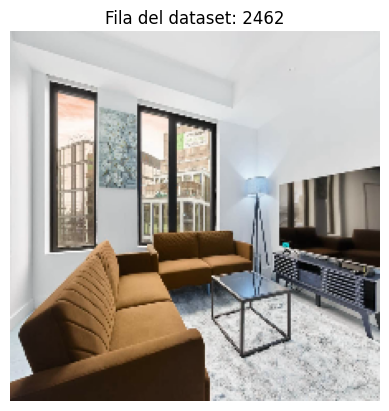

id                                                                           926938800680231486
listing_url                                     https://www.airbnb.com/rooms/926938800680231486
scrape_id                                                                        20231218233145
last_scraped                                                                         2023-12-19
source                                                                              city scrape
                                                                     ...                       
calculated_host_listings_count                                                                5
calculated_host_listings_count_entire_homes                                                   5
calculated_host_listings_count_private_rooms                                                  0
calculated_host_listings_count_shared_rooms                                                   0
reviews_per_month                       

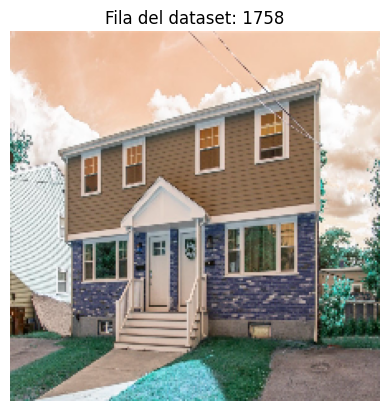

id                                                                           651321536161383325
listing_url                                     https://www.airbnb.com/rooms/651321536161383325
scrape_id                                                                        20231218233145
last_scraped                                                                         2023-12-19
source                                                                              city scrape
                                                                     ...                       
calculated_host_listings_count                                                                1
calculated_host_listings_count_entire_homes                                                   1
calculated_host_listings_count_private_rooms                                                  0
calculated_host_listings_count_shared_rooms                                                   0
reviews_per_month                       

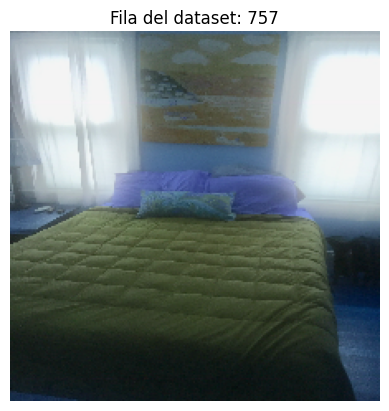

id                                                                           29303003
listing_url                                     https://www.airbnb.com/rooms/29303003
scrape_id                                                              20231218233145
last_scraped                                                               2023-12-19
source                                                                    city scrape
                                                                ...                  
calculated_host_listings_count                                                      1
calculated_host_listings_count_entire_homes                                         0
calculated_host_listings_count_private_rooms                                        1
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                0.26
Name: 757, Length: 72, dtype: object
-----------------

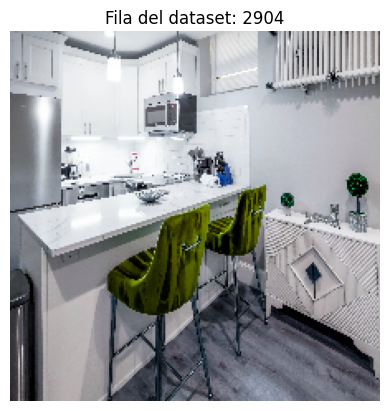

id                                                                           1024563493723714961
listing_url                                     https://www.airbnb.com/rooms/1024563493723714961
scrape_id                                                                         20231218233145
last_scraped                                                                          2023-12-19
source                                                                               city scrape
                                                                      ...                       
calculated_host_listings_count                                                                68
calculated_host_listings_count_entire_homes                                                   68
calculated_host_listings_count_private_rooms                                                   0
calculated_host_listings_count_shared_rooms                                                    0
reviews_per_month             

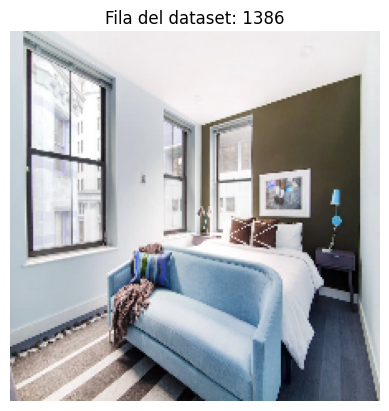

id                                                                           51284572
listing_url                                     https://www.airbnb.com/rooms/51284572
scrape_id                                                              20231218233145
last_scraped                                                               2023-12-19
source                                                                    city scrape
                                                                ...                  
calculated_host_listings_count                                                     72
calculated_host_listings_count_entire_homes                                        72
calculated_host_listings_count_private_rooms                                        0
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                 4.7
Name: 1386, Length: 72, dtype: object
----------------

In [ ]:
import matplotlib.pyplot as plt

# Tomar una muestra aleatoria de 5 imágenes y sus filas correspondientes en el dataset tabular
muestra_idxs = np.random.choice(len(images), size=5, replace=False)

# Mostrar las imágenes y los datos tabulares correspondientes
for i in muestra_idxs:
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Fila del dataset: {i}")
    plt.show()

    # Mostrar los datos tabulares correspondientes
    print(filtered_data.iloc[i])
    print("-" * 50)


### **Normalización de imágenes y conversión en el rango [0, 1]**


In [ ]:
# Normalizar imágenes al rango [0, 1]
images_normalized = images.astype("float32") / 255.

# Verificar la forma y el rango de valores después de la normalización
print(f"Forma de las imágenes: {images_normalized.shape}")
print(f"Rango de valores: {images_normalized.min()} - {images_normalized.max()}")


Forma de las imágenes: (3109, 224, 224, 3)
Rango de valores: 0.0 - 1.0


In [ ]:
# Guardar las imágenes normalizadas en un archivo NumPy
np.save('/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/images_normalized.npy', images_normalized)
print("Imágenes normalizadas guardadas correctamente.")


Imágenes normalizadas guardadas correctamente.


In [ ]:
# Verificar alineación entre imágenes e información tabular
assert images_normalized.shape[0] == filtered_data.shape[0], "¡Desalineación entre imágenes y datos tabulares!"
print("Dataset tabular e imágenes están alineados.")


Dataset tabular e imágenes están alineados.


In [ ]:
# Imprimir dimensiones de las primeras y últimas 5 imágenes
for i, img in enumerate(images):
    if i < 5 or i >= len(images) - 5:
        print(f"Imagen {i+1} dimensiones: {img.shape}")


Imagen 1 dimensiones: (224, 224, 3)
Imagen 2 dimensiones: (224, 224, 3)
Imagen 3 dimensiones: (224, 224, 3)
Imagen 4 dimensiones: (224, 224, 3)
Imagen 5 dimensiones: (224, 224, 3)
Imagen 3105 dimensiones: (224, 224, 3)
Imagen 3106 dimensiones: (224, 224, 3)
Imagen 3107 dimensiones: (224, 224, 3)
Imagen 3108 dimensiones: (224, 224, 3)
Imagen 3109 dimensiones: (224, 224, 3)


**Eliminar el $ de la columna 'price'**

In [ ]:
# Eliminar el símbolo de dólar y convertir a tipo numérico label 'price'
filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)
# Ver solo la columna 'price'
print(filtered_data['price'])



0       125.0
1       135.0
2       179.0
3        91.0
4        86.0
        ...  
3104     83.0
3105    107.0
3106    136.0
3107     83.0
3108    106.0
Name: price, Length: 3109, dtype: float64


In [ ]:
# Comprobar a abrirlos de nuevo
saved_data = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/filtered_data.csv", sep=';')
saved_imgs = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/images_normalized.npy")
saved_data.shape, saved_imgs.shape

((3109, 72), (3109, 224, 224, 3))

In [ ]:
saved_imgs.min()

0.0

In [ ]:
saved_imgs.max()

1.0

In [ ]:
type(saved_imgs[0])

numpy.ndarray

In [ ]:
saved_imgs.shape

(3109, 224, 224, 3)

In [ ]:
# Ver las primeras 5 filas de todas las columnas en filtered_data
saved_data.head()


id                         listing_url       scrape_id last_scraped  \
0   3781   https://www.airbnb.com/rooms/3781  20231218233145   2023-12-19   
1   5506   https://www.airbnb.com/rooms/5506  20231218233145   2023-12-19   
2   6695   https://www.airbnb.com/rooms/6695  20231218233145   2023-12-19   
3   8789   https://www.airbnb.com/rooms/8789  20231218233145   2023-12-19   
4  10813  https://www.airbnb.com/rooms/10813  20231218233145   2023-12-19   

        source                                        picture_url  host_id  \
0  city scrape  https://a0.muscache.com/pictures/24670/b2de044...     4804   
1  city scrape  https://a0.muscache.com/pictures/miso/Hosting-...     8229   
2  city scrape  https://a0.muscache.com/pictures/38ac4797-e7a4...     8229   
3  city scrape  https://a0.muscache.com/pictures/miso/Hosting-...    26988   
4  city scrape  https://a0.muscache.com/pictures/20b5b9c9-e1f4...    38997   

                                  host_url host_name  host_since  ...  \
0   https://www.airbnb.com/users/show/4804     Frank  2008-12-03  ...   
1   https://www.airbnb.com/users/show/8229     Terry  2009-02-19  ...   
2   https://www.airbnb.com/users/show/8229     Terry  2009-02-19  ...   
3  https://www.airbnb.com/users/show/26988      Anne  2009-07-22  ...   
4  https://www.airbnb.com/users/show/38997  Michelle  2009-09-16  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.96                   4.88                4.92   
1                        4.89                   4.55                4.75   
2                        4.95                   4.51                4.71   
3                        4.96                   4.96                4.56   
4                        5.00                   5.00                4.80   

      license instant_bookable calculated_host_listings_count  \
0         NaN                f                              1   
1  STR-490093                f                             10   
2  STR-491702                f                             10   
3         NaN                f                              9   
4         NaN                f                             11   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                          10   
2                                          10   
3                                           9   
4                                          11   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                           0               0.23  
1                                           0               0.68  
2                                           0               0.73  
3                                           0               0.24  
4                                           0               0.09  

[5 rows x 72 columns]

## ➗ **SPLIT DE DATOS EN TRAIN, VALIDATION Y TEST EN DATOS TABULARES E IMÁGENES**
---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir el dataset tabular en train, val y test y obtener los índices
fd_train, fd_test, idx_train, idx_test = train_test_split(
    filtered_data, range(len(filtered_data)), test_size=0.2, random_state=42
)
fd_train, fd_val, idx_train, idx_val = train_test_split(
    fd_train, idx_train, test_size=0.15, random_state=42
)

# Guardar cada conjunto tabular en un único archivo CSV en Google Drive
fd_train.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv", sep=';', index=False)
fd_val.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val.csv", sep=';', index=False)
fd_test.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test.csv", sep=';', index=False)

# Dividir las imágenes usando los índices obtenidos de los datos tabulares
imgs_train = saved_imgs[idx_train]
imgs_val = saved_imgs[idx_val]
imgs_test = saved_imgs[idx_test]

# Guardar los conjuntos de imágenes en archivos .npy
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train.npy", imgs_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val.npy", imgs_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy", imgs_test)


In [ ]:
import pandas as pd

# Cargar el último estado de fd_train desde Google Drive. ARCHIVOS DESPUES DE DIVISION DE DATOS.
fd_train = pd.read_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv', sep=';')
fd_val = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val.csv", sep=';',)
fd_test = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test.csv", sep=';')


In [ ]:
fd_train = pd.read_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv', sep=';')

## **C.  Normalización y redimensionado de datos numéricos y categóricos FD_TRAIN**

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#revisar valores únicos
fd_train.apply(lambda x: len(x.unique()))



id                                              2113
listing_url                                     2113
scrape_id                                          1
last_scraped                                       2
source                                             2
picture_url                                     2066
host_id                                          819
host_url                                         819
host_name                                        626
host_since                                       736
host_location                                     76
host_about                                       467
host_response_time                                 5
host_response_rate                                29
host_acceptance_rate                              60
host_is_superhost                                  3
host_thumbnail_url                               803
host_picture_url                                 803
host_neighbourhood                               104
host_listings_count                               64
host_total_listings_count                         77
host_verifications                                 5
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood                                     22
neighbourhood_cleansed                            25
neighbourhood_group_cleansed                       1
latitude                                        1889
longitude                                       1901
property_type                                     33
room_type                                          4
accommodates                                      16
bathrooms                                          1
bathrooms_text                                    19
bedrooms                                           1
beds                                              17
amenities                                          1
price                                            416
minimum_nights                                    39
maximum_nights                                    76
minimum_minimum_nights                            38
maximum_minimum_nights                            45
minimum_maximum_nights                            66
maximum_maximum_nights                            66
minimum_nights_avg_ntm                           140
maximum_nights_avg_ntm                           109
calendar_updated                                   1
has_availability                                   2
availability_30                                   31
availability_60                                   61
availability_90                                   91
availability_365                                 335
calendar_last_scraped                              2
number_of_reviews                                295
number_of_reviews_ltm                            105
number_of_reviews_l30d                            12
first_review                                    1090
last_review                                      447
review_scores_rating                             121
review_scores_accuracy                           101
review_scores_cleanliness                        114
review_scores_checkin                             87
review_scores_communication                       88
review_scores_location                           113
review_scores_value                              125
license                                          832
instant_bookable                                   2
calculated_host_listings_count                    42
calculated_host_listings_count_entire_homes       35
calculated_host_listings_count_private_rooms      20
calculated_host_listings_count_shared_rooms        3
reviews_per_month                                535
dtype: int64

In [ ]:
#Revisar que tipo de datos tenemos y nulls
data_overview = pd.DataFrame({
    'Data Type': fd_train.dtypes,
    'Total Nulls': fd_train.isnull().sum()
})

# Mostrar el DataFrame
data_overview



Data Type  Total Nulls
id                                               int64            0
listing_url                                     object            0
scrape_id                                        int64            0
last_scraped                                    object            0
source                                          object            0
picture_url                                     object            0
host_id                                          int64            0
host_url                                        object            0
host_name                                       object            0
host_since                                      object            0
host_location                                   object          504
host_about                                      object          667
host_response_time                              object          148
host_response_rate                              object          148
host_acceptance_rate                            object          141
host_is_superhost                               object           21
host_thumbnail_url                              object            0
host_picture_url                                object            0
host_neighbourhood                              object           54
host_listings_count                              int64            0
host_total_listings_count                        int64            0
host_verifications                              object            0
host_has_profile_pic                            object            0
host_identity_verified                          object            0
neighbourhood                                   object          816
neighbourhood_cleansed                          object            0
neighbourhood_group_cleansed                   float64         2113
latitude                                       float64            0
longitude                                      float64            0
property_type                                   object            0
room_type                                       object            0
accommodates                                     int64            0
bathrooms                                      float64         2113
bathrooms_text                                  object            0
bedrooms                                       float64         2113
beds                                           float64           33
amenities                                       object            0
price                                          float64            0
minimum_nights                                   int64            0
maximum_nights                                   int64            0
minimum_minimum_nights                           int64            0
maximum_minimum_nights                           int64            0
minimum_maximum_nights                           int64            0
maximum_maximum_nights                           int64            0
minimum_nights_avg_ntm                         float64            0
maximum_nights_avg_ntm                         float64            0
calendar_updated                               float64         2113
has_availability                                object            0
availability_30                                  int64            0
availability_60                                  int64            0
availability_90                                  int64            0
availability_365                                 int64            0
calendar_last_scraped                           object            0
number_of_reviews                                int64            0
number_of_reviews_ltm                            int64            0
number_of_reviews_l30d                           int64            0
first_review                                    object          495
last_review                                     object          495
review_scores_rating             

In [ ]:
# Identificar columnas con más del 50% de valores nulos
high_null_columns = data_overview[data_overview['Total Nulls'] > (0.5 * len(fd_train))]
high_null_columns


Data Type  Total Nulls
neighbourhood_group_cleansed   float64         2113
bathrooms                      float64         2113
bedrooms                       float64         2113
calendar_updated               float64         2113

### ⏰**DROPS DE COLUMNAS A DESCARTAR POR SER IRRELEVANTES**

❌ **100% NULLS:**
1. Eliminare *'calendar_update'* por que tiene 100 nulls% y ya tenemos otras 2 features de 'neighbourhood' por lo que *'neighbourhood_group_cleansed'* no hace falta.

2. Bathrooms' y 'bedrooms' se trabajaran mas adelante pues se contrastaran con 'bathrooms_text' y 'beds'.

❌ **OTRAS VARIABLES QUE NO APORTAN A PRICE:**

3.
*scrape_id:* no aporta información sobre la propiedad.

*last_scraped:* no aporta información sobre la propiedad.

*source:* no aporta información sobre la propiedad.

*host_id*: aporta información sobre el dueño, pero no sobre la propiedad *

*host_url:* no aporta información sobre la propiedad.

  *host_name:* no aporta información sobre la propiedad.

  *host_thumbnail_url:* no aporta información sobre la propiedad.

  *host_location:* no aporta información sobre la propiedad.

  *host_about:* no aporta información sobre la propiedad.

  *host_picture_url:* no aporta información sobre la propiedad.

  *Host_neighbourhood:* no aporta información sobre la propiedad.

  *host_listings_count:* no aporta información sobre la propiedad.

  *maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm, minimum_minimum_nights:* redundantes con maximun y minimu_nights

  *has_availability,availability_30,availability_60,availability_90:* es redundante se deja solo availability_365

  *calendar_last_scraped:* no aporta información sobre la propiedad.

  *license:* no aporta información valiosa a precio.

  *calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms, calculated_host_listings_count:* son redudantes contador relacionado con el dueño; no aporta información sobre la propiedad.

  *first_review:* no aporta información nueva; ya hay un dato de antiguedad del dueño con host_since

  *last_review:* no aporta información nueva.



In [ ]:
# Hacemos un drop de todas las columnas que no aportan información relevante a price o inmueble en df_train

not_useful_columns = [
    'first_review', 'last_review', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'calculated_host_listings_count', 'license', 'calendar_last_scraped',
    'has_availability', 'availability_30', 'availability_60', 'availability_90',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'minimum_minimum_nights', 'host_listings_count',
    'host_neighbourhood', 'host_picture_url', 'host_about', 'host_location',
    'host_thumbnail_url', 'host_name', 'host_url', 'host_id', 'source',
    'last_scraped', 'scrape_id', 'neighbourhood_group_cleansed', 'calendar_updated'
]

fd_train.drop(not_useful_columns, axis=1, inplace=True)


In [ ]:
fd_train.shape


(2113, 40)

## **Imputación de NULLS columnas numéricas:**

In [ ]:
# Identificar columnas numéricas con valores nulos
numeric_columns = fd_train.select_dtypes(include=['float64', 'int64']).columns
numeric_null_columns = numeric_columns[fd_train[numeric_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas numéricas con nulos
numeric_null_counts = fd_train[numeric_null_columns].isnull().sum()
numeric_null_counts



bathrooms                      2113
bedrooms                       2113
beds                             33
review_scores_rating            493
review_scores_accuracy          493
review_scores_cleanliness       493
review_scores_checkin           493
review_scores_communication     493
review_scores_location          493
review_scores_value             493
reviews_per_month               495
dtype: int64

# **nulls en review_scores_* y reviews_per_month**

Usaré la mediana para imputar valores nulos en las columnas de calificaciones (review_scores_*) y frecuencia de revisiones (reviews_per_month) por las siguientes razones:

1. Las calificaciones y frecuencias de revisiones suelen tener una distribución asimétrica. La mediana es más robusta porque representa el valor central de la distribución sin ser influenciada por outliers.

2. Las calificaciones y frecuencias son valores continuos y escalares.

In [ ]:
import pandas as pd
import joblib

# Imputaré review_scores* y reviews_per_month con la mediana
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'reviews_per_month']

# Crearé un diccionario para almacenar las medianas
medianas_reviews = {}

# Imputación de cada columna con la mediana y guardar la mediana en el diccionario
for column in review_columns:
    mediana = fd_train[column].median()
    fd_train[column] = fd_train[column].fillna(mediana)
    medianas_reviews[column] = mediana

# Guardar las medianas en un archivo pickle para reutilizarlas en val y test
joblib.dump(medianas_reviews, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/medianas_reviews.pkl')

# Imprimir el número de nulos restantes después de la imputación
print("Número de nulos restantes después de la imputación en reviews*:")
print(fd_train[review_columns].isnull().sum())


Número de nulos restantes después de la imputación en reviews*:
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


# **Imputación 'bathrooms' y 'bathrooms_text'**
Continuaré con 'bathrooms' que tiene 100% de nulos pero 'bathrooms_text' tiene valores, se puede extraer el número de baños de 'bathrooms_text' y utilizarlo para llenar el valor en 'bathrooms'.
'bathrooms_text' contiene "shared", se agregaria una columna binaria ('bathroom_shared') para indicar si el baño es compartido [1]o privado [0].

In [ ]:
# Ver las categorías únicas en 'bathrooms_text'
unique_bathrooms_text = fd_train['bathrooms_text'].unique()

# Mostrar las categorías únicas
print("Categorías únicas en 'bathrooms_text':")
print(unique_bathrooms_text)


Categorías únicas en 'bathrooms_text':
['1 bath' '1 shared bath' '2 baths' '2.5 shared baths' '3 baths' '0 baths'
 '0 shared baths' '1.5 baths' '1 private bath' '2 shared baths'
 '1.5 shared baths' '4.5 baths' '2.5 baths' '3.5 baths' '6 baths'
 'Half-bath' '5.5 baths' '5 baths' '3 shared baths']


In [ ]:
import re
import pandas as pd
import joblib

# Función ajustada para extraer el número de baños
def extract_bathrooms(text):
    if pd.isnull(text):
        return None
    text = str(text).lower()
    if "half" in text:  # Manejar específicamente "Half-bath"
        return 0.5
    match = re.search(r'(\d+(\.\d+)?)', text)  # Buscar números con decimales
    return float(match.group(1)) if match else None

# Crear columna 'bathrooms_shared' para indicar si el baño es compartido o no
fd_train['bathrooms_shared'] = fd_train['bathrooms_text'].apply(
    lambda x: 1 if 'shared' in str(x).lower() else 0
)

# Imputar bathrooms usando bathrooms_text
fd_train['bathrooms'] = fd_train['bathrooms'].combine_first(
    fd_train['bathrooms_text'].apply(extract_bathrooms)
)

# Verificar si 'bathrooms_text' puede eliminarse
if fd_train['bathrooms'].isnull().sum() == 0 and fd_train['bathrooms_shared'].isnull().sum() == 0:
    fd_train.drop(columns=['bathrooms_text'], inplace=True)
    print("'bathrooms_text' ha sido eliminada porque ya no hay nulos en 'bathrooms' y 'bathrooms_shared'.")
else:
    print("'bathrooms_text' no ha sido eliminada porque aún hay nulos en 'bathrooms' o 'bathrooms_shared'.")

# Guardar la información de imputación para reutilizar en val y test
bathrooms_median = fd_train['bathrooms'].median()  # Mediana para imputación en val y test
porcentaje_bathrooms_shared = fd_train['bathrooms_shared'].mean()  # Porcentaje de baños compartidos

joblib.dump({'bathrooms_median': bathrooms_median, 'porcentaje_bathrooms_shared': porcentaje_bathrooms_shared},
            '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/bathrooms_info.pkl')

# Imprimir resumen de imputación
print("Nulos en 'bathrooms' después de la imputación:", fd_train['bathrooms'].isnull().sum())
print("Nulos en 'bathrooms_shared':", fd_train['bathrooms_shared'].isnull().sum())


'bathrooms_text' ha sido eliminada porque ya no hay nulos en 'bathrooms' y 'bathrooms_shared'.
Nulos en 'bathrooms' después de la imputación: 0
Nulos en 'bathrooms_shared': 0


# **Imputar 'beds' que tiene 33 valores nulos**

Puedo aplicar la imputación condicional basada en agrupaciones por características:

Usare *'property_type', 'room_type', 'accommodates', 'bathrooms' y la nueva variable creada 'bathrooms_shared'* para formar grupos que puedan representar propiedades similares en términos de cantidad de camas.

Calculare la mediana de beds en cada grupo para obtener el número típico de camas en propiedades similares.

Para cada fila con beds nulo, rellenamos con la mediana correspondiente al grupo al que pertenece.

In [ ]:
import pandas as pd
import joblib

# Calcularé la mediana de 'beds' en cada grupo relevante y guardar las medianas calculadas
median_beds_grouped = fd_train.groupby(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_shared'])['beds'].median().reset_index()

# Renombrar la columna para evitar confusiones después del merge
median_beds_grouped.rename(columns={'beds': 'beds_median_grouped'}, inplace=True)

# Imputar los valores nulos de 'beds' utilizando las medianas calculadas por grupo
fd_train = fd_train.merge(median_beds_grouped, on=['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_shared'], how='left')
fd_train['beds'] = fd_train['beds'].fillna(fd_train['beds_median_grouped'])

# Imputar cualquier valor restante con la mediana global de 'beds'
mediana_global_beds = fd_train['beds'].median()
fd_train['beds'] = fd_train['beds'].fillna(mediana_global_beds)

# Eliminar la columna temporal 'beds_median_grouped' después de la imputación
fd_train.drop(columns=['beds_median_grouped'], inplace=True)

# Imprimir el número de nulos restantes en 'beds' después de la imputación
print("Nulos restantes en 'beds' después de la imputación:", fd_train['beds'].isnull().sum())

# Guardar las medianas calculadas para su uso en val y test
joblib.dump(median_beds_grouped, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/median_beds_grouped.pkl')
joblib.dump(mediana_global_beds, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/mediana_global_beds.pkl')


Nulos restantes en 'beds' después de la imputación: 0


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/mediana_global_beds.pkl']

# **Imputar 'bedrooms' que tiene 100% valores nulos**

Dado que 'bedrooms' tiene 100% de valores nulos en train, si lo hago por agrupación de variables similares, no se podrá calcular medianas útiles sin algún valor inicial.

Revisaré los valores unicos de las variables clave para imputar 'bedrooms'

In [ ]:
# Obtener los valores únicos de las variables clave para imputación
print("Valores únicos de 'property_type':", fd_train["property_type"].unique())
print("Valores únicos de 'room_type':", fd_train["room_type"].unique())
print("Valores únicos de 'accommodates':", fd_train["accommodates"].unique())
print("Valores únicos de 'beds':", fd_train["beds"].unique())
print("Valores únicos de 'bathrooms_shared':", fd_train["bathrooms_shared"].unique())


Valores únicos de 'property_type': ['Entire condo' 'Entire rental unit' 'Private room in rental unit'
 'Entire guest suite' 'Private room in home' 'Private room in townhouse'
 'Entire serviced apartment' 'Entire home'
 'Private room in bed and breakfast' 'Private room in guest suite'
 'Private room in condo' 'Entire place' 'Shared room in home'
 'Room in boutique hotel' 'Entire loft'
 'Private room in serviced apartment' 'Room in hotel'
 'Private room in minsu' 'Entire townhouse'
 'Shared room in bed and breakfast' 'Boat' 'Entire guesthouse' 'Houseboat'
 'Shared room in condo' 'Shared room in boutique hotel'
 'Room in aparthotel' 'Private room in loft' 'Shared room in rental unit'
 'Private room in casa particular' 'Private room in hostel' 'Private room'
 'Private room in vacation home' 'Entire vacation home']
Valores únicos de 'room_type': ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
Valores únicos de 'accommodates': [ 4  2  1  6  8  3  5 12 10  7  9 16 13 11 14 15]
V

## **Estrategia para imputar 'bedrooms' con reglas**

Segun los valores únicos, definiré reglas basadas en la estructura y lógica de *property_type, room_type, accommodates, beds, y bathrooms_shared*. Estas reglas garantizarán una imputación precisa de 'bedrooms' reproducible en train, validation, y test.

    ***A. Regla Basada en *room_type:* ***

Entire home/apt: Como es una unidad completa, es lógico asumir que el número de bedrooms está relacionado con la capacidad (accommodates).
La regla será:

Si accommodates ≤ 2 → bedrooms = 1.

Si 3 ≤ accommodates ≤ 4 → bedrooms = 2.

Si 5 ≤ accommodates ≤ 6 → bedrooms = 3.

Para accommodates > 6, aplicamos bedrooms = np.ceil(accommodates / 2).

Private room: La mayoría de las propiedades en esta categoría tienen una sola habitación. Imputaremos:

bedrooms = 1 (regla directa).

Hotel room y Shared room: Dado que son tipos de habitación sin división de áreas de descanso separadas, asignamos:

bedrooms = 1.


    ***B. Regla Complementaria con *property_type:* ***

Algunas propiedades específicas (como Entire condo, Entire rental unit, Entire guest suite) generalmente siguen las mismas reglas que Entire home/apt. Sin embargo, el uso de property_type sirve como validación de los valores que asigno asegurando que estoy cubriendo correctamente toda la variedad de propiedades.


    ***C. Regla Basada en *bathrooms_shared:* ***

Si el baño es compartido (bathrooms_shared = 1) y room_type es Private room, esto confirma que es una sola habitación.
Entonces:
bedrooms = 1.
Para los demás tipos, bathrooms_shared no afecta bedrooms directamente, pero se considera para validar los valores que se asignan en otros tipos.

Asi usó reglas claras que se aplican de forma determinística en train, luego en validation, y test, garantizando la consistencia sin riesgo de introducir sesgo.

In [ ]:
import numpy as np
import pandas as pd
from difflib import get_close_matches

# Definir los valores conocidos de 'room_type'
known_room_types = ["Entire home/apt", "Private room", "Hotel room", "Shared room"]

# Función de imputación de 'bedrooms' basada en reglas mejoradas
def imputar_bedrooms(df):
    for index, row in df.iterrows():
        room_type = row['room_type']

        # Normalizar valor: Convertir a minúsculas para evitar problemas de mayúsculas/minúsculas
        room_type_normalized = room_type.lower() if pd.notnull(room_type) else None

        # Intentar encontrar coincidencias aproximadas con los valores conocidos
        match = get_close_matches(room_type_normalized, [rt.lower() for rt in known_room_types], n=1, cutoff=0.8)

        # Si encontramos una coincidencia, utilizamos el valor conocido
        if match:
            room_type_final = match[0].capitalize()
        else:
            # Si no hay coincidencias, intentamos hacer una clasificación basada en accommodates
            accommodates = row['accommodates']
            if pd.notnull(accommodates):
                if accommodates <= 2:
                    room_type_final = "Private room"  # Suposición razonable si solo tiene capacidad para 2
                elif accommodates >= 3 and accommodates <= 6:
                    room_type_final = "Entire home/apt"  # Suposición razonable para acomodar 3 a 6 personas
                else:
                    room_type_final = "Entire home/apt"  # Suposición razonable para más de 6 personas
            else:
                # Si no podemos hacer una clasificación basada en accommodates, asignamos un valor por defecto
                room_type_final = "Unknown"

        # Aplicar reglas para imputar 'bedrooms'
        if room_type_final == "Entire home/apt":
            # Reglas para 'Entire home/apt'
            if row['accommodates'] <= 2:
                df.at[index, 'bedrooms'] = 1
            elif 3 <= row['accommodates'] <= 4:
                df.at[index, 'bedrooms'] = 2
            elif 5 <= row['accommodates'] <= 6:
                df.at[index, 'bedrooms'] = 3
            else:
                df.at[index, 'bedrooms'] = np.ceil(row['accommodates'] / 2)

        elif room_type_final == "Private room":
            # Regla para 'Private room'
            df.at[index, 'bedrooms'] = 1

        elif room_type_final in ["Hotel room", "Shared room"]:
            # Regla para 'Hotel room' y 'Shared room'
            df.at[index, 'bedrooms'] = 1

        elif room_type_final == "Unknown":
            # Valor predeterminado para un 'room_type' desconocido, basándose en el número de accommodates
            df.at[index, 'bedrooms'] = np.ceil(row['accommodates'] / 2) if pd.notnull(row['accommodates']) else 1

    return df

# Aplicar la función a fd_train
fd_train = imputar_bedrooms(fd_train)

# Verificar nulos restantes en 'bedrooms' después de la imputación en train
print("Nulos restantes en 'bedrooms' después de la imputación en fd_train:", fd_train['bedrooms'].isnull().sum())


Nulos restantes en 'bedrooms' después de la imputación en fd_train: 0


In [ ]:
# Mostrar 5 ejemplos de los valores imputados en 'bedrooms'
print(fd_train[fd_train['bedrooms'].notnull()].sample(5))

                      id                                      listing_url  \
1148  929544514870890094  https://www.airbnb.com/rooms/929544514870890094   
679             54232345            https://www.airbnb.com/rooms/54232345   
1768  620873135155545376  https://www.airbnb.com/rooms/620873135155545376   
189   724605018390971642  https://www.airbnb.com/rooms/724605018390971642   
289             11760822            https://www.airbnb.com/rooms/11760822   

                                            picture_url  host_since  \
1148  https://a0.muscache.com/pictures/prohost-api/H...  2019-09-25   
679   https://a0.muscache.com/pictures/prohost-api/H...  2019-08-13   
1768  https://a0.muscache.com/pictures/prohost-api/H...  2021-09-16   
189   https://a0.muscache.com/pictures/miso/Hosting-...  2021-09-16   
289   https://a0.muscache.com/pictures/af077fbb-c0b1...  2015-12-03   

      host_response_time host_response_rate host_acceptance_rate  \
1148  within a few hours                82

### **Imputación de NULLS columnas catégoricas:**

In [ ]:
# Identificar columnas categóricas con valores nulos
categorical_columns = fd_train.select_dtypes(include=['object']).columns
categorical_null_columns = categorical_columns[fd_train[categorical_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas categóricas con nulos
categorical_null_counts = fd_train[categorical_null_columns].isnull().sum()
print(categorical_null_counts)


host_response_time      148
host_response_rate      148
host_acceptance_rate    141
host_is_superhost        21
neighbourhood           816
dtype: int64


In [ ]:
# Ver todos los tipos de datos y el número de columnas de cada tipo en fd_train
data_types = fd_train.dtypes.value_counts()
print(data_types)


object     16
float64    14
int64      10
Name: count, dtype: int64


In [ ]:
fd_train['host_response_time'].unique()


array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

## **Imputar columnas host_**

_rate y _acceptance deben ser convertidas a numericos, tienen el simbolo % y luego el valor dividirlo en 100 para obtener un decimal del %.

Luego imputaré **_time** basado en reglas condicionales de host_is_superhost y host_response_rate:

1. Si el anfitrión es un superhost (host_is_superhost == 't') o tiene una tasa de respuesta alta (host_response_rate >= 0.9), se asigna "within an hour".

2. Si la tasa de respuesta es media (0.5 <= host_response_rate < 0.9), se asigna "within a day".

3. Si la tasa de respuesta es baja o nula (host_response_rate < 0.5 o None), se asigna "a few days or more".

Para imputar _response_rate y _acceptance_rate utilizare la media de cada grupo basado en host_is_superhost:

1. Calculo la media de host_response_rate y host_acceptance_rate para cada grupo (t o f en host_is_superhost), y se guardan en diccionarios.

2. Uso transform para rellenar los valores nulos con la media del grupo correspondiente.

Para imputar host_is_superhost utilizare la moda.

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Guardar la moda de 'host_is_superhost'
mode_host_is_superhost = fd_train['host_is_superhost'].mode()[0]

# Imputar 'host_is_superhost' con el valor más frecuente (moda) en el dataset
fd_train['host_is_superhost'] = fd_train['host_is_superhost'].fillna(mode_host_is_superhost)

# Convertir 'host_response_rate' y 'host_acceptance_rate' de texto a valores numéricos quitando el % y dividiendo el número por 100
fd_train['host_response_rate'] = fd_train['host_response_rate'].str.rstrip('%').astype(float) / 100
fd_train['host_acceptance_rate'] = fd_train['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

# Guardar las medias de 'host_response_rate' y 'host_acceptance_rate' por grupo de 'host_is_superhost'
mean_host_response_rate = fd_train.groupby('host_is_superhost')['host_response_rate'].mean().to_dict()
mean_host_acceptance_rate = fd_train.groupby('host_is_superhost')['host_acceptance_rate'].mean().to_dict()

# Imputar 'host_response_rate' y 'host_acceptance_rate' basado en la media dentro de los grupos de 'host_is_superhost'
fd_train['host_response_rate'] = fd_train.groupby('host_is_superhost')['host_response_rate'].transform(lambda x: x.fillna(x.mean()))
fd_train['host_acceptance_rate'] = fd_train.groupby('host_is_superhost')['host_acceptance_rate'].transform(lambda x: x.fillna(x.mean()))

# Imputar 'host_response_time' basado en reglas condicionales en función de 'host_is_superhost' y 'host_response_rate'
def imputar_host_response_time(row):
    if pd.isnull(row['host_response_time']):
        # Si el anfitrión es superhost o tiene una tasa de respuesta alta, asignar respuestas rápidas
        if row['host_is_superhost'] == 't' or (row['host_response_rate'] is not None and row['host_response_rate'] >= 0.9):
            return 'within an hour'
        # Si el anfitrión tiene una tasa de respuesta media
        elif row['host_response_rate'] is not None and 0.5 <= row['host_response_rate'] < 0.9:
            return 'within a day'
        # Si el anfitrión tiene una tasa de respuesta baja o es nulo
        else:
            return 'a few days or more'
    return row['host_response_time']

# Aplicar la imputación condicional a 'host_response_time'
fd_train['host_response_time'] = fd_train.apply(imputar_host_response_time, axis=1)

# Guardar la información para su uso en val y test
joblib.dump({'mean_host_response_rate': mean_host_response_rate,
             'mean_host_acceptance_rate': mean_host_acceptance_rate,
             'mode_host_is_superhost': mode_host_is_superhost},
            '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/host_info.pkl')

# Verificar nulos restantes en las columnas host_*
print("Nulos restantes en host_response_time:", fd_train['host_response_time'].isnull().sum())
print("Nulos restantes en host_response_rate:", fd_train['host_response_rate'].isnull().sum())
print("Nulos restantes en host_acceptance_rate:", fd_train['host_acceptance_rate'].isnull().sum())
print("Nulos restantes en host_is_superhost:", fd_train['host_is_superhost'].isnull().sum())


Nulos restantes en host_response_time: 0
Nulos restantes en host_response_rate: 0
Nulos restantes en host_acceptance_rate: 0
Nulos restantes en host_is_superhost: 0


In [ ]:
# Identificar columnas categóricas con valores nulos
categorical_columns = fd_train.select_dtypes(include=['object']).columns
categorical_null_columns = categorical_columns[fd_train[categorical_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas categóricas con nulos
categorical_null_counts = fd_train[categorical_null_columns].isnull().sum()
print(categorical_null_counts)


neighbourhood    816
dtype: int64


## **NULLS 'neighbourhood', primero CODIFICACIÓN**

In [ ]:
# Get the unique values of 'neighbourhood' in the training dataset
unique_neighbourhood_values = fd_train['neighbourhood'].unique()
print(unique_neighbourhood_values)
print(f'Número total de categorías únicas en neighbourhood: {len(unique_neighbourhood_values)}')



['Boston, Massachusetts, United States' nan
 'Brighton, Massachusetts, United States'
 'Jamaica Plain , Massachusetts, United States'
 'Boston, Ma , United States'
 'Jamaica Plain, Massachusetts, United States'
 'Dorchster , Massachusetts, United States'
 'Dorchester , Massachusetts, United States'
 'Boston , Massachusetts, United States'
 'Roslindale, Massachusetts, United States'
 'Dorchester, Massachusetts, United States'
 'Charlestown, Massachusetts, United States'
 ' Boston, Massachusetts, United States'
 'Hyde Park, Massachusetts, United States'
 'Dedham, Massachusetts, United States'
 'Jamaica Plain, Boston, Massachusetts, United States'
 'Boston, , Massachusetts, United States'
 'Boston/Charlestown , Massachusetts, United States'
 'West Roxbury, Massachusetts, United States'
 'Boston (Jamaica Plain), Massachusetts, United States'
 'Roxbury Crossing, Massachusetts, United States'
 'Hyde Park , Massachusetts, United States']
Número total de categorías únicas en neighbourhood: 22


In [ ]:
# Verificar las categorías únicas en 'neighbourhood_cleansed'
unique_neighbourhood_cleansed = fd_train['neighbourhood_cleansed'].unique()
print(unique_neighbourhood_cleansed)
print(f'Número total de categorías únicas en neighbourhood_cleansed: {len(unique_neighbourhood_cleansed)}')



['Roxbury' 'North End' 'Dorchester' 'Back Bay' 'South Boston' 'South End'
 'Downtown' 'Roslindale' 'West Roxbury' 'Jamaica Plain' 'Fenway'
 'Brighton' 'Allston' 'East Boston' 'Charlestown' 'Beacon Hill'
 'Bay Village' 'West End' 'Chinatown' 'Mission Hill' 'Hyde Park'
 'South Boston Waterfront' 'Mattapan' 'Leather District'
 'Longwood Medical Area']
Número total de categorías únicas en neighbourhood_cleansed: 25


Hay inconsistencias de formato y errores tipográficos en **"neighbourhood"** que deben corregirse para asegurar una imputación precisa y consistente. Estandarizare los valores de la columna.

**'neighbourhood' y 'neighbourhood_cleansed'** son columnas que se relacionan, cleansed no tiene nulos por lo que puedo tomarla como ayuda para imputar. Utilizare un LabelEncoder para combinar los valores de las 2 columnas y crear un conjunto de categorias y que las relaciones entre los dos se mantengan consistentes.

df_val y df_test se beneficiaran del labelencoder ajustado que se guardará y se le agregara una categoria "unknown" a cualquier dato nuevo que reciban.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Calcular la distancia de Haversine entre dos puntos geográficos (para guardar en val y test)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    return R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

# Limpieza y estandarización de las columnas 'neighbourhood' y 'neighbourhood_cleansed'
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.strip()
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"\s+", " ", regex=True)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r", ,", ",", regex=True)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"Dorchster", "Dorchester", regex=False)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"\s+,", ",", regex=True)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"\(.*\)", "", regex=True).str.strip()
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r", Massachusetts, United States", "", regex=False)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.strip()
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"Jamaica Plain, Boston", "Jamaica Plain", regex=False)

fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.strip()
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"\s+", " ", regex=True)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r", ,", ",", regex=True)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"Dorchster", "Dorchester", regex=False)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"\s+,", ",", regex=True)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"\(.*\)", "", regex=True).str.strip()
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r", Massachusetts, United States", "", regex=False)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.strip()

# Calcular los centroides geográficos (lat y long promedio) por barrio
centroides = fd_train.groupby('neighbourhood')[['latitude', 'longitude']].mean()
print("Centroides calculados:")
print(centroides.head())

# Obtener los valores únicos combinados para entrenar el LabelEncoder
combined_unique_values = pd.concat([fd_train['neighbourhood'], fd_train['neighbourhood_cleansed']]).unique()

# Añadir una categoría especial '<UNK>' para manejar valores nuevos en validación y prueba
combined_unique_values = np.append(combined_unique_values, "<UNK>")

# Codificar las columnas utilizando Label Encoding con los valores combinados
le_combined = LabelEncoder()
le_combined.fit(combined_unique_values)

fd_train['neighbourhood'] = le_combined.transform(fd_train['neighbourhood'])
fd_train['neighbourhood_cleansed'] = le_combined.transform(fd_train['neighbourhood_cleansed'])

print("Valores únicos resultantes de 'neighbourhood' y 'neighbourhood_cleansed':",
      pd.concat([fd_train['neighbourhood'], fd_train['neighbourhood_cleansed']]).unique())

# Guardar el LabelEncoder, los centroides y la función haversine para val y test
joblib.dump(le_combined, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/label_encoder_combined.pkl")
joblib.dump(centroides, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/centroides_neighbourhood.pkl")
joblib.dump(haversine, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/haversine_function.pkl")



Centroides calculados:
                            latitude  longitude
neighbourhood                                  
Boston                     42.334379 -71.081589
Boston, Ma, United States  42.310466 -71.101911
Boston/Charlestown         42.383180 -71.072110
Brighton                   42.342450 -71.157580
Charlestown                42.375950 -71.061677
Valores únicos resultantes de 'neighbourhood' y 'neighbourhood_cleansed': [ 5 31  8 17  6 12 23  9 16 11  7 30 25 24 22  2 26 28 13 15  1 14  4  3
 29 10 21 27 20 18 19]


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/haversine_function.pkl']

## **Imputación 'neighbourhood'**
 Ahora que 'neighbourhood' y 'neighbourhood_cleansed' han sido codificados de manera consistente, se puede proceder a imputar los valores faltantes de una manera que sea lógica,

**Vecindarios cercanos y neighbourhood_cleansed:**

Utilizaremos la columna neighbourhood_cleansed ya que ambas variables se refieren a zonas similares.

**Modelo KNN:**

Se puede imputar los valores faltantes utilizando los vecindarios más cercanos, basándose en las columnas latitude, longitude, y la codificación de neighbourhood_cleansed tomando en cuenta la proximidad geográfica y los vecindarios categóricos.


In [ ]:
from sklearn.impute import KNNImputer

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=3)

# Ajustar el imputador KNN con el conjunto de train
columns_for_imputation = ['latitude', 'longitude', 'neighbourhood', 'neighbourhood_cleansed']
fd_train_imputed = imputer.fit_transform(fd_train[columns_for_imputation])

# Actualizar el DataFrame con los valores imputados en 'neighbourhood'
fd_train['neighbourhood'] = fd_train_imputed[:, 2]

# Guardar el imputador ajustado para usarlo en los conjuntos de vsl y test
import joblib
joblib.dump(imputer, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/knn_imputer_trained.pkl")



['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/knn_imputer_trained.pkl']

In [ ]:
fd_train.isnull().sum()

id                             0
listing_url                    0
picture_url                    0
host_since                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
reviews_per_month              0
bathrooms_shared               0
dtype: int64

In [ ]:
# Guardar el dataset de entrenamiento imputado, SIN NULOS
fd_train.to_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed.csv', sep=';', index=False)

In [ ]:
# Identificar columnas categóricas con valores nulos
categorical_columns = fd_train.select_dtypes(include=['object']).columns
categorical_null_columns = categorical_columns[fd_train[categorical_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas categóricas con nulos
categorical_null_counts = fd_train[categorical_null_columns].isnull().sum()
print(categorical_null_counts)


Series([], dtype: float64)


## **Ya no tenemos NULLS ✅ ahora convertiremos las categóricas a númericas restantes:**

In [ ]:
import pandas as pd

# Cargar el archivo con todas las imputaciones
fd_train_imputed = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed.csv", sep=';')

# Identificar columnas categóricas no numéricas
categorical_columns = fd_train_imputed.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas restantes que no han sido convertidas a numéricas
print("Columnas categóricas no numéricas restantes:", categorical_columns)


Columnas categóricas no numéricas restantes: Index(['listing_url', 'picture_url', 'host_since', 'host_response_time',
       'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'property_type', 'room_type', 'amenities',
       'instant_bookable'],
      dtype='object')


In [ ]:
print("Información detallada del DataFrame:")
fd_train_imputed.info()

Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2113 non-null   int64  
 1   listing_url                  2113 non-null   object 
 2   picture_url                  2113 non-null   object 
 3   host_since                   2113 non-null   object 
 4   host_response_time           2113 non-null   object 
 5   host_response_rate           2113 non-null   float64
 6   host_acceptance_rate         2113 non-null   float64
 7   host_is_superhost            2113 non-null   object 
 8   host_total_listings_count    2113 non-null   int64  
 9   host_verifications           2113 non-null   object 
 10  host_has_profile_pic         2113 non-null   object 
 11  host_identity_verified       2113 non-null   object 
 12  neighbourhood                2113 non-n

## **Comenzaré con las categorias *host_**

In [ ]:
# Convertir la columna 'host_since' a datetime para crear la columna 'years_being_host' que indicaria la antiguedad del host

from datetime import datetime

fd_train_imputed['host_since'] = fd_train_imputed['host_since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
fd_train_imputed['years_being_host'] = fd_train_imputed['host_since'].apply(lambda x: datetime.now().year - x.year)

fd_train_imputed.drop(['host_since'], axis=1, inplace=True)

print(fd_train_imputed['years_being_host'].dtype)

int64


## **'host_response_time' valores unicos**

In [ ]:
print(fd_train_imputed['host_response_time'].unique())


['within an hour' 'within a few hours' 'within a day' 'a few days or more']


 Utilizaré un mapa ordinal que asigna valores numéricos basados en el tiempo de respuesta para que el modelo entienda la diferencia en términos de relevancia y prioridad.

    a. 'within an hour' → 4 (mejor, mayor prioridad para el modelo)

    b. 'within a few hours' → 3

    c. 'within a day' → 2

    d. 'a few days or more' → 1 (peor, menor prioridad)


El objetivo de esta asignación es que el modelo entienda que los tiempos de respuesta más rápidos tienen un mayor valor, y aquellos que tardan más reducen la calidad del servicio del host.

In [ ]:
# Mapping para convertir los valores de 'host_response_time' en valores numéricos relevancia
response_time_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

# Aplicar la transformación a la columna 'host_response_time'
fd_train_imputed['host_response_time'] = fd_train_imputed['host_response_time'].map(response_time_mapping)

# Verificar los valores únicos después de la transformación
print(fd_train_imputed['host_response_time'].unique())
print(fd_train_imputed['host_response_time'].dtype)


[4 3 2 1]
int64



## **host_is_superhost, host_has_profile_pic, host_identity_verified e 'instant_bookable'**
Son de tipo string 'f' y 't' por lo que podemos convertirlas en booleanos y luego en valores numericos binarios:
1 = True
0 = False



In [ ]:
# Convertir las cadenas 't' y 'f' a valores numéricos binarios (0 y 1) usando .apply()
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for col in boolean_columns:
    fd_train_imputed[col] = fd_train_imputed[col].apply(lambda x: 1 if x == 't' else 0)

# Verificar los valores únicos para confirmar la transformación
for col in boolean_columns:
    print(f"Valores únicos en {col} (train):", fd_train_imputed[col].unique())




Valores únicos en host_is_superhost (train): [0 1]
Valores únicos en host_has_profile_pic (train): [1 0]
Valores únicos en host_identity_verified (train): [1 0]
Valores únicos en instant_bookable (train): [1 0]


## **'host_verifications'**

Quiero que funcione mejor esta columna el label precio en la lógica de que: "un host con mas verificaciones es de mejor confianza y atrae mayor bookings."

Convertiré la columna 'host_verifications' str en listas reales.
Luego, contaré la cantidad de elementos en cada lista para crear una nueva columna llamada'num_host_verifications'. Estas listas se deben normalizar eliminando espacio para no tener problemas mas adelante.

Esta nueva característica será un valor numérico continuo que refleje el nivel de confianza del host, y debería correlacionarse positivamente con un precio más alto. En caso de que aparezca una lista vacia que note nga ningun ele mento de verificacion sera rellenado con un 0 para no generar problemas con datos futuros.

In [ ]:
print(fd_train_imputed['host_verifications'].unique())

["['email', 'phone']" "['email', 'phone', 'work_email']" "['phone']"
 "['phone', 'work_email']" '[]']


In [ ]:
from ast import literal_eval
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Convertir las cadenas de texto en listas reales usando literal_eval
fd_train_imputed['host_verifications'] = fd_train_imputed['host_verifications'].apply(literal_eval)

# Normalizar las listas eliminando espacios innecesarios y asegurando un formato consistente
fd_train_imputed['host_verifications'] = fd_train_imputed['host_verifications'].apply(
    lambda x: [item.strip().lower() for item in x]
)

# Contar el número de verificaciones para cada anfitrión, asegurando que las listas vacías sean tratadas como 0
fd_train_imputed['num_host_verifications'] = fd_train_imputed['host_verifications'].apply(
    lambda x: len(x) if len(x) > 0 else 0  # Listas vacías -> 0
)

# Clipping en el rango esperado (0 a 3)
fd_train_imputed['num_host_verifications'] = np.clip(
    fd_train_imputed['num_host_verifications'], 0, 3
)

# Escalar los valores directamente con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
fd_train_imputed['num_host_verifications'] = scaler.fit_transform(
    fd_train_imputed[['num_host_verifications']]
)

# Guardar el escalador para aplicarlo en val y test
joblib.dump(scaler, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/scaler_verifications.pkl')

# Eliminar la columna original 'host_verifications' para evitar redundancia
fd_train_imputed.drop('host_verifications', axis=1, inplace=True)

# Verificar las primeras filas para asegurarnos de que la transformación se realizó correctamente
print(fd_train_imputed[['num_host_verifications']].head())


   num_host_verifications
0                0.663333
1                0.663333
2                0.663333
3                0.663333
4                0.663333


## **'property_type'**

Como tiene bastantes valores unicos aplicaré un Target Encoding que asigna a cada tipo de propiedad un valor numérico que refleja su relación con el precio promedio de las propiedades que pertenecen a esa categoría.

**Calcularé las medias para cada 'property_type' en fd_train_imputed.**

In [ ]:
fd_train_imputed['property_type'].unique()

array(['Entire condo', 'Entire rental unit',
       'Private room in rental unit', 'Entire guest suite',
       'Private room in home', 'Private room in townhouse',
       'Entire serviced apartment', 'Entire home',
       'Private room in bed and breakfast', 'Private room in guest suite',
       'Private room in condo', 'Entire place', 'Shared room in home',
       'Room in boutique hotel', 'Entire loft',
       'Private room in serviced apartment', 'Room in hotel',
       'Private room in minsu', 'Entire townhouse',
       'Shared room in bed and breakfast', 'Boat', 'Entire guesthouse',
       'Houseboat', 'Shared room in condo',
       'Shared room in boutique hotel', 'Room in aparthotel',
       'Private room in loft', 'Shared room in rental unit',
       'Private room in casa particular', 'Private room in hostel',
       'Private room', 'Private room in vacation home',
       'Entire vacation home'], dtype=object)

In [ ]:
import joblib

# Calcular el promedio del precio para cada 'property_type' en el conjunto de entrenamiento
property_price_means = fd_train_imputed.groupby('property_type')['price'].mean().to_dict()

# Guardar las medias calculadas para 'property_type'
joblib.dump(property_price_means, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/property_price_means.pkl")

# Crear una nueva columna 'property_type_encoded' en el conjunto de train
fd_train_imputed['property_type_encoded'] = fd_train_imputed['property_type'].map(property_price_means)

# Eliminar la columna original 'property_type'
fd_train_imputed.drop('property_type', axis=1, inplace=True)

# Verificar las primeras filas para asegurarnos de que la transformación se realizó correctamente
print(fd_train_imputed[['property_type_encoded']].head())


   property_type_encoded
0             258.188889
1             195.894336
2              82.168798
3             195.894336
4             195.894336


##'**room_type'**
Aquí también calcularé la media del precio de cada room_type.

In [ ]:
fd_train_imputed['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
import joblib

# Calcular las medias específicas para cada 'room_type'
room_price_means = fd_train_imputed.groupby('room_type')['price'].mean().to_dict()

# Calcular la media global del precio
global_mean_price_train = fd_train_imputed['price'].mean()

# Guardar las medias específicas y la media global
joblib.dump(
    {'room_price_means': room_price_means, 'global_mean_price_train': global_mean_price_train},
    "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/room_price_means.pkl"
)

# Crear una nueva columna 'room_type_encoded' usando las medias específicas
fd_train_imputed['room_type_encoded'] = fd_train_imputed['room_type'].map(room_price_means)

# Eliminar la columna original 'room_type'
fd_train_imputed.drop('room_type', axis=1, inplace=True)

# Verificar las primeras filas para asegurarnos de que la transformación se realizó correctamente
print(fd_train_imputed[['room_type_encoded']].head())


   room_type_encoded
0         223.597325
1         223.597325
2         112.701754
3         223.597325
4         223.597325


In [ ]:
categorical_columns = fd_train_imputed.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['listing_url', 'picture_url', 'amenities'], dtype='object')


In [ ]:
# Separar los elementos de 'amenities' en una lista de valores únicos
unique_amenities = set()

# Iterar sobre cada fila de la columna 'amenities'
for amenities in fd_train['amenities']:
    if pd.notnull(amenities):  # Ignorar valores nulos
        amenities_list = amenities.strip('[]').replace('"', '').split(', ')
        unique_amenities.update(amenities_list)

# Mostrar los valores únicos
print(f"Cantidad total de valores únicos en 'amenities': {len(unique_amenities)}")
print("Valores únicos en 'amenities':")
print(unique_amenities)


Cantidad total de valores únicos en 'amenities': 1
Valores únicos en 'amenities':
{''}


In [ ]:
# Mostrar las primeras filas de la columna 'amenities'
print("Primeras filas de 'amenities':")
print(fd_train['amenities'].head(10))

# Contar cuántos valores son nulos o vacíos
empty_count = fd_train['amenities'].isnull().sum() + (fd_train['amenities'] == '').sum()
print(f"Cantidad de valores vacíos o nulos en 'amenities': {empty_count}")


Primeras filas de 'amenities':
0    []
1    []
2    []
3    []
4    []
5    []
6    []
7    []
8    []
9    []
Name: amenities, dtype: object
Cantidad de valores vacíos o nulos en 'amenities': 0


Eliminaré las ultimas columnas que no son numericas *'listing_url', 'picture_url', 'id' ya que no aportan al modelo y 'amenities' que tiene en su totalidad listas vacias.

Amenities podria vovler a ser creada mas adelante con la red neuronal de imagenes que permita ver los amenities y hacer tal vez una lista.

In [ ]:
# Eliminar columnas innecesarias del conjunto de entrenamiento
fd_train_imputed.drop(columns=['listing_url', 'picture_url', 'amenities', 'id'], inplace=True)

# Verificar que las columnas han sido eliminadas
print("Columnas restantes en fd_train_imputed:", fd_train_imputed.columns)



Columnas restantes en fd_train_imputed: Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms_shared', 'years_being_host', 'num_host_verifications',
       'property_type_encoded', 'room_type_encoded'],
      dtype='object')


In [ ]:
print(len(fd_train_imputed))


2113


In [ ]:
# Verificar si existen columnas no numéricas en fd_train_imputed
non_numeric_columns = fd_train_imputed.select_dtypes(exclude=['number']).columns

# Imprimir las columnas no numéricas
print("Columnas no numéricas en fd_train_imputed:", non_numeric_columns)


Columnas no numéricas en fd_train_imputed: Index([], dtype='object')


In [ ]:
# Guardar el conjunto de entrenamiento imputado y con todas las columnas convertidas a numéricas
fd_train_imputed.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num.csv", sep=';', index=False)

# Confirmación del guardado
print("El archivo CSV con los datos imputados y numéricos ha sido guardado como 'fd_train_imputed_num.csv'")


El archivo CSV con los datos imputados y numéricos ha sido guardado como 'fd_train_imputed_num.csv'


# **OUTLIERS**

In [ ]:
import pandas as pd

# Cargar el conjunto de entrenamiento imputado y numérico desde el archivo CSV
fd_train_imputed_num = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num.csv", sep=';')

# Confirmación de la carga
print("El archivo CSV 'fd_train_imputed_num.csv' ha sido cargado exitosamente.")


El archivo CSV 'fd_train_imputed_num.csv' ha sido cargado exitosamente.


In [ ]:
fd_train_imputed_num.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         2113.000000         2113.000000           2113.000000   
mean             3.751065            0.961458              0.896447   
std              0.577785            0.114913              0.191669   
min              1.000000            0.000000              0.000000   
25%              4.000000            0.980000              0.870024   
50%              4.000000            1.000000              0.980000   
75%              4.000000            1.000000              1.000000   
max              4.000000            1.000000              1.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count        2113.000000                2113.000000           2113.000000   
mean            0.333649                 151.434927              0.990062   
std             0.471628                 495.197130              0.099219   
min             0.000000                   1.000000              0.000000   
25%             0.000000                   4.000000              1.000000   
50%             0.000000                  16.000000              1.000000   
75%             1.000000                  76.000000              1.000000   
max             1.000000                6438.000000              1.000000   

       host_identity_verified  neighbourhood  neighbourhood_cleansed  \
count             2113.000000    2113.000000             2113.000000   
mean                 0.898722      15.169901               14.912447   
std                  0.301768      12.616803                8.418752   
min                  0.000000       5.000000                1.000000   
25%                  1.000000       5.000000                9.000000   
50%                  1.000000       5.000000               13.000000   
75%                  1.000000      31.000000               23.000000   
max                  1.000000      31.000000               30.000000   

          latitude    longitude  accommodates    bathrooms     bedrooms  \
count  2113.000000  2113.000000   2113.000000  2113.000000  2113.000000   
mean     42.335430   -71.082416      3.295315     1.244203     1.765263   
std       0.028014     0.032453      2.414222     0.624618     1.190153   
min      42.235330   -71.172533      1.000000     0.000000     1.000000   
25%      42.318910   -71.097190      2.000000     1.000000     1.000000   
50%      42.343190   -71.075740      2.000000     1.000000     1.000000   
75%      42.354570   -71.061340      4.000000     1.500000     2.000000   
max      42.390720   -70.996000     16.000000     6.000000     8.000000   

              beds         price  minimum_nights  maximum_nights  \
count  2113.000000   2113.000000     2113.000000     2113.000000   
mean      1.902982    186.185991       26.270232      518.108850   
std       1.620055    309.567305       35.369751      411.662854   
min       1.000000     20.000000        1.000000        3.000000   
25%       1.000000     77.000000        1.000000      180.000000   
50%       1.000000    122.000000        9.000000      365.000000   
75%       2.000000    200.000000       29.000000     1125.000000   
max      22.000000  10000.000000      400.000000     1125.000000   

       availability_365  number_of_reviews  number_of_reviews_ltm  \
count       2113.000000        2113.000000            2113.000000   
mean         200.606247          49.818741              13.060104   
std          134.719564          92.030811              21.175822   
min            0.000000           0.000000               0.000000   
25%           77.000000           1.000000               0.000000   
50%          224.000000          10.000000               3.000000   
75%          337.000000          59.000000              18.000000   
max          365.000000         829.000000             152.000000   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
count             2113.000000     

## **OUTLIERS en 'price'**

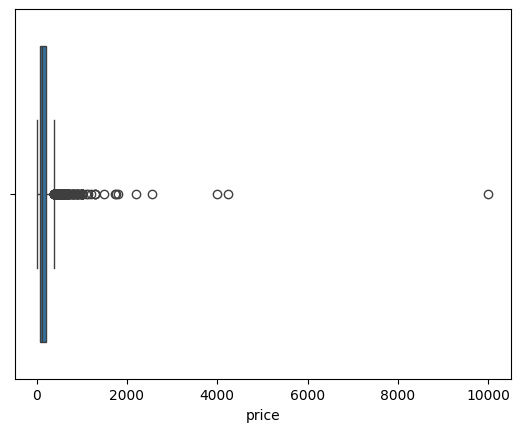

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot para la columna `price`
sns.boxplot(x=fd_train_imputed_num['price'])
plt.show()


In [ ]:
# Calcular el límite superior en el percentil 99 de la columna `price`
upper_limit = fd_train_imputed_num['price'].quantile(0.99)

# Filtrar los registros que superan el límite superior
outliers = fd_train_imputed_num[fd_train_imputed_num['price'] > upper_limit]

# Mostrar solo las columnas relevantes de los registros con outliers extremos
outliers_filtered = outliers[['price', 'accommodates', 'bedrooms', 'property_type_encoded', 'room_type_encoded', 'bathrooms_shared', 'beds']]
print(outliers_filtered)



        price  accommodates  bedrooms  property_type_encoded  \
226    1017.0             4       1.0             453.157895   
243    1017.0             4       1.0             453.157895   
364    1017.0             2       1.0             453.157895   
421    1300.0            10       5.0             397.219048   
427    1293.0            16       8.0             403.230769   
606    2557.0            16       8.0             397.219048   
673    1200.0             6       3.0             397.219048   
705    1100.0             5       3.0             195.894336   
853    1729.0            10       5.0             397.219048   
897    4245.0             1       1.0              82.168798   
906    1017.0             4       1.0             453.157895   
992   10000.0             2       1.0             648.954545   
1031   1017.0             2       1.0             453.157895   
1468   3999.0             4       2.0             258.188889   
1470   1017.0             2       1.0   

*'price'* tiene valores extremos, su mayoria estan en una media de 199 y hay un max de 10000 por lo que podemos trabajar esto con transformación logarítmica:


Hay precios como $4,245, $9,770 y  $10,000 que son significativamente más altos que el resto y podrían estar sesgando la distribución de precios que no coinciden viendo las imagenes con su tamaño, lo que ofrecen y sus precios por los que considero errores y los eliminaré.

In [ ]:
# Contar registros antes de eliminar outliers
initial_train_count = fd_train_imputed_num.shape[0]

# Identificar índices de los registros que serán eliminados
outliers_train = fd_train_imputed_num[fd_train_imputed_num['price'] > 3000].index

# Eliminar registros
fd_train_imputed_num = fd_train_imputed_num.drop(outliers_train)

# Contar registros después de eliminar outliers
final_train_count = fd_train_imputed_num.shape[0]

# Mostrar cuántos registros se eliminaron
print(f"Registros eliminados en train: {initial_train_count - final_train_count}")
print(f"Registros restantes en train después del filtro: {final_train_count}")


Registros eliminados en train: 3
Registros restantes en train después del filtro: 2110


#### ⏰ OJO AQUI SE ELIMINARON 3 REGISTROS QUE DEBEN EMPATARSE CON LOS DE IMAGENES.NPY

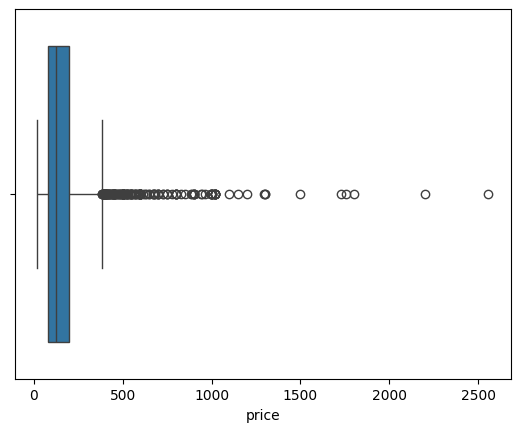

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para la columna `price`
sns.boxplot(x=fd_train_imputed_num['price'])
plt.show()

El nuevo gráfico muestra menos puntos aislados y están más concentrados hacia la parte izquierda del gráfico.

Se observa que el límite superior ahora llega aproximadamente a $3,000.

Esto es un resultado directo de haber eliminado aquellos registros con precios superiores a $3,000 y que no justificaban dicho precio basados en otras características (como accommodates y beds).

La mayoría de los datos se encuentran dentro de un rango razonable para el contexto del dataset, lo cual debería mejorar el entrenamiento del modelo y su capacidad de generalización.

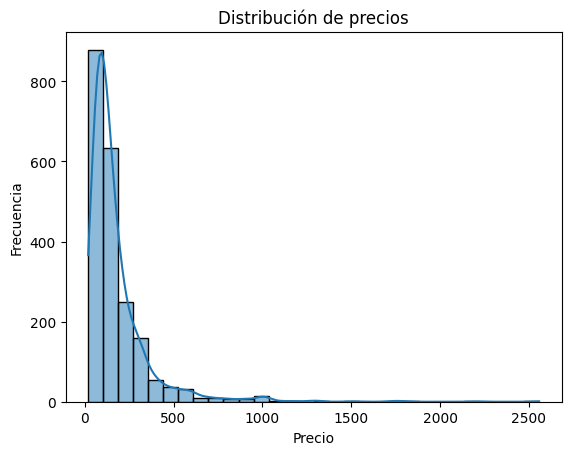

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de 'price' con un histograma y KDE
sns.histplot(fd_train_imputed_num['price'], bins=30, kde=True)

# Etiquetas y título
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios")

# Mostrar la gráfica
plt.show()


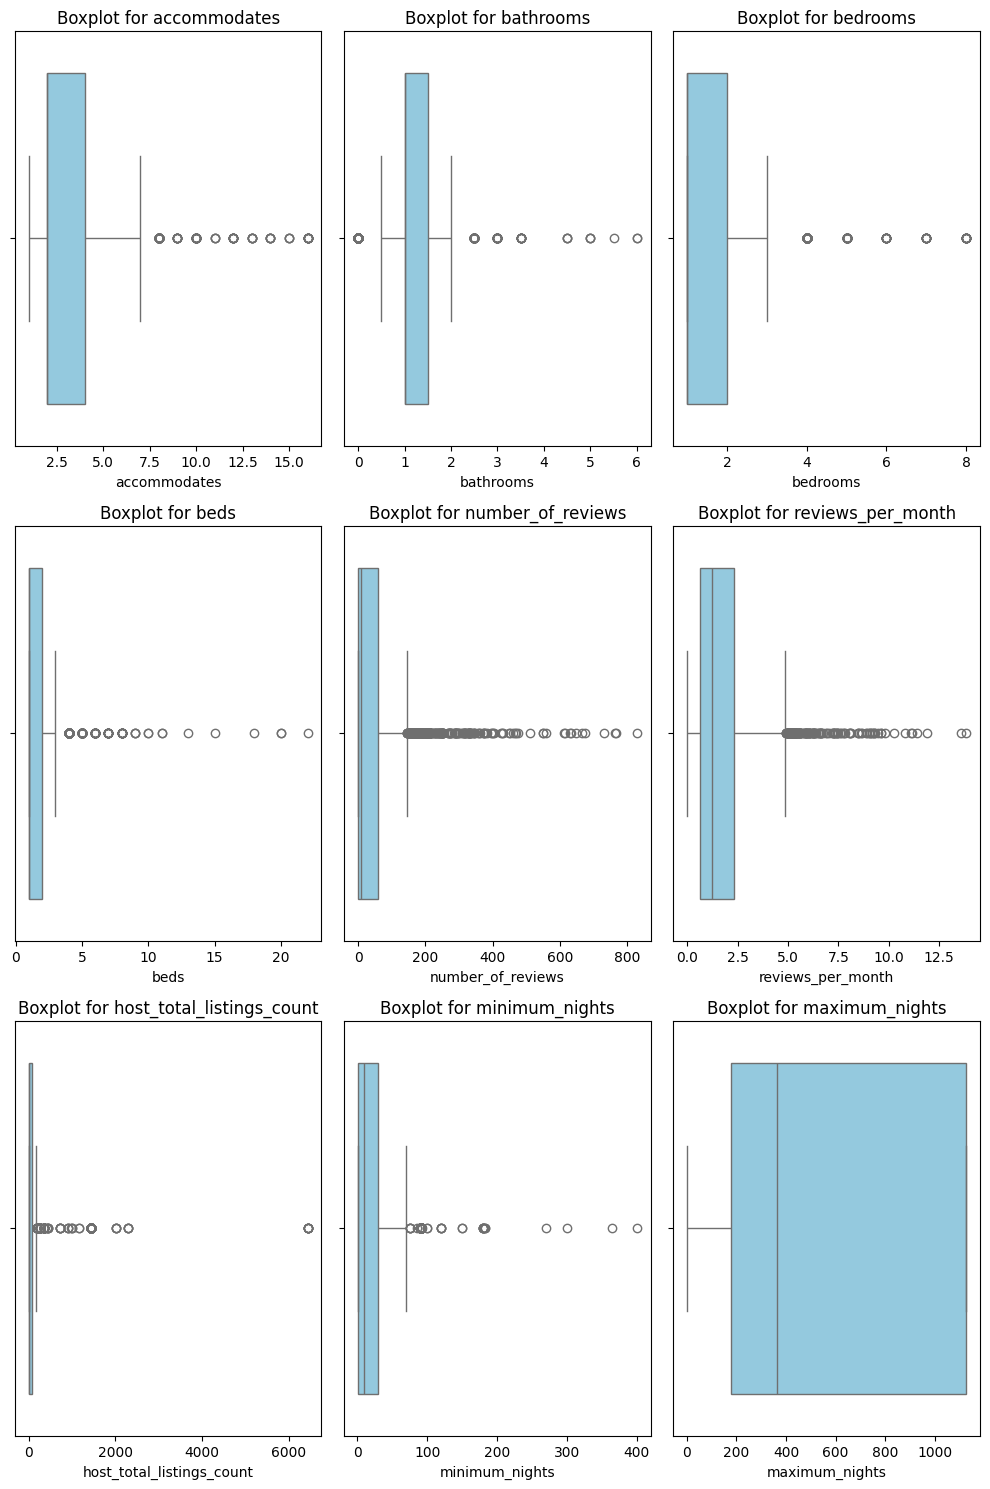

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas con outliers para visualización
columns_with_outliers = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'reviews_per_month', 'host_total_listings_count', 'minimum_nights', 'maximum_nights']

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 15))  # Aumentar la altura para acomodar más subplots

# Generar boxplots para cada una de las variables con posibles outliers
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 3, i)  # Definir una cuadrícula de 3x3 para 9 gráficos
    sns.boxplot(data=fd_train_imputed_num, x=column, color='skyblue')
    plt.title(f'Boxplot for {column}')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Mostrar los valores máximos y mínimos de cada columna en el dataset
print("Valores mínimos de cada columna:")
print(fd_train_imputed_num.min())

print("\nValores máximos de cada columna:")
print(fd_train_imputed_num.max())


Valores mínimos de cada columna:
host_response_time              1.000000
host_response_rate              0.000000
host_acceptance_rate            0.000000
host_is_superhost               0.000000
host_total_listings_count       1.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
neighbourhood                   5.000000
neighbourhood_cleansed          1.000000
latitude                       42.235330
longitude                     -71.172533
accommodates                    1.000000
bathrooms                       0.000000
bedrooms                        1.000000
beds                            1.000000
price                          20.000000
minimum_nights                  1.000000
maximum_nights                  3.000000
availability_365                0.000000
number_of_reviews               0.000000
number_of_reviews_ltm           0.000000
number_of_reviews_l30d          0.000000
review_scores_rating            1.000000
review_scores_accuracy  

Capping: aplicaré capping al percentil 99 de cada columna en la lista *(number_of_reviews', 'reviews_per_month', 'host_total_listings_count', 'minimum_nights', 'maximum_nights')*. Esto asegura que los valores que son superiores al percentil 99 se recorten (cap) al valor del percentil 99.

In [ ]:
import numpy as np
import pickle

# Aplicar capping para corregir outliers en el conjunto de entrenamiento (fd_train)
capping_thresholds = {}
for column in ['number_of_reviews', 'reviews_per_month', 'host_total_listings_count', 'minimum_nights', 'maximum_nights']:
    # Calcular el threshold para el capping
    threshold = fd_train_imputed_num[column].quantile(0.99)
    capping_thresholds[column] = threshold

    # Aplicar capping en los valores que superan el threshold
    fd_train_imputed_num[column] = np.where(fd_train_imputed_num[column] > threshold, threshold, fd_train_imputed_num[column])

# Guardar los thresholds para ser usados posteriormente en val y test
with open('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/capping_thresholds.pkl', 'wb') as f:
    pickle.dump(capping_thresholds, f)

# Verificar algunos valores después del capping en fd_train
print("Valores después del capping en 'host_total_listings_count':")
print(fd_train_imputed_num['host_total_listings_count'].sort_values(ascending=False).head())



Valores después del capping en 'host_total_listings_count':
1044    1436.0
1067    1436.0
890     1436.0
1239    1436.0
708     1436.0
Name: host_total_listings_count, dtype: float64


In [ ]:
# Guardar el fd_train_imputed_num_out preprocesado CON TRABAJO DE OUTLIERS en un archivo CSV
fd_train_imputed_num.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num_out.csv", sep=';', index=False)


In [ ]:
# Cargar el DataFrame preprocesado preprocesado CON TRABAJO DE OUTLIERS desde un archivo CSV
import pandas as pd
fd_train_imputed_num_out = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num_out.csv", sep=';')


## **NORMALIZACIÓN**

In [ ]:
fd_train_imputed_num_out.shape

(2110, 36)

In [ ]:
# Obtener las columnas que son numéricas
numeric_columns = fd_train_imputed_num_out.select_dtypes(include=['float64', 'int64']).columns

# Contar cuántas columnas numéricas hay
num_numeric_columns = len(numeric_columns)

print("Número de columnas numéricas:", num_numeric_columns)
print("Columnas numéricas:", numeric_columns)


Número de columnas numéricas: 36
Columnas numéricas: Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms_shared', 'years_being_host', 'num_host_verifications',
       'property_type_encoded', 'room_type_encoded'],
      dtype='object')


### Quiero revisar *'neighbourhood', 'neighbourhood_cleansed'* por que debo eliminar alguna de ellas, poseen info similar.

In [ ]:
import pandas as pd

# Calcular la matriz de correlación para 'neighbourhood', 'neighbourhood_cleansed', y 'price_log'
corr_matrix = fd_train_imputed_num_out[['neighbourhood', 'neighbourhood_cleansed', 'price']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre 'neighbourhood', 'neighbourhood_cleansed' y 'price':")
print(corr_matrix)

# Evaluar correlación específica entre 'neighbourhood' y 'neighbourhood_cleansed'
corr_neigh = corr_matrix.loc['neighbourhood', 'neighbourhood_cleansed']
print(f"\nCorrelación entre 'neighbourhood' y 'neighbourhood_cleansed': {corr_neigh}")

# Evaluar cuál columna tiene mayor correlación con 'price_log'
corr_with_price_neigh = corr_matrix.loc['neighbourhood', 'price']
corr_with_price_neigh_cleansed = corr_matrix.loc['neighbourhood_cleansed', 'price']

print(f"\nCorrelación entre 'neighbourhood' y 'price': {corr_with_price_neigh}")
print(f"Correlación entre 'neighbourhood_cleansed' y 'price': {corr_with_price_neigh_cleansed}")

# Decidir cuál columna quedarse
if abs(corr_with_price_neigh) > abs(corr_with_price_neigh_cleansed):
    print("\n'neighbourhood' tiene mayor correlación con el precio. Es mejor quedarte con esta columna.")
elif abs(corr_with_price_neigh) < abs(corr_with_price_neigh_cleansed):
    print("\n'neighbourhood_cleansed' tiene mayor correlación con el precio.")
else:
    print("\nAmbas columnas tienen una correlación similar con el precio.")


Matriz de correlación entre 'neighbourhood', 'neighbourhood_cleansed' y 'price':
                        neighbourhood  neighbourhood_cleansed     price
neighbourhood                1.000000               -0.028825  0.005545
neighbourhood_cleansed      -0.028825                1.000000  0.011278
price                        0.005545                0.011278  1.000000

Correlación entre 'neighbourhood' y 'neighbourhood_cleansed': -0.028825135518784628

Correlación entre 'neighbourhood' y 'price': 0.0055451750527508005
Correlación entre 'neighbourhood_cleansed' y 'price': 0.011278068046553248

'neighbourhood_cleansed' tiene mayor correlación con el precio.


In [ ]:
#Eliminar la columna 'neighbourhood' para evitar redundancias

fd_train_imputed_num_out.drop(columns=['neighbourhood'], inplace=True)


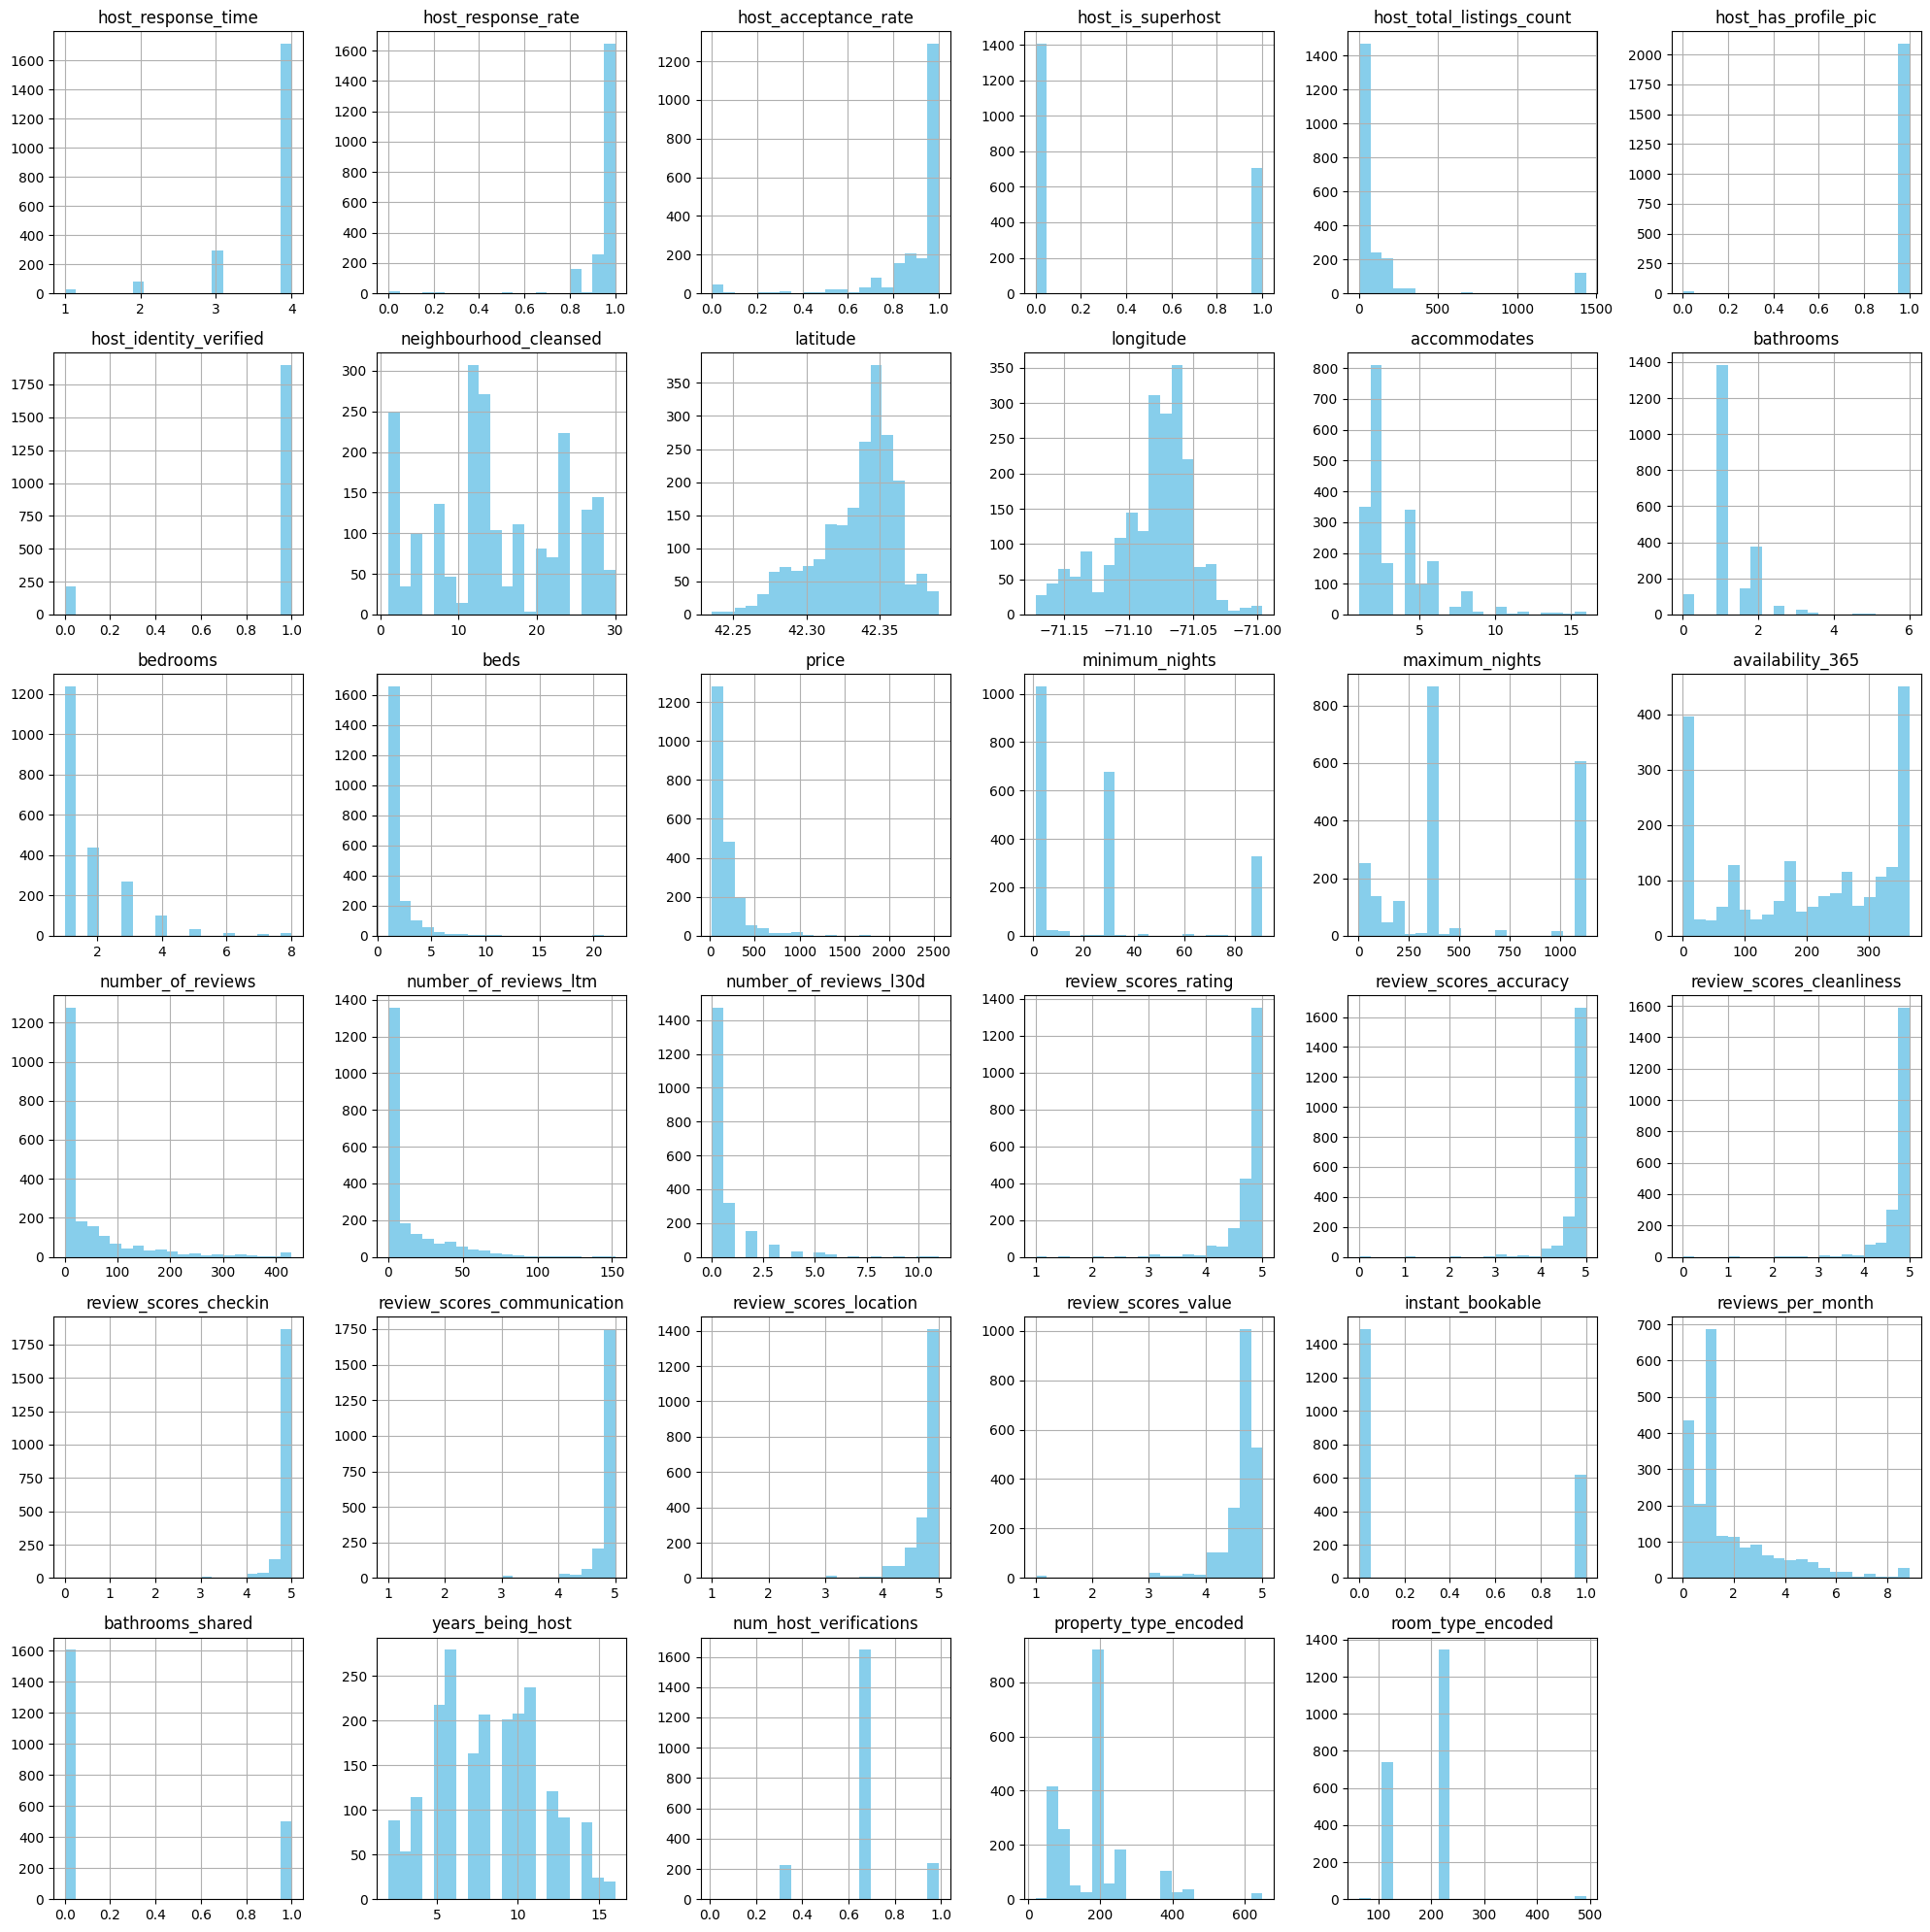

In [ ]:
import matplotlib.pyplot as plt

# Asegurarse de que numeric_columns contiene solo columnas que están actualmente en fd_train_imputed_num_out
numeric_columns = [col for col in numeric_columns if col in fd_train_imputed_num_out.columns]

# Crear histogramas de las columnas numéricas para evaluar la necesidad de normalización
fd_train_imputed_num_out[numeric_columns].hist(figsize=(20, 20), bins=20, color='skyblue')
plt.tight_layout()
plt.show()


In [ ]:
print(fd_train_imputed_num_out.head(6).to_string())

   host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost  host_total_listings_count  host_has_profile_pic  host_identity_verified  neighbourhood_cleansed   latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  minimum_nights  maximum_nights  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  reviews_per_month  bathrooms_shared  years_being_host  num_host_verifications  property_type_encoded  room_type_encoded
0                   4                1.00                  1.00                  0                        6.0                     1                       1                      24  42.320090 -71.075210             4        1.0       2.0   2.0  121.0             2.0          1125.0               119              135.0       

####Normalizaré 'bedrooms', 'beds', 'accommodates', 'bathrooms'

In [ ]:
# Revisar los valores máximos y mínimos de las columnas 'bedrooms' y 'beds' en fd_train_imputed_num_out
bedrooms_beds_stats = fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']].agg(['min', 'max'])

# Mostrar los resultados
bedrooms_beds_stats


bedrooms  beds  accommodates  bathrooms
min       1.0   1.0             1        0.0
max       8.0  22.0            16        6.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Inicializar el escalador Min-Max con rango ajustado
scaler_bedrooms_beds_adjusted = MinMaxScaler(feature_range=(0.01, 0.99))

# Aplicar el escalador a las columnas 'bedrooms', 'beds', 'accommodates', 'bathrooms'
fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']] = scaler_bedrooms_beds_adjusted.fit_transform(
    fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']]
)

# Guardar el escalador para usarlo en validación y prueba
joblib.dump(scaler_bedrooms_beds_adjusted, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/scaler_bedrooms_beds_adjusted.pkl')

# Verificar los valores después del ajuste
adjusted_bedrooms_beds_stats_train = fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']].agg(['min', 'max'])

# Mostrar los resultados
print("Estadísticas después del ajuste en train:")
print(adjusted_bedrooms_beds_stats_train)


Estadísticas después del ajuste en train:
     bedrooms  beds  accommodates  bathrooms
min      0.01  0.01          0.01       0.01
max      0.99  0.99          0.99       0.99


In [ ]:
fd_train_imputed_num_out.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         2110.000000         2110.000000           2110.000000   
mean             3.750711            0.961455              0.896447   
std              0.578119            0.114991              0.191800   
min              1.000000            0.000000              0.000000   
25%              4.000000            0.980000              0.870024   
50%              4.000000            1.000000              0.980000   
75%              4.000000            1.000000              1.000000   
max              4.000000            1.000000              1.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count        2110.000000                2110.000000           2110.000000   
mean            0.334123                 132.305213              0.990047   
std             0.471795                 332.294985              0.099289   
min             0.000000                   1.000000              0.000000   
25%             0.000000                   4.000000              1.000000   
50%             0.000000                  16.000000              1.000000   
75%             1.000000                  76.000000              1.000000   
max             1.000000                1436.000000              1.000000   

       host_identity_verified  neighbourhood_cleansed     latitude  \
count             2110.000000             2110.000000  2110.000000   
mean                 0.899052               14.916114    42.335454   
std                  0.301331                8.424156     0.028012   
min                  0.000000                1.000000    42.235330   
25%                  1.000000                9.000000    42.318914   
50%                  1.000000               13.500000    42.343215   
75%                  1.000000               23.000000    42.354570   
max                  1.000000               30.000000    42.390720   

         longitude  ...  review_scores_communication  review_scores_location  \
count  2110.000000  ...                  2110.000000             2110.000000   
mean    -71.082449  ...                     4.859469                4.761844   
std       0.032463  ...                     0.320213                0.335007   
min     -71.172533  ...                     1.000000                1.000000   
25%     -71.097768  ...                     4.870000                4.710000   
50%     -71.075777  ...                     4.940000                4.850000   
75%     -71.061363  ...                     5.000000                4.950000   
max     -70.996000  ...                     5.000000                5.000000   

       review_scores_value  instant_bookable  reviews_per_month  \
count          2110.000000       2110.000000        2110.000000   
mean              4.619308          0.292891           1.794426   
std               0.410671          0.455197           1.758733   
min               1.000000          0.000000           0.010000   
25%               4.570000          0.000000           0.640000   
50%               4.700000          0.000000           1.235000   
75%               4.807500          1.000000           2.347500   
max               5.000000          1.000000           8.852900   

       bathrooms_shared  years_being_host  num_host_verifications  \
count       2110.000000       2110.000000             2110.000000   
mean           0.238389          8.229858                0.664727   
std            0.426199          3.258393                0.153712   
min            0.000000          2.000000                0.010000   
25%            0.000000          6.000000                0.663333   
50%            0.000000          8.000000                0.663333   
75%            0.000000         11.000000                0.663333   
max            1.000000         16.000000                0.990000   

       property_type_encoded  room_type_encoded  
count            2110.000000        2110.0000

In [ ]:
import pandas as pd

# Columnas sin truncar
pd.set_option('display.max_columns', None)

print("\nMínimo y máximo en cada columna de fd_train_imputed_num_out:")
min_max_test = fd_train_imputed_num_out.agg(['min', 'max'])
print(min_max_test)

# Opcional: Restaurar configuración para evitar demasiadas columnas en futuras salidas
pd.reset_option('display.max_columns')


Mínimo y máximo en cada columna de fd_train_imputed_num_out:
     host_response_time  host_response_rate  host_acceptance_rate  \
min                   1                 0.0                   0.0   
max                   4                 1.0                   1.0   

     host_is_superhost  host_total_listings_count  host_has_profile_pic  \
min                  0                        1.0                     0   
max                  1                     1436.0                     1   

     host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
min                       0                       1  42.23533 -71.172533   
max                       1                      30  42.39072 -70.996000   

     accommodates  bathrooms  bedrooms  beds   price  minimum_nights  \
min          0.01       0.01      0.01  0.01    20.0             1.0   
max          0.99       0.99      0.99  0.99  2557.0            91.0   

     maximum_nights  availability_365  number_of_reviews  

# **Transformación Logarítmica (log1p)**

"price"

In [ ]:
import numpy as np
import joblib

# Aplicar log1p a la variable objetivo 'price' en Train
fd_train_imputed_num_out['price'] = np.log1p(fd_train_imputed_num_out['price'])

# Guardar información para revertir la transformación después del modelo
joblib.dump({'transformation': 'log1p'},
            "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/price_transform.pkl")

print("✅ Transformación logarítmica aplicada en `price` de Train y guardada correctamente.")


✅ Transformación logarítmica aplicada en `price` de Train y guardada correctamente.


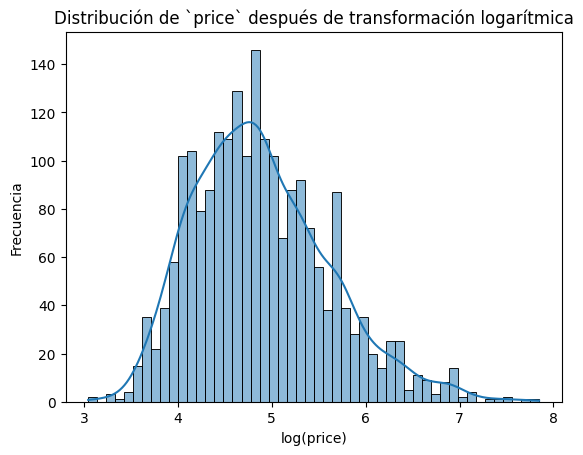

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(fd_train_imputed_num_out['price'], bins=50, kde=True)
plt.title("Distribución de `price` después de transformación logarítmica")
plt.xlabel("log(price)")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
import numpy as np
import joblib

# Columnas a transformar con log1p
columns_to_log_transform = [
    'host_total_listings_count', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'reviews_per_month'
]

# Aplicar transformación logarítmica en train
for col in columns_to_log_transform:
    fd_train_imputed_num_out[col] = np.log1p(fd_train_imputed_num_out[col])  # log(1 + x)

# Guardar los parámetros de transformación para aplicar en val y test
joblib.dump(columns_to_log_transform, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/log_transform_columns.pkl")

print("✅ Transformación logarítmica aplicada en `train` y parámetros guardados.")


✅ Transformación logarítmica aplicada en `train` y parámetros guardados.


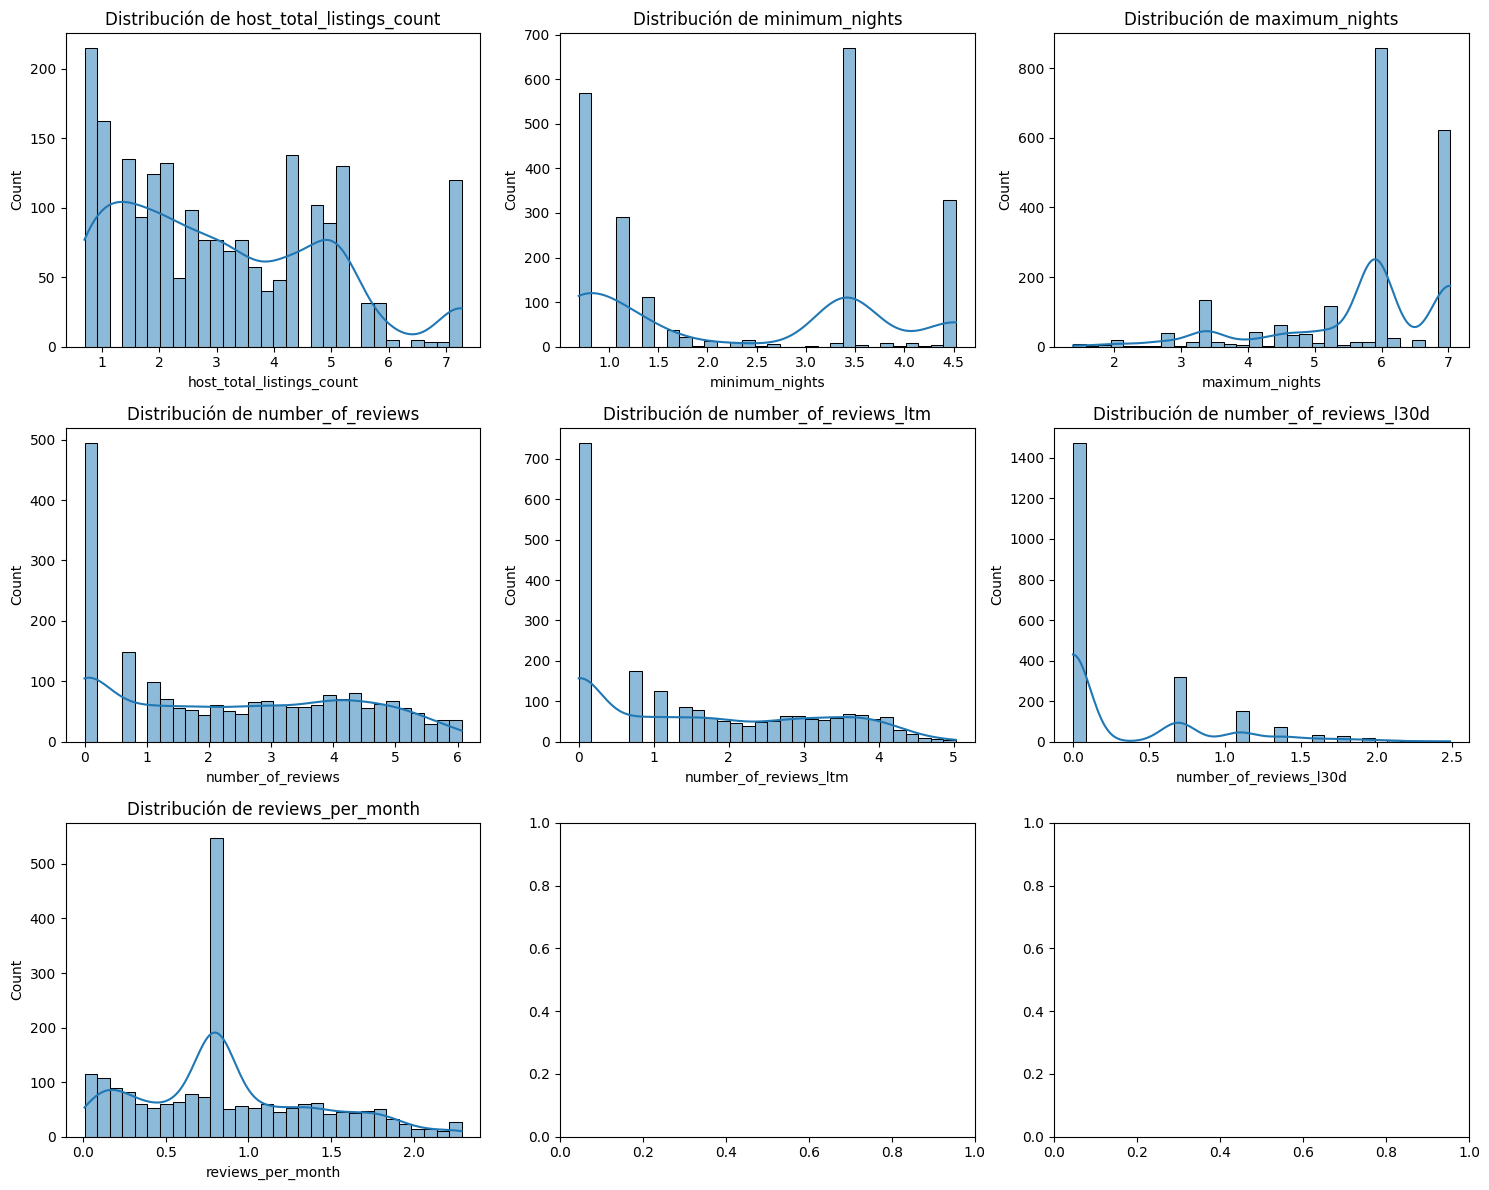

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables transformadas en el punto 1
columns_transformed = [
    'host_total_listings_count', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'reviews_per_month'
]

# Crear subgráficos para mostrar las distribuciones
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3 filas x 3 columnas
axes = axes.flatten()  # Convertir en una lista para iterar fácilmente

# Generar gráficos para cada variable
for i, col in enumerate(columns_transformed):
    sns.histplot(fd_train_imputed_num_out[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


# **Embeddings**

La decisión de incluir algunas variables binarias en embeddings tiene como objetivo maximizar la capacidad del modelo para capturar relaciones latentes y representaciones más ricas.

Ejemplo: host_response_time, donde los valores representan categorías ordinales (1=Rápido, 4=Lento). Representarlas como 0, 1, 2, 3 limita la comprensión del modelo.

Ejemplo:prender la relación entre vecindarios o tipos de propiedades, algo que un valor codificado ordinalmente no logra.

In [ ]:
import joblib

# Variables categóricas para embeddings
categorical_columns = ['host_response_time', 'neighbourhood_cleansed',
                       'property_type_encoded', 'room_type_encoded']

# Crear diccionarios de mapeo para cada categoría
category_mappings = {}

for col in categorical_columns:
    unique_values = sorted(fd_train_imputed_num_out[col].unique())  # Ordenar valores únicos
    mapping = {val: idx for idx, val in enumerate(unique_values)}  # Asignar un índice
    fd_train_imputed_num_out[col] = fd_train_imputed_num_out[col].map(mapping)  # Aplicar el mapeo
    category_mappings[col] = mapping  # Guardar el mapeo

# Guardar los mapeos para aplicarlos en Val y Test
joblib.dump(category_mappings, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/category_mappings.pkl")

print("Transformación de variables categóricas a índices completada y guardada.")


Transformación de variables categóricas a índices completada y guardada.


## **StandardScaler para variables con alta varianza**

## **StandardScaler para Geo**

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler_geo = StandardScaler()
fd_train_imputed_num_out[['latitude', 'longitude']] = scaler_geo.fit_transform(fd_train_imputed_num_out[['latitude', 'longitude']])

# Guardar el scaler para aplicarlo en test y val
joblib.dump(scaler_geo, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/standard_scaler_geo.pkl")


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/standard_scaler_geo.pkl']

## **MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

columns_to_minmax = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Aplicar MinMaxScaler en train
fd_train_imputed_num_out[columns_to_minmax] = scaler_minmax.fit_transform(fd_train_imputed_num_out[columns_to_minmax])

# Guardar scaler para val y test
joblib.dump(scaler_minmax, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/minmax_scaler.pkl")

print("MinMaxScaler aplicado en Train y guardado.")


MinMaxScaler aplicado en Train y guardado.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Definir las columnas que faltan escalar
columns_to_scale = ['availability_365', 'years_being_host']

# Inicializar el scaler
scaler = MinMaxScaler()

# Aplicar el escalado en train y guardar el scaler
fd_train_imputed_num_out[columns_to_scale] = scaler.fit_transform(fd_train_imputed_num_out[columns_to_scale])

# Guardar el scaler para usarlo en val y test
joblib.dump(scaler, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/minmax_scaler_availability_host.pkl")

print("✔️ MinMaxScaler aplicado y guardado correctamente.")


✔️ MinMaxScaler aplicado y guardado correctamente.


In [ ]:
import pandas as pd

# Columnas sin truncar
pd.set_option('display.max_columns', None)

print("\nMínimo y máximo en cada columna de fd_train_imputed_num_out:")
min_max_test = fd_train_imputed_num_out.agg(['min', 'max'])
print(min_max_test)

# Opcional: Restaurar configuración para evitar demasiadas columnas en futuras salidas
pd.reset_option('display.max_columns')


Mínimo y máximo en cada columna de fd_train_imputed_num_out:
     host_response_time  host_response_rate  host_acceptance_rate  \
min                   0                 0.0                   0.0   
max                   3                 1.0                   1.0   

     host_is_superhost  host_total_listings_count  host_has_profile_pic  \
min                  0                   0.693147                     0   
max                  1                   7.270313                     1   

     host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
min                       0                       0 -3.575181  -2.775613   
max                       1                      24  1.973435   2.663617   

     accommodates  bathrooms  bedrooms  beds     price  minimum_nights  \
min          0.01       0.01      0.01  0.01  3.044522        0.693147   
max          0.99       0.99      0.99  0.99  7.846981        4.521789   

     maximum_nights  availability_365  number_of_rev

In [ ]:
print(fd_train_imputed_num_out.head().to_string())

   host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost  host_total_listings_count  host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  latitude  longitude  accommodates  bathrooms  bedrooms      beds     price  minimum_nights  maximum_nights  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  reviews_per_month  bathrooms_shared  years_being_host  num_host_verifications  property_type_encoded  room_type_encoded
0                   3                1.00                  1.00                  0                   1.945910                     1                       1                      19 -0.548598   0.223042      0.206000   0.173333      0.15  0.056667  4.804021        1.098612        7.026427          0.326027           4.9

In [ ]:
fd_train_imputed_num_out.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         2110.000000         2110.000000           2110.000000   
mean             2.750711            0.961455              0.896447   
std              0.578119            0.114991              0.191800   
min              0.000000            0.000000              0.000000   
25%              3.000000            0.980000              0.870024   
50%              3.000000            1.000000              0.980000   
75%              3.000000            1.000000              1.000000   
max              3.000000            1.000000              1.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count        2110.000000                2110.000000           2110.000000   
mean            0.334123                   3.112970              0.990047   
std             0.471795                   1.829592              0.099289   
min             0.000000                   0.693147              0.000000   
25%             0.000000                   1.609438              1.000000   
50%             0.000000                   2.833213              1.000000   
75%             1.000000                   4.343805              1.000000   
max             1.000000                   7.270313              1.000000   

       host_identity_verified  neighbourhood_cleansed      latitude  \
count             2110.000000             2110.000000  2.110000e+03   
mean                 0.899052               10.577725 -1.731502e-13   
std                  0.301331                7.097197  1.000237e+00   
min                  0.000000                0.000000 -3.575181e+00   
25%                  1.000000                5.000000 -5.905922e-01   
50%                  1.000000                8.500000  2.771425e-01   
75%                  1.000000               18.000000  6.826024e-01   
max                  1.000000               24.000000  1.973435e+00   

          longitude  ...  review_scores_communication  review_scores_location  \
count  2.110000e+03  ...                  2110.000000             2110.000000   
mean   1.363400e-13  ...                     0.964867                0.940461   
std    1.000237e+00  ...                     0.080053                0.083752   
min   -2.775613e+00  ...                     0.000000                0.000000   
25%   -4.719869e-01  ...                     0.967500                0.927500   
50%    2.055818e-01  ...                     0.985000                0.962500   
75%    6.497038e-01  ...                     1.000000                0.987500   
max    2.663617e+00  ...                     1.000000                1.000000   

       review_scores_value  instant_bookable  reviews_per_month  \
count          2110.000000       2110.000000        2110.000000   
mean              0.904827          0.292891           0.871445   
std               0.102668          0.455197           0.538217   
min               0.000000          0.000000           0.009950   
25%               0.892500          0.000000           0.494696   
50%               0.925000          0.000000           0.804241   
75%               0.951875          1.000000           1.208213   
max               1.000000          1.000000           2.287766   

       bathrooms_shared  years_being_host  num_host_verifications  \
count       2110.000000       2110.000000             2110.000000   
mean           0.238389          0.444990                0.664727   
std            0.426199          0.232742                0.153712   
min            0.000000          0.000000                0.010000   
25%            0.000000          0.285714                0.663333   
50%            0.000000          0.428571                0.663333   
75%            0.000000          0.642857                0.663333   
max            1.000000          1.000000                0.990000   

       property_type_encoded  room_type_encoded  
count            2110.00000

*'neighbourhood_cleansed'* ya paso por labelencoder y esta codficada.

No necesita en este momento normalizacion, puede trabajarse mas segun el modelo que haga si es con redes neuronales o arboles, etc.

In [ ]:
fd_train_imputed_num_out['neighbourhood_cleansed'].unique()

array([19, 17,  7,  1, 20, 22,  8, 18, 24, 12, 10,  4,  0,  9,  5,  3,  2,
       23,  6, 16, 11, 21, 15, 13, 14])

In [ ]:
import pandas as pd

# Revisar las frecuencias de cada valor en la columna 'neighbourhood_cleansed'
print("Frecuencia de valores en 'neighbourhood_cleansed':")
print(fd_train_imputed_num_out['neighbourhood_cleansed'].value_counts())

# Confirmar el número total de valores únicos
print(f"\nNúmero total de vecindarios únicos: {fd_train_imputed_num_out['neighbourhood_cleansed'].nunique()}")


Frecuencia de valores en 'neighbourhood_cleansed':
neighbourhood_cleansed
7     307
19    181
8     170
1     163
22    144
4     136
12    108
10    104
20    102
9     101
3     100
0      85
17     70
5      46
16     43
18     42
24     38
15     38
2      34
11     34
21     27
23     17
6      14
13      3
14      3
Name: count, dtype: int64

Número total de vecindarios únicos: 25


### **Guardar el fd_train_imputed_num_out PARA CORRELACIONAR**

In [ ]:
# Guardar el fd_train_imputed_num_out PARA CORRELACIONAR
fd_train_imputed_num_out.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_acorrelacion.csv", sep=';', index=False)

In [ ]:
# Cargar el fd_train_acorrelacion
import pandas as pd
fd_train_acorrelacion= pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_acorrelacion.csv", sep=';')

In [ ]:
print(fd_train_acorrelacion.head())
print(fd_train_acorrelacion.shape)


   host_response_time  host_response_rate  host_acceptance_rate  \
0                   3                1.00                  1.00   
1                   3                1.00                  0.99   
2                   3                1.00                  0.95   
3                   3                1.00                  1.00   
4                   3                0.99                  1.00   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                  0                   1.945910                     1   
1                  0                   2.639057                     1   
2                  0                   3.433987                     1   
3                  0                   4.343805                     1   
4                  0                   5.030438                     1   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  ...  \
0                       1                      19 -0.548598   0.223042  ...   


In [ ]:
print(fd_train_acorrelacion.isnull().sum().sum())


0


In [ ]:
categorical_columns = fd_train_acorrelacion.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas en el dataset:", categorical_columns.tolist())


Variables categóricas en el dataset: []


In [ ]:
num_numeric_columns = fd_train_acorrelacion.select_dtypes(include=['int64', 'float64']).shape[1]
print(f"Total de columnas numéricas: {num_numeric_columns}")


Total de columnas numéricas: 35


# **CORRELACIÓN**

price                          1.000000
property_type_encoded          0.654911
accommodates                   0.637125
bedrooms                       0.589924
room_type_encoded              0.573065
beds                           0.536313
bathrooms                      0.423074
latitude                       0.191767
review_scores_location         0.158236
longitude                      0.147963
review_scores_cleanliness      0.117144
review_scores_rating           0.099825
host_response_rate             0.095915
instant_bookable               0.080224
host_response_time             0.073608
reviews_per_month              0.065027
review_scores_accuracy         0.057193
host_acceptance_rate           0.055040
number_of_reviews_ltm          0.052876
review_scores_value            0.050995
review_scores_checkin          0.048620
review_scores_communication    0.039576
maximum_nights                 0.038997
host_is_superhost              0.038068
neighbourhood_cleansed         0.028501


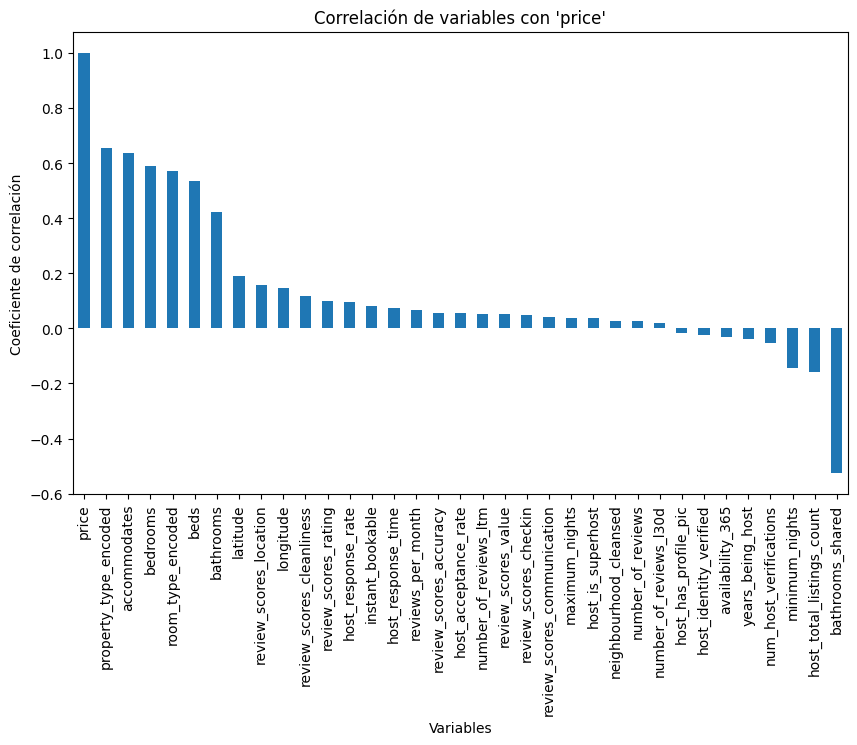

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la correlación con 'price'
correlation_matrix = fd_train_acorrelacion.corr()
price_correlation = correlation_matrix["price"].sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(price_correlation)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
price_correlation.plot(kind="bar", title="Correlación de variables con 'price'")
plt.xlabel("Variables")
plt.ylabel("Coeficiente de correlación")
plt.xticks(rotation=90)
plt.show()


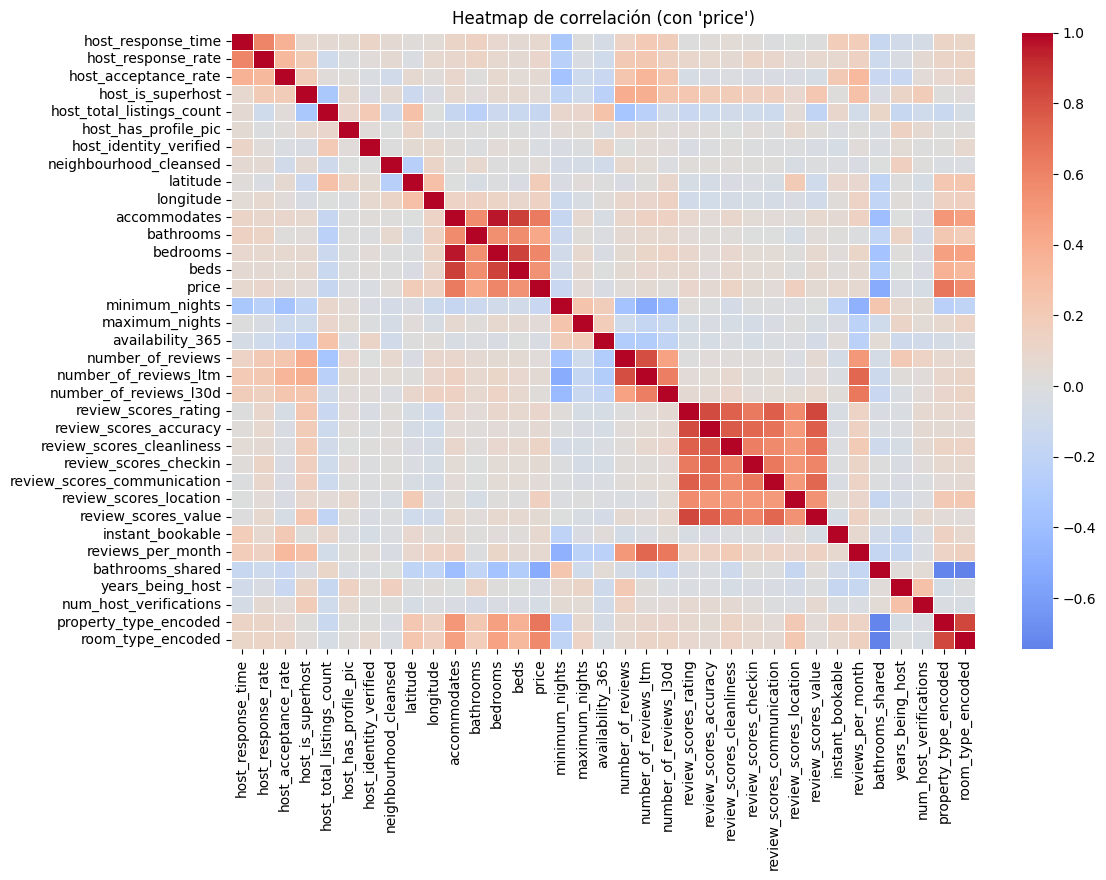

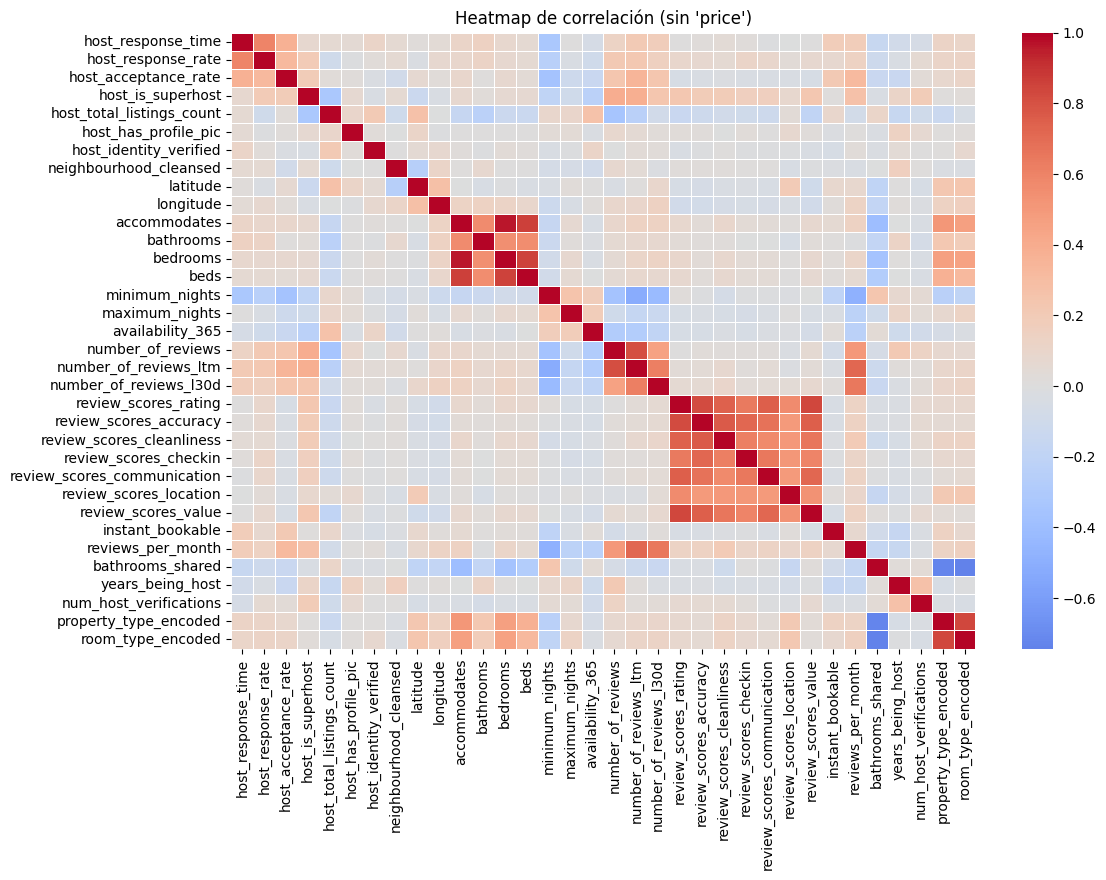

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generar el heatmap de correlación con price incluido
plt.figure(figsize=(12, 8))
sns.heatmap(fd_train_acorrelacion.corr(), annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap de correlación (con 'price')")
plt.show()

# Generar el heatmap de correlación sin price
plt.figure(figsize=(12, 8))
sns.heatmap(fd_train_acorrelacion.drop(columns=['price']).corr(), annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap de correlación (sin 'price')")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Definir el umbral de correlación extrema
threshold = 0.8

# Calcular la matriz de correlación
correlation_matrix = fd_train_acorrelacion.corr()

# Filtrar las correlaciones que sean mayores a 0.8 o menores a -0.8 (excluyendo la diagonal)
high_correlation_pairs = (
    correlation_matrix
    .where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Excluir la diagonal
    .stack()
    .reset_index()
)

# Renombrar columnas para mayor claridad
high_correlation_pairs.columns = ["Variable 1", "Variable 2", "Correlación"]

# Filtrar correlaciones extremas
high_correlation_pairs = high_correlation_pairs[
    (high_correlation_pairs["Correlación"] > threshold) | (high_correlation_pairs["Correlación"] < -threshold)
]

# Mostrar el resultado
print("Variables con correlación extrema (> 0.8 o < -0.8):")
print(high_correlation_pairs)


Variables con correlación extrema (> 0.8 o < -0.8):
                Variable 1              Variable 2  Correlación
296           accommodates                bedrooms     0.965088
297           accommodates                    beds     0.861633
342               bedrooms                    beds     0.854507
459      number_of_reviews   number_of_reviews_ltm     0.811120
504   review_scores_rating  review_scores_accuracy     0.817775
509   review_scores_rating     review_scores_value     0.840946
594  property_type_encoded       room_type_encoded     0.838169


In [ ]:
import pandas as pd

# Lista de variables con correlaciones extremas
extreme_corr_vars = [
    "accommodates", "bedrooms", "beds",
    "number_of_reviews", "number_of_reviews_ltm",
    "review_scores_rating", "review_scores_accuracy", "review_scores_value",
    "property_type_encoded", "room_type_encoded"
]

# Calcular correlación con 'price'
correlation_with_price = fd_train_acorrelacion[extreme_corr_vars + ["price"]].corr()["price"].drop("price")

# Mostrar los resultados
print("Correlación de variables con 'price':")
print(correlation_with_price.sort_values(ascending=False))


Correlación de variables con 'price':
property_type_encoded     0.654911
accommodates              0.637125
bedrooms                  0.589924
room_type_encoded         0.573065
beds                      0.536313
review_scores_rating      0.099825
review_scores_accuracy    0.057193
number_of_reviews_ltm     0.052876
review_scores_value       0.050995
number_of_reviews         0.026737
Name: price, dtype: float64


### **review_scores_rating vs. review_scores_accuracy vs. review_scores_value**

review_scores_rating ya representa una evaluación general.

Eliminaré review_scores_accuracy y review_scores_value por ser redundantes.

In [ ]:
# Definir las columnas de reviews con correlación extrema
review_columns_extreme = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_value']

# Calcular la media en train
fd_train_acorrelacion['review_overall_score'] = fd_train_acorrelacion[review_columns_extreme].mean(axis=1)

# Guardar la media general de `review_overall_score` en train
review_overall_mean_train = fd_train_acorrelacion['review_overall_score'].mean()

# Eliminar las columnas individuales en train
fd_train_acorrelacion.drop(columns=review_columns_extreme, inplace=True)

# Verificar
print(fd_train_acorrelacion[['review_overall_score']].describe())

# Guardar la media de `review_overall_score` para usarla en test y val
import joblib
joblib.dump(review_overall_mean_train, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/review_overall_mean.pkl")


       review_overall_score
count           2110.000000
mean               0.932876
std                0.083229
min                0.066667
25%                0.925667
50%                0.952500
75%                0.968667
max                1.000000


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/pkl/review_overall_mean.pkl']

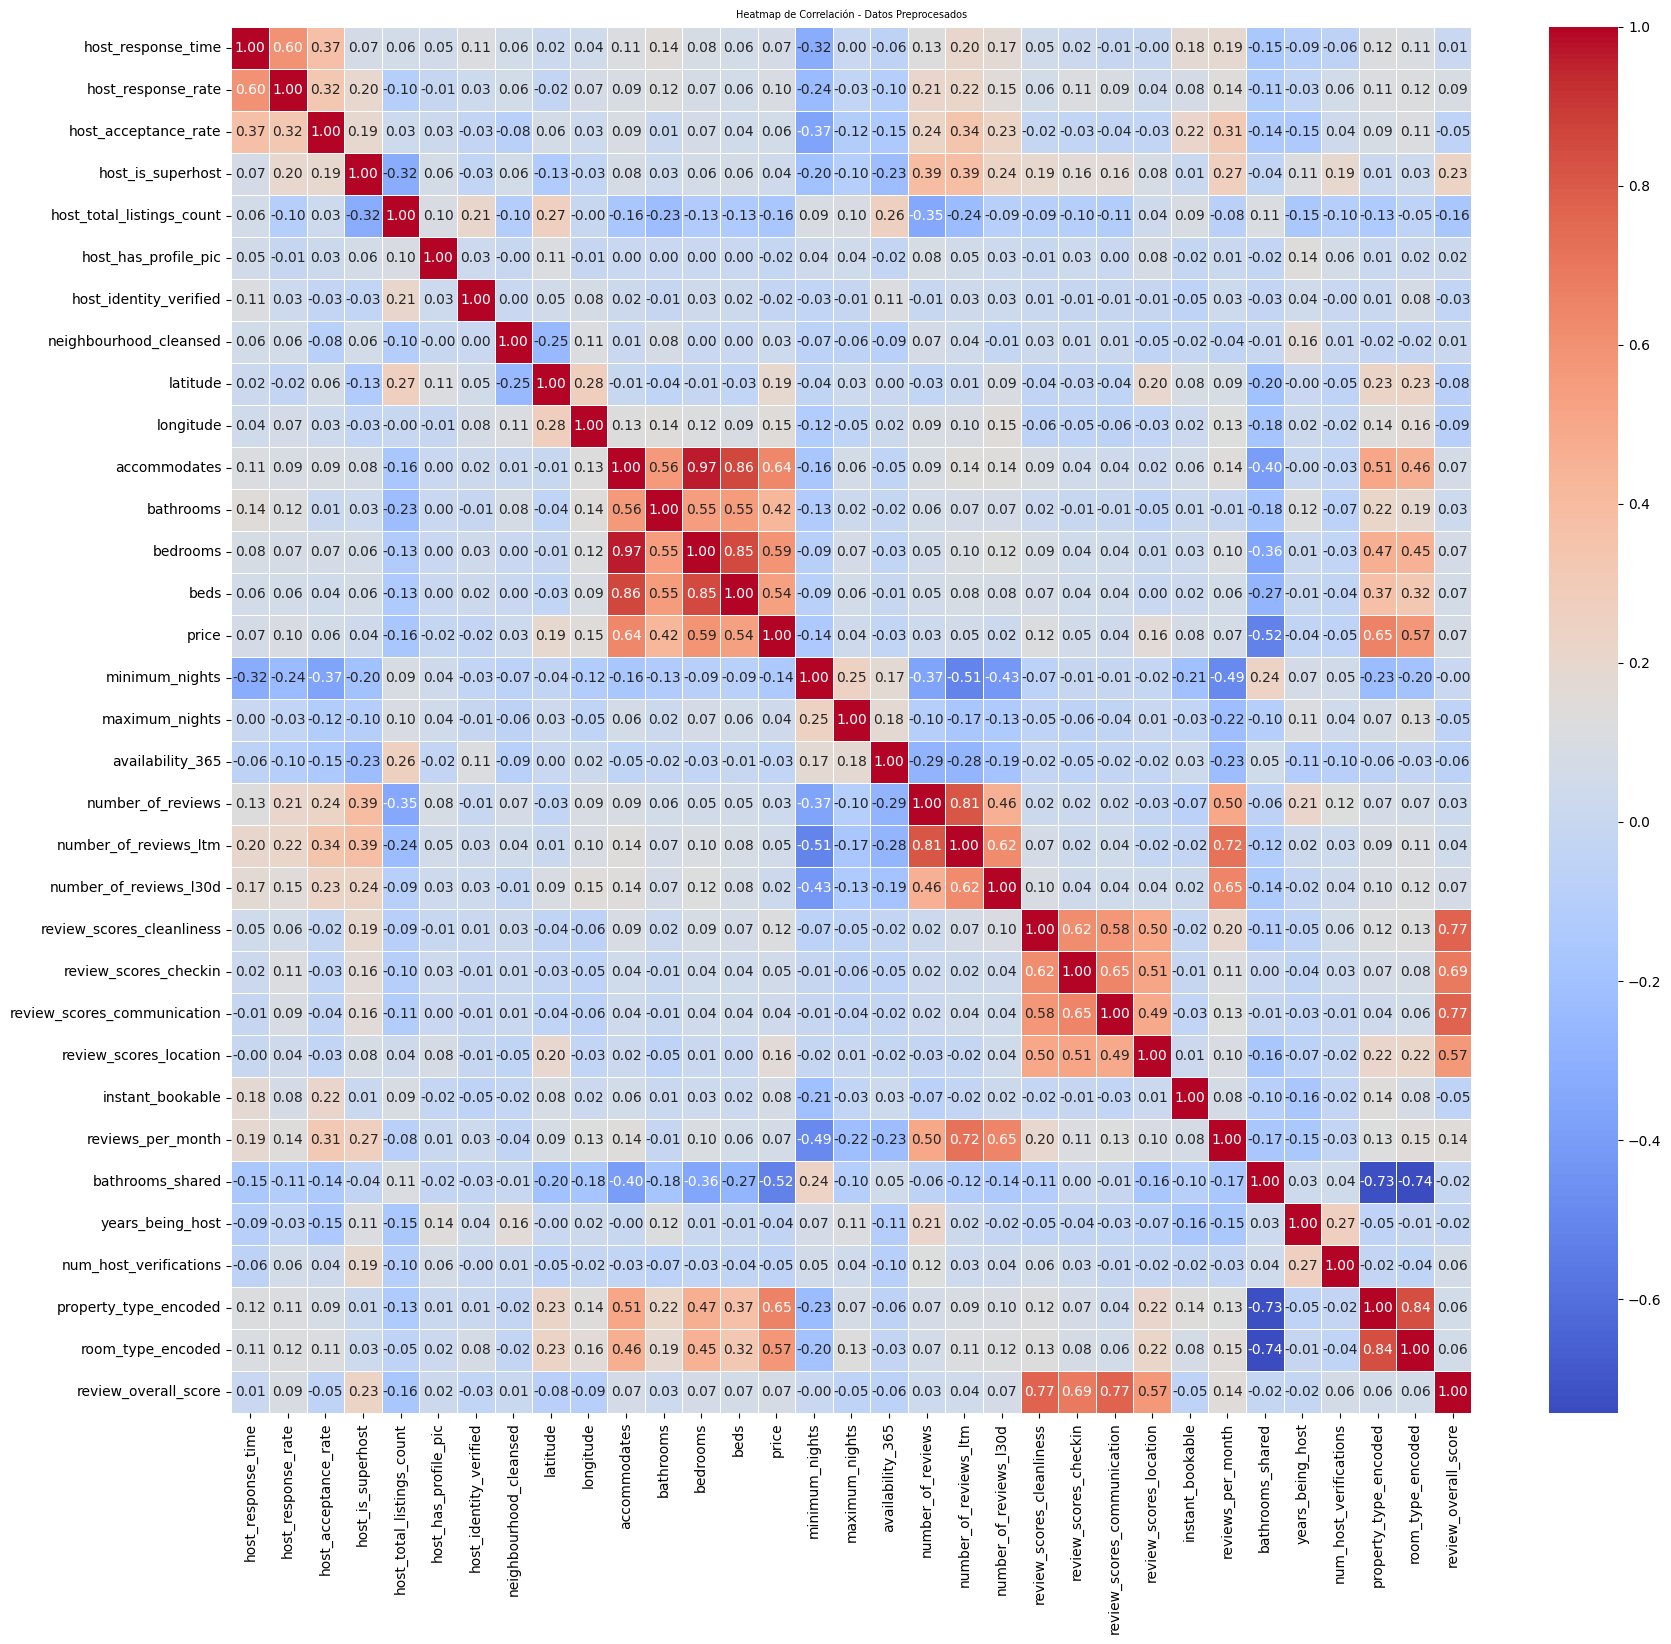

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación con las variables actualizadas
correlation_matrix = fd_train_acorrelacion.corr()

# Crear el heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Configuración del título
plt.title("Heatmap de Correlación - Datos Preprocesados", fontsize=7)
plt.show()


In [ ]:
fd_train_acorrelacion.shape

(2110, 33)

In [ ]:
# Seleccionar las columnas relacionadas con las reseñas
review_columns = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

# Calcular la correlación entre las variables seleccionadas
correlation_reviews = fd_train_acorrelacion[review_columns].corr()

# Mostrar la matriz de correlación
print(correlation_reviews)


                        number_of_reviews  number_of_reviews_ltm  \
number_of_reviews                1.000000               0.811120   
number_of_reviews_ltm            0.811120               1.000000   
number_of_reviews_l30d           0.457654               0.624233   
reviews_per_month                0.500164               0.716121   

                        number_of_reviews_l30d  reviews_per_month  
number_of_reviews                     0.457654           0.500164  
number_of_reviews_ltm                 0.624233           0.716121  
number_of_reviews_l30d                1.000000           0.648925  
reviews_per_month                     0.648925           1.000000  


*number_reviews estan muy correlacionadas entre ellas, me quedare con la que aporté mas a "price"

In [ ]:
# Seleccionar las columnas relevantes para la correlación
review_columns = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

# Calcular la correlación entre las columnas de reseñas y price
correlation_with_price = fd_train_acorrelacion[review_columns + ['price']].corr()

# Mostrar la correlación con 'price'
print(correlation_with_price['price'])


number_of_reviews         0.026737
number_of_reviews_ltm     0.052876
number_of_reviews_l30d    0.020395
reviews_per_month         0.065027
price                     1.000000
Name: price, dtype: float64


In [ ]:
# Eliminar las columnas mas correlacionadas entre si de las reseñas
fd_train_acorrelacion.drop(columns=['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d'], inplace=True)

## ⚓ **Creación de nuevas variables**

In [ ]:
# Calcular el precio por persona en train
fd_train_acorrelacion['price_per_person'] = fd_train_acorrelacion['price'] / fd_train_acorrelacion['accommodates']

# Verificar que la nueva variable fue creada correctamente en train
print(fd_train_acorrelacion[['price', 'accommodates', 'price_per_person']].head())


      price  accommodates  price_per_person
0  4.804021      0.206000         23.320491
1  4.787492      0.075333         63.550775
2  3.713572      0.010000        371.357207
3  3.988984      0.075333         52.951116
4  6.318968      0.336667         18.769212


In [ ]:
# Calcular el precio por barrio en train
price_per_neighborhood = fd_train_acorrelacion.groupby('neighbourhood_cleansed')['price'].transform('mean')
fd_train_acorrelacion['price_per_neighborhood'] = price_per_neighborhood

# Verificar que la nueva variable fue creada correctamente en train
print(fd_train_acorrelacion[['price', 'neighbourhood_cleansed', 'price_per_neighborhood']].head())


      price  neighbourhood_cleansed  price_per_neighborhood
0  4.804021                      19                4.561124
1  4.787492                      17                5.225791
2  3.713572                       7                4.600558
3  3.988984                       1                5.161737
4  6.318968                       1                5.161737


In [ ]:
# Calcular el precio promedio por tipo de propiedad en train
avg_price_by_property_type = fd_train_acorrelacion.groupby('property_type_encoded')['price'].transform('mean')
fd_train_acorrelacion['avg_price_by_property_type'] = avg_price_by_property_type

# Verificar que la nueva variable fue creada correctamente en train
print(fd_train_acorrelacion[['price', 'property_type_encoded', 'avg_price_by_property_type']].head())


      price  property_type_encoded  avg_price_by_property_type
0  4.804021                     25                    5.282732
1  4.787492                     22                    5.091952
2  3.713572                      9                    4.174825
3  3.988984                     22                    5.091952
4  6.318968                     22                    5.091952


In [ ]:
# Aplicar log a las nuevas variables para que tengan la misma escala
fd_train_finpreprocesado['price_per_person_log'] = np.log(fd_train_finpreprocesado['price_per_person'])
fd_train_finpreprocesado['price_per_neighborhood_log'] = np.log(fd_train_finpreprocesado['price_per_neighborhood'])
fd_train_finpreprocesado['avg_price_by_property_type_log'] = np.log(fd_train_finpreprocesado['avg_price_by_property_type'])

# Verificar el resultado
print(fd_train_finpreprocesado[['price_per_person', 'price_per_person_log', 'price_per_neighborhood', 'price_per_neighborhood_log', 'avg_price_by_property_type', 'avg_price_by_property_type_log']].head())


   price_per_person  price_per_person_log  price_per_neighborhood  \
0         23.320491              3.149332                4.561124   
1         63.550775              4.151839                5.225791   
2        371.357207              5.917164                4.600558   
3         52.951116              3.969369                5.161737   
4         18.769212              2.932218                5.161737   

   price_per_neighborhood_log  avg_price_by_property_type  \
0                    1.517569                    5.282732   
1                    1.653606                    5.091952   
2                    1.526178                    4.174825   
3                    1.641273                    5.091952   
4                    1.641273                    5.091952   

   avg_price_by_property_type_log  
0                        1.664443  
1                        1.627661  
2                        1.429072  
3                        1.627661  
4                        1.627661  


In [ ]:
# Eliminar las columnas mas correlacionadas entre si de las reseñas
fd_train_finpreprocesado.drop(columns=['price_per_person', 'price_per_neighborhood','avg_price_by_property_type'], inplace=True)

In [ ]:
# Guardar fd_train_acorrelacion con final de preprocesado en un archivo CSV fd_train_finpreprocesado.
fd_train_acorrelacion.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';', index=False)


In [ ]:
# Cargar el fd_train_finpreprocesado.csv
import pandas as pd
fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')

In [ ]:
print(fd_train_finpreprocesado.head())
print(fd_train_finpreprocesado.shape)

   host_response_time  host_response_rate  host_acceptance_rate  \
0                   3                1.00                  1.00   
1                   3                1.00                  0.99   
2                   3                1.00                  0.95   
3                   3                1.00                  1.00   
4                   3                0.99                  1.00   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                  0                   1.945910                     1   
1                  0                   2.639057                     1   
2                  0                   3.433987                     1   
3                  0                   4.343805                     1   
4                  0                   5.030438                     1   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  ...  \
0                       1                      19 -0.548598   0.223042  ...   


In [ ]:
# Mostrar columnas formato vertical
for col in fd_train_finpreprocesado.columns:
    print(col)


host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_total_listings_count
host_has_profile_pic
host_identity_verified
neighbourhood_cleansed
latitude
longitude
accommodates
bathrooms
bedrooms
beds
price
minimum_nights
maximum_nights
availability_365
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
instant_bookable
reviews_per_month
bathrooms_shared
years_being_host
num_host_verifications
property_type_encoded
room_type_encoded
review_overall_score
price_per_person_log
price_per_neighborhood_log
avg_price_by_property_type_log


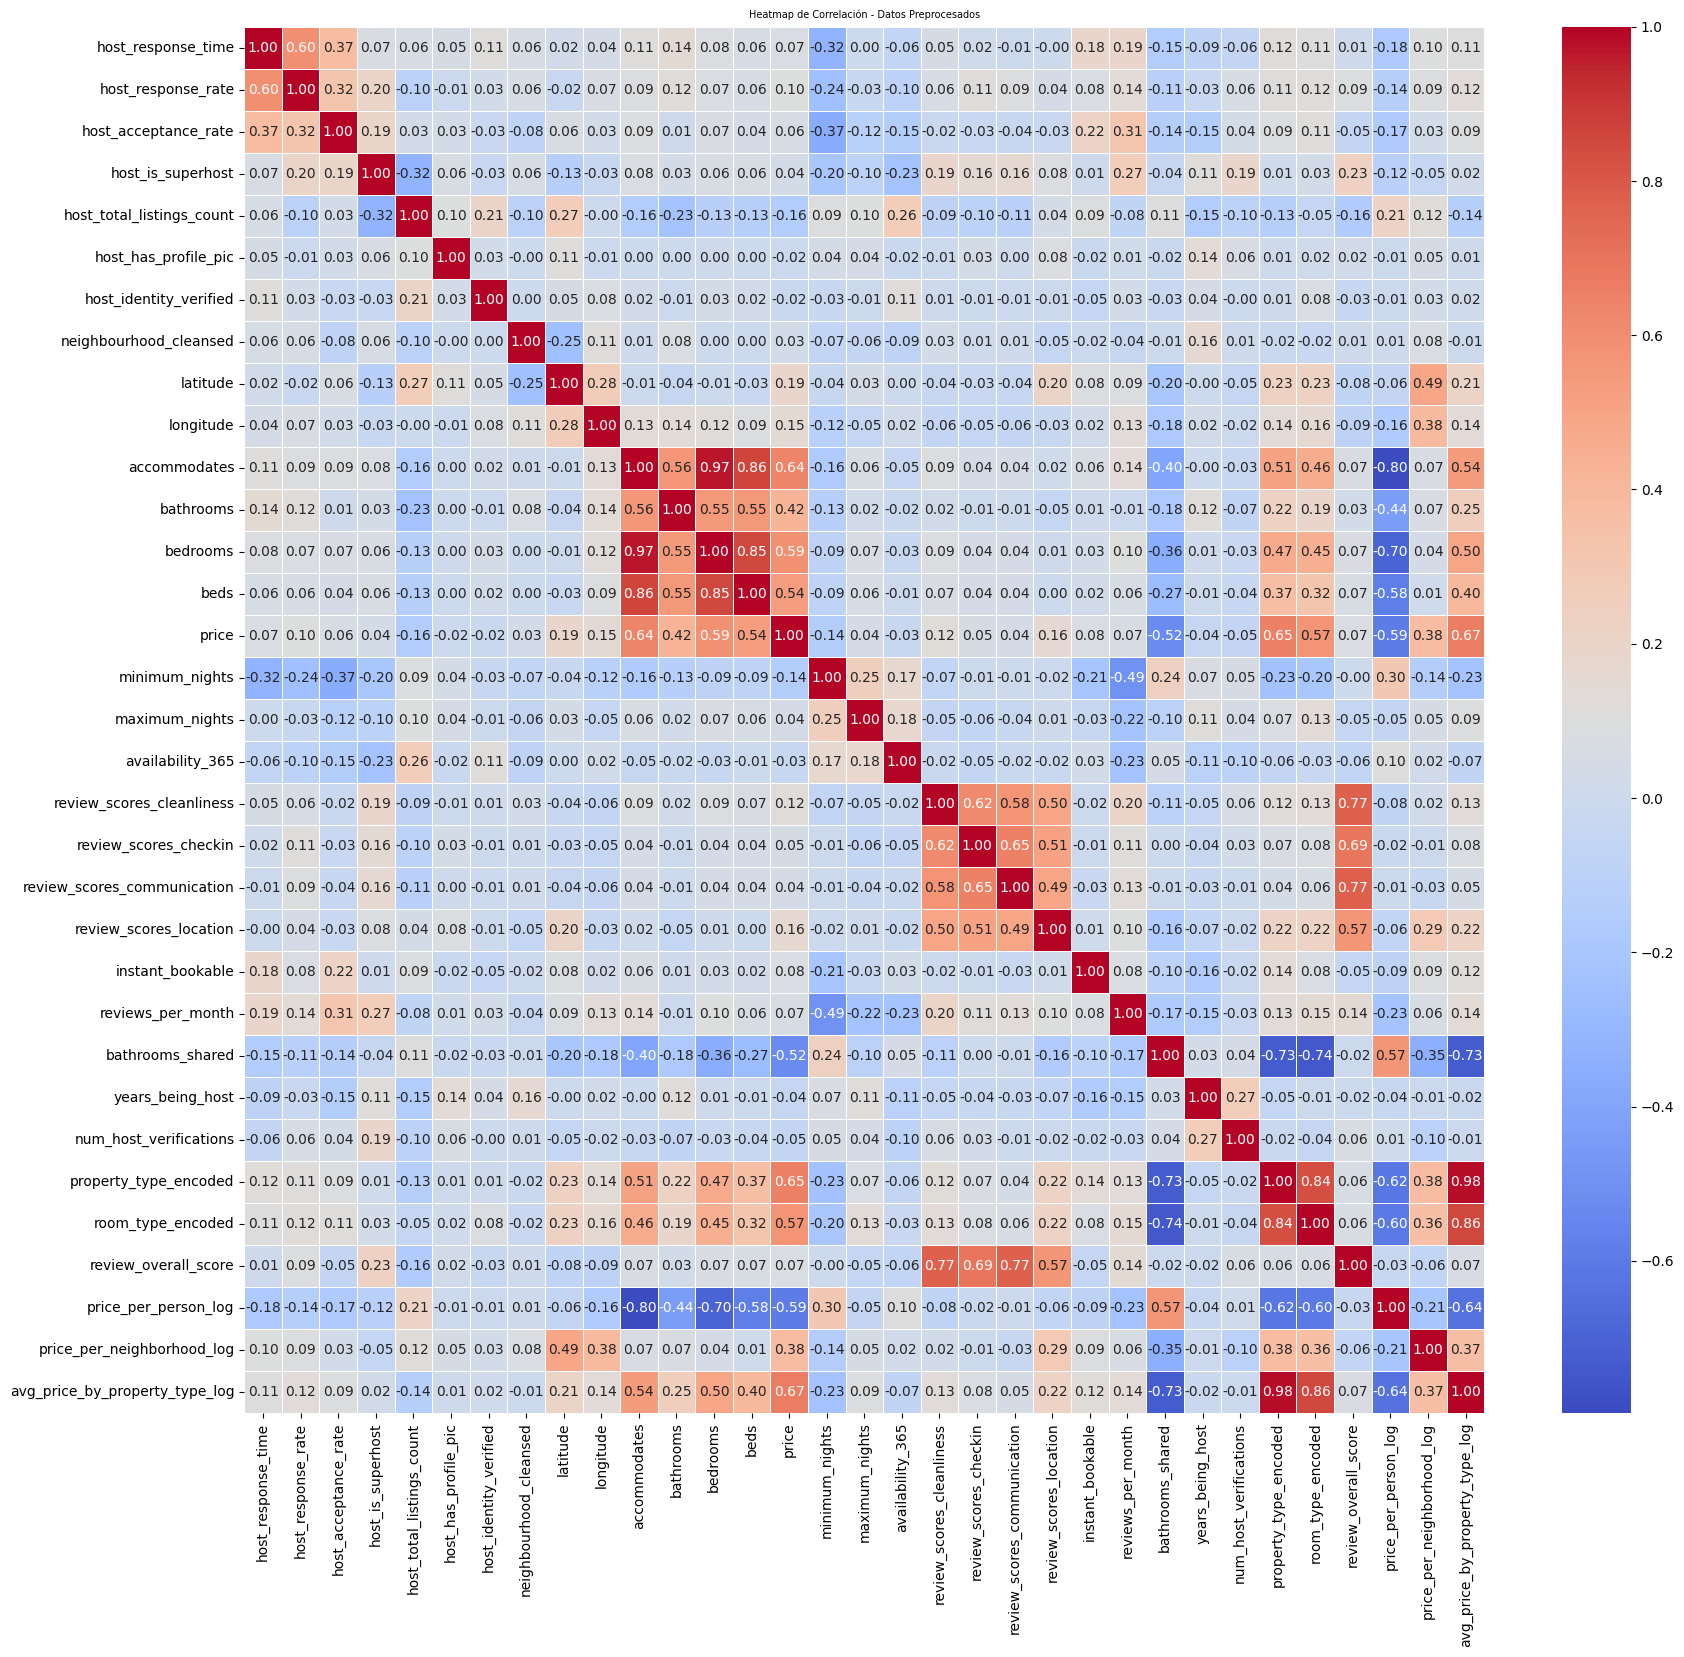

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación con las variables actualizadas
correlation_matrix = fd_train_finpreprocesado.corr()

# Crear el heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Configuración del título
plt.title("Heatmap de Correlación - Datos Preprocesados", fontsize=7)
plt.show()

In [ ]:
fd_train_finpreprocesado.shape

(2110, 33)

# 🎐 **FIN PREPROCESADO**

## 🟨 **SINCRONIZACIÓN REGISTROS DATA TABULAR Y DATA IMAGENES**

Debo sincronizar los registros de mi data tabular preprocesada con mi data de images.npy pues hemos borrado 3 registros en el preprocesamiento de Train y 1 en Val por lo que ya no coinciden los registro originales.

In [ ]:
import pandas as pd
import numpy as np

# Cargar datasets tabulares preprocesados con los nombres correctos
fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')
fd_val_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv", sep=';')
fd_test_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test_finpreprocesado.csv", sep=';')

# Cargar conjuntos de imágenes
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train.npy")
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy")

# Verificar la cantidad de registros en cada dataset
print(f"Registros tabulares en Train: {fd_train_finpreprocesado.shape[0]}, Imágenes en Train: {imgs_train.shape[0]}")
print(f"Registros tabulares en Val: {fd_val_finpreprocesado.shape[0]}, Imágenes en Val: {imgs_val.shape[0]}")
print(f"Registros tabulares en Test: {fd_test_finpreprocesado.shape[0]}, Imágenes en Test: {imgs_test.shape[0]}")


Registros tabulares en Train: 2110, Imágenes en Train: 2113
Registros tabulares en Val: 373, Imágenes en Val: 374
Registros tabulares en Test: 622, Imágenes en Test: 622


🔴 Hay **3 imágenes sobrantes en train y 1 en val** que ya no tienen registros tabulares al ser eliminados en preprocesamiento.

✅ El conjunto de test está alineado, por lo que no necesita cambios.

# **SYNC**

In [ ]:
import numpy as np

# Cargar los datasets tabulares originales
fd_train = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv", sep=';')
fd_val = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val.csv", sep=';')
fd_test = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test.csv", sep=';')

# Cargar las imágenes originales
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train.npy")
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy")

# Generar los índices basados en la cantidad de filas de cada dataset tabular
idx_train = np.arange(len(fd_train))
idx_val = np.arange(len(fd_val))
idx_test = np.arange(len(fd_test))

# Guardar los índices
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/idx_train.npy", idx_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/idx_val.npy", idx_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/idx_test.npy", idx_test)

print("✅ Índices generados y guardados correctamente sin modificar los conjuntos de datos.")


✅ Índices generados y guardados correctamente sin modificar los conjuntos de datos.


In [ ]:
import numpy as np

# Cargar los índices originales
idx_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/idx_train.npy")
idx_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/idx_val.npy")

# Filtrar los índices de train y val para que coincidan con los datasets actualizados
idx_train_synced = idx_train[fd_train_finpreprocesado.index]
idx_val_synced = idx_val[fd_val_finpreprocesado.index]

# Cargar imágenes originales
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train.npy")
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val.npy")

# Sincronizar imágenes eliminando las sobrantes
imgs_train_synced = imgs_train[idx_train_synced]
imgs_val_synced = imgs_val[idx_val_synced]

# Guardar las versiones sincronizadas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_sync.npy", imgs_train_synced)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_sync.npy", imgs_val_synced)

# Verificar que ahora coinciden
print(f"Imágenes en Train después de sincronizar: {imgs_train_synced.shape[0]} (debe ser {fd_train_finpreprocesado.shape[0]})")
print(f"Imágenes en Val después de sincronizar: {imgs_val_synced.shape[0]} (debe ser {fd_val_finpreprocesado.shape[0]})")


Imágenes en Train después de sincronizar: 2110 (debe ser 2110)
Imágenes en Val después de sincronizar: 373 (debe ser 373)


In [ ]:
import numpy as np

# Verificar formas de los datasets tabulares
print(f"Forma de fd_train_finpreprocesado: {fd_train_finpreprocesado.shape}")
print(f"Forma de fd_val_finpreprocesado: {fd_val_finpreprocesado.shape}")
print(f"Forma de fd_test_finpreprocesado: {fd_test_finpreprocesado.shape}")

# Verificar formas de los datasets de imágenes
print(f"Forma de imgs_train_sync: {imgs_train_synced.shape}")
print(f"Forma de imgs_val_sync: {imgs_val_synced.shape}")
print(f"Forma de imgs_test: {imgs_test.shape}")

# Revisar si hay valores nulos en los datos tabulares
print("\nValores nulos en fd_train_finpreprocesado:")
print(fd_train_finpreprocesado.isnull().sum().sum())

print("\nValores nulos en fd_val_finpreprocesado:")
print(fd_val_finpreprocesado.isnull().sum().sum())

print("\nValores nulos en fd_test_finpreprocesado:")
print(fd_test_finpreprocesado.isnull().sum().sum())


Forma de fd_train_finpreprocesado: (2110, 33)
Forma de fd_val_finpreprocesado: (373, 33)
Forma de fd_test_finpreprocesado: (622, 33)
Forma de imgs_train_sync: (2110, 224, 224, 3)
Forma de imgs_val_sync: (373, 224, 224, 3)
Forma de imgs_test: (622, 224, 224, 3)

Valores nulos en fd_train_finpreprocesado:
0

Valores nulos en fd_val_finpreprocesado:
0

Valores nulos en fd_test_finpreprocesado:
0


# 🏁 **DIVISIÓN DATOS EN X FEATURES - Y LABEL price**

In [ ]:
# Dividir datos tabulares en X (features) e y (target)
X_train_tab = fd_train_finpreprocesado.drop(columns=['price'])
y_train = fd_train_finpreprocesado['price']

X_val_tab = fd_val_finpreprocesado.drop(columns=['price'])
y_val = fd_val_finpreprocesado['price']

X_test_tab = fd_test_finpreprocesado.drop(columns=['price'])
y_test = fd_test_finpreprocesado['price']

# Cargar imágenes ya sincronizadas
X_train_img = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_sync.npy")
X_val_img = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_sync.npy")
X_test_img = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy")

# Verificar dimensiones
print(f"Dimensiones de X_train_tab: {X_train_tab.shape}, X_train_img: {X_train_img.shape}, y_train: {y_train.shape}")
print(f"Dimensiones de X_val_tab: {X_val_tab.shape}, X_val_img: {X_val_img.shape}, y_val: {y_val.shape}")
print(f"Dimensiones de X_test_tab: {X_test_tab.shape}, X_test_img: {X_test_img.shape}, y_test: {y_test.shape}")


Dimensiones de X_train_tab: (2110, 32), X_train_img: (2110, 224, 224, 3), y_train: (2110,)
Dimensiones de X_val_tab: (373, 32), X_val_img: (373, 224, 224, 3), y_val: (373,)
Dimensiones de X_test_tab: (622, 32), X_test_img: (622, 224, 224, 3), y_test: (622,)


##**Normalización y Redimensionado de IMÁGENES con MEDIA y VARIANZA**
Antes de hacer split de conjunto imagenes ya habiamos hecho normalizacion y escala entre 0 y 1 con esto:

images, idxs = download_images(data['picture_url'])
images = images.astype("float32") / 255.
images.shape


Pero **no estan normalizadas con respecto a la media y varianza.**


In [ ]:
import numpy as np

imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_sync.npy")
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_sync.npy")
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy")


# Calcular la media y desviación estándar de imgs_train
mean = np.mean(imgs_train, axis=(0, 1, 2))
std = np.std(imgs_train, axis=(0, 1, 2))

print(f"Media por canal (R, G, B): {mean}")
print(f"Desviación estándar por canal (R, G, B): {std}")

# Aplicar normalización con media y desviación estándar
imgs_train_norm = (imgs_train - mean) / std
imgs_val_norm = (imgs_val - mean) / std
imgs_test_norm = (imgs_test - mean) / std

# Guardar las imágenes normalizadas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy", imgs_train_norm)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy", imgs_val_norm)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy", imgs_test_norm)

print("Imágenes normalizadas correctamente.")


Media por canal (R, G, B): [0.15846793 0.15846793 0.15846793]
Desviación estándar por canal (R, G, B): [0.3637959  0.37160534 0.39808032]
Imágenes normalizadas correctamente.


In [ ]:
import numpy as np

# Cargar imágenes normalizadas
imgs_train_normalized = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy")
imgs_val_normalized = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
imgs_test_normalized = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")

# Verificar shapes
print(f"Forma de fd_train_finpreprocesado: {fd_train_finpreprocesado.shape}")
print(f"Forma de fd_val_finpreprocesado: {fd_val_finpreprocesado.shape}")
print(f"Forma de fd_test_finpreprocesado: {fd_test_finpreprocesado.shape}")

print(f"Forma de imgs_train_normalized: {imgs_train_normalized.shape}")
print(f"Forma de imgs_val_normalized: {imgs_val_normalized.shape}")
print(f"Forma de imgs_test_normalized: {imgs_test_normalized.shape}")

# Verificar alineación
assert imgs_train_normalized.shape[0] == fd_train_finpreprocesado.shape[0], "Desalineación en Train!"
assert imgs_val_normalized.shape[0] == fd_val_finpreprocesado.shape[0], "Desalineación en Val!"
assert imgs_test_normalized.shape[0] == fd_test_finpreprocesado.shape[0], "Desalineación en Test!"

print("✅ Dataset tabular e imágenes están alineados correctamente.")


Forma de fd_train_finpreprocesado: (2110, 33)
Forma de fd_val_finpreprocesado: (373, 33)
Forma de fd_test_finpreprocesado: (622, 33)
Forma de imgs_train_normalized: (2110, 224, 224, 3)
Forma de imgs_val_normalized: (373, 224, 224, 3)
Forma de imgs_test_normalized: (622, 224, 224, 3)
✅ Dataset tabular e imágenes están alineados correctamente.


### **VERIFICACIÓN  CONSISTENCIA DE DATOS EN TRAIN, VAL Y TEST**

In [ ]:
import pandas as pd

# Cargar el fd_train_finpreprocesado.csv

fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')

# Cargar el fd_val_finpreprocesado.csv

fd_val_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv", sep=';')

# Cargar el fd_test_finpreprocesado.csv

fd_test_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test_finpreprocesado.csv", sep=';')


In [ ]:
import pandas as pd

# Configuración para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

# Para fd_val_finalpreprocesado
print("\nMínimo y máximo en cada columna de fd_train_finpreprocesado:")
min_max_train = fd_train_finpreprocesado.agg(['min', 'max'])
print(min_max_train)

# Opcional: Restaurar configuración para evitar demasiadas columnas en futuras salidas
pd.reset_option('display.max_columns')


Mínimo y máximo en cada columna de fd_train_finpreprocesado:
     host_response_time  host_response_rate  host_acceptance_rate  \
min                   0                 0.0                   0.0   
max                   3                 1.0                   1.0   

     host_is_superhost  host_total_listings_count  host_has_profile_pic  \
min                  0                   0.693147                     0   
max                  1                   7.270313                     1   

     host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
min                       0                       0 -3.575181  -2.775613   
max                       1                      24  1.973435   2.663617   

     accommodates  bathrooms  bedrooms  beds     price  minimum_nights  \
min          0.01       0.01      0.01  0.01  3.044522        0.693147   
max          0.99       0.99      0.99  0.99  7.846981        4.521789   

     maximum_nights  availability_365  review_scores

# 🎰 **Modelo simple con tabulares**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Separar las variables predictoras (X) y la variable objetivo (y) en log
X_train = fd_train_finpreprocesado.drop('price', axis=1)
y_train_log = fd_train_finpreprocesado['price']  # Ya está en escala logarítmica en el conjunto preprocesado

X_val = fd_val_finpreprocesado.drop('price', axis=1)
y_val_log = fd_val_finpreprocesado['price']  # Ya está en escala logarítmica en el conjunto preprocesado

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train_log)

# Realizar las predicciones en el conjunto de entrenamiento y validación
y_train_pred_log = model.predict(X_train)
y_val_pred_log = model.predict(X_val)

# Evaluar las métricas en la escala logarítmica
mae_log_train = mean_absolute_error(y_train_log, y_train_pred_log)
rmse_log_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
r2_log_train = r2_score(y_train_log, y_train_pred_log)

mae_log_val = mean_absolute_error(y_val_log, y_val_pred_log)
rmse_log_val = np.sqrt(mean_squared_error(y_val_log, y_val_pred_log))
r2_log_val = r2_score(y_val_log, y_val_pred_log)

print(f"Entrenamiento (Log): MAE: {mae_log_train}, RMSE: {rmse_log_train}, R²: {r2_log_train}")
print(f"Validación (Log): MAE: {mae_log_val}, RMSE: {rmse_log_val}, R²: {r2_log_val}")

# Exponenciar las predicciones para obtener los valores en escala original
y_train_pred = np.exp(y_train_pred_log) - 1  # Exponenciar la predicción
y_val_pred = np.exp(y_val_pred_log) - 1  # Exponenciar la predicción

# Evaluar las métricas en la escala original
mae_original_train = mean_absolute_error(np.exp(y_train_log) - 1, y_train_pred)
rmse_original_train = np.sqrt(mean_squared_error(np.exp(y_train_log) - 1, y_train_pred))
r2_original_train = r2_score(np.exp(y_train_log) - 1, y_train_pred)

mae_original_val = mean_absolute_error(np.exp(y_val_log) - 1, y_val_pred)
rmse_original_val = np.sqrt(mean_squared_error(np.exp(y_val_log) - 1, y_val_pred))
r2_original_val = r2_score(np.exp(y_val_log) - 1, y_val_pred)

print(f"Entrenamiento (Original): MAE: {mae_original_train}, RMSE: {rmse_original_train}, R²: {r2_original_train}")
print(f"Validación (Original): MAE: {mae_original_val}, RMSE: {rmse_original_val}, R²: {r2_original_val}")


Entrenamiento (Log): MAE: 0.3312226963792432, RMSE: 0.43624292490200667, R²: 0.6334281529905137
Validación (Log): MAE: 0.3544338709463571, RMSE: 0.47758356909322686, R²: 0.5722351262076479
Entrenamiento (Original): MAE: 66.9126532410214, RMSE: 137.44375199408722, R²: 0.46801653101257834
Validación (Original): MAE: 70.6117904625782, RMSE: 165.26114555882242, R²: 0.19388739611108308


In [ ]:
fd_train_finpreprocesado.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         2110.000000         2110.000000           2110.000000   
mean             2.750711            0.961455              0.896447   
std              0.578119            0.114991              0.191800   
min              0.000000            0.000000              0.000000   
25%              3.000000            0.980000              0.870024   
50%              3.000000            1.000000              0.980000   
75%              3.000000            1.000000              1.000000   
max              3.000000            1.000000              1.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count        2110.000000                2110.000000           2110.000000   
mean            0.334123                   3.112970              0.990047   
std             0.471795                   1.829592              0.099289   
min             0.000000                   0.693147              0.000000   
25%             0.000000                   1.609438              1.000000   
50%             0.000000                   2.833213              1.000000   
75%             1.000000                   4.343805              1.000000   
max             1.000000                   7.270313              1.000000   

       host_identity_verified  neighbourhood_cleansed      latitude  \
count             2110.000000             2110.000000  2.110000e+03   
mean                 0.899052               10.577725 -1.731628e-13   
std                  0.301331                7.097197  1.000237e+00   
min                  0.000000                0.000000 -3.575181e+00   
25%                  1.000000                5.000000 -5.905922e-01   
50%                  1.000000                8.500000  2.771425e-01   
75%                  1.000000               18.000000  6.826024e-01   
max                  1.000000               24.000000  1.973435e+00   

          longitude  ...  reviews_per_month  bathrooms_shared  \
count  2.110000e+03  ...        2110.000000       2110.000000   
mean   1.363383e-13  ...           0.871445          0.238389   
std    1.000237e+00  ...           0.538217          0.426199   
min   -2.775613e+00  ...           0.009950          0.000000   
25%   -4.719869e-01  ...           0.494696          0.000000   
50%    2.055818e-01  ...           0.804241          0.000000   
75%    6.497038e-01  ...           1.208213          0.000000   
max    2.663617e+00  ...           2.287766          1.000000   

       years_being_host  num_host_verifications  property_type_encoded  \
count       2110.000000             2110.000000            2110.000000   
mean           0.444990                0.664727              18.838389   
std            0.232742                0.153712               6.756690   
min            0.000000                0.010000               0.000000   
25%            0.285714                0.663333              11.000000   
50%            0.428571                0.663333              22.000000   
75%            0.642857                0.663333              22.000000   
max            1.000000                0.990000              32.000000   

       room_type_encoded  review_overall_score  price_per_person_log  \
count        2110.000000           2110.000000           2110.000000   
mean            1.649289              0.932876              3.945071   
std             0.502471              0.083229              1.090116   
min             0.000000              0.066667              1.726692   
25%             1.000000              0.925667              3.162860   
50%             2.000000              0.952500              3.999468   
75%             2.000000              0.968667              4.184970   
max             3.000000              1.000000              6.519804   

       price_per_neighborhood_log  avg_price_by_property_type_log  
count                 2110.000000                     2110.0000